# <CENTER><div class="alert alert-block alert-info"><b>Data analysis of educational system data</div><CENTER>

### Aim:
Identify key countries for the commercial development of an online course company


### Source of the data sets:
https://datacatalog.worldbank.org/dataset/education-statistics from the World Bank data catalog

### Objectifs:
1. Validate the quality of the data sets
2. Describe the information contained in the data set
3. Select the relevant information to solve the problem
4. Determine an indicator to assess country's attractiveness



### <a name="C0">Table of contents</a>
- <a href="#C1">1. Library importation</a>
- <a href="#C2">2. Data set descriptions</a>
    - <a href="#C21">2.1. Country indicator data set (EdStatsCountry-Series)</a>
    - <a href="#C22">2.2. Country data set (EdStatsCountry)</a>
    - <a href="#C23">2.3. FootNote data set (EdStatsFootNote)</a>
    - <a href="#C24">2.4. Series data set (EdStatsSeries)</a>
    - <a href="#C25">2.5. Data data set (EdStatsData)</a>
- <a href="#C3">3. Selection the variables of interest</a>
    - <a href="#C31">3.1. Data selection in 'Country' data set</a>
    - <a href="#C32">3.2. Data selection in 'Data' data set</a> 
        - <a href="#C321">3.2.1. Data set preparation</a>
        - <a href="#C322">3.2.2. Get the indicator themes</a>
        - <a href="#C323">3.2.3. Selection of technical means data</a>
        - <a href="#C324">3.2.4. Selection of High school graduation rate</a>
        - <a href="#C325">3.2.5. Selection of college graduation rate</a>
        - <a href="#C326">3.2.6. Selection of country economic data</a>
        - <a href="#C327">3.2.7. Selection of education budget data</a>
        - <a href="#C328">3.2.8. Selection of population growth data</a>
        - <a href="#C329">3.2.9. Selection of total population data</a>
    - <a href="#C33">3.3. Filter the last non-null values</a>
    - <a href="#C34">3.4. Join the selected data</a>
- <a href="#C4">4. Preparation of the selected data </a>
    - <a href="#C41">4.1. Data cleaning for the 'Country name' varaible</a>
    - <a href="#C42">4.2. Handling missing values</a>
    - <a href="#C43">4.3. Handling outliers</a>
    - <a href="#C44">4.4. Handling duplicate</a>
- <a href="#C5">5. Exploratory analysis</a>
    - <a href="#C51">5.1. Overview</a>
    - <a href="#C52">5.2. Variable description</a>
        - <a href="#C521">5.2.1.Qualitative variables</a>
        - <a href="#C522">5.2.2. Quantitatives variables</a>
            - <a href="#C5221">5.2.2.1. For each variables</a>
            - <a href="#C5222">5.2.2.2. Analysis according to geographic area or income group</a>
    - <a href="#C53">5.3 Summary table by geographic area and income group</a>
- <a href="#C6">6.  Attractiveness score determination for each country</a>
    - <a href="#C61">6.1. Normalization</a>
        - <a href="#C611">6.1.1. 'GNI per capita' normalization</a>
        - <a href="#C612">6.1.2. 'population' normalization</a>
    - <a href="#C62">6.2. Attractiveness score determination</a>
    - <a href="#C63">6.3. Attractiveness score by geopgraphic area</a>
    - <a href="#C64">6.4. World map of attractiveness scores</a>

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

# <div class="alert alert-block alert-info"><a name="C1">1. Library importation</a></div>
To analyze the data sets, we use: Pandas, Matplotlib, Scikit-learn and Seaborn. 
In order to plot the attractiveness score on a map, we need to import: Geopandas and Folium librairies.

In [1]:
# Library importation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [2]:
# Setting figure common properties
sns.set()
sns.set_theme(style="white", context="notebook")
plt.rcParams['figure.dpi'] = 300
plt.rc('font', size=12)
plt.rc('axes',titlesize=18)
plt.rc('axes',labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=18)

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>
 

# <div class="alert alert-block alert-info"><a name="C2">2. Data set descriptions</a></div>


Five data set are available for this project:  
- <a href="#C21">2.1. Country indicator data set (EdStatsCountry-Series)</a>
- <a href="#C22">2.2. Country data set (EdStatsCountry)</a>
- <a href="#C23">2.3. FootNote data set (EdStatsFootNote)</a>
- <a href="#C24">2.4. Series data set(EdStatsSeries)</a>
- <a href="#C25">2.5. Data data set (EdStatsData)</a>

In the following sections, I explore these data sets by looking at their size, their features, the presence of missing or duplicate values. These informations are summarized at the end of each section.

## <div class="alert alert-block alert-info"><a name="C21">2.1. Country indicator data set (EdStatsCountry-Series)</a></div>


In [3]:
# Load the dataframe
country_series = pd.read_csv('EdStatsCountry-Series.csv')

# Display the 5 first rows
country_series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [4]:
# Display dataframe size
country_series.shape

(613, 4)

In [5]:
# Display the number of missing values
country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [6]:
# Check duplicate values
if country_series.loc[country_series[['CountryCode', 'SeriesCode']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    country_series.loc[country_series[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

No duplicate


#### Informations about the dataframe

"EdStatsCountry-Series" dataframe is composed of 613 rows and 4 variables :
- CountryCode: code to identify the country
- SeriesCode: code for indicators such as the total population, the population growth, economic indicators.
- Descritption: data source
- Unnammed: 3 : empty variable

No duplicate are present in this data set.

For this project, this data set seems irrelevant because it inform only on a list of indicators without given values.

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>
##  <div class="alert alert-block alert-info"><a name="C22">2.2. Country data set (EdStatsCountry)</a></div>

In [7]:
# Load the dataframe
country = pd.read_csv('EdStatsCountry.csv')
country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [8]:
# Display the dataframe size
country.shape

(241, 32)

In [9]:
# Display the missing values
country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [10]:
# Check for duplicate
if country.loc[country[['Country Code']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    country.loc[Country[['Country Code']].duplicated(keep=False),:]


No duplicate


#### Informations about the dataframe

"EdStatsCountry" dataframe is composed of 241 rows and 32 variables including:
- Country Code: code to identify the country
- Currency unit: country currency
- Region: geographic area of the country
- Income group
- National accounts base year
- SNA price valuation
- Lending category: IDA ou IBRD (Lending organizations)
- System of National Accounts: year of SNA to compile economic activity measures
...

No duplicate are present in this dataframe. There is a lot of missing values. This dataframe inform on the country economy.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
##  <div class="alert alert-block alert-info"><a name="C23">2.3. Jeu de données concernant les FootNote (EdStatsFootNote)</a></div>


In [11]:
# Load the dataframe
footnote = pd.read_csv('EdStatsFootNote.csv')
footnote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [12]:
# Dispaly dataframe size
footnote.shape

(643638, 5)

In [13]:
# Display the number of missing values
footnote.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [14]:
# Check for duplicates
if footnote.loc[footnote[['CountryCode','SeriesCode','Year']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    footnote.loc[footnote[['CountryCode','SeriesCode','Year']].duplicated(keep=False),:]


No duplicate


#### Informations about the dataframe

"EdStatsFootNote" dataframe is composed of 643 638 rows and 5 variables:
- CountryCode: code to identify a country
- SeriesCode: code to identify the indicator
- Year: Year for the indicator code
- Descritption: data source
- Unnammed: 4 : empty variable

Excepted for 'Unnammed: 4", there is no missing values.
No duplicate have been observed.

For this project, this dataframe is not really relevant because it give a indicator list by country without their values.

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>
##  <div class="alert alert-block alert-info"><a name="C24">2.4. Series data set (EdStatsSeries)</a></div>

In [15]:
# Load the dataframe
series = pd.read_csv('EdStatsSeries.csv')
series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [16]:
# Display the dataframe size
series.shape

(3665, 21)

In [17]:
# Diplay the missing values for each variable
series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [18]:
# Check for duplicate
if series.loc[series[['Series Code']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    series.loc[series[['Series Code']].duplicated(keep=False),:]


No duplicate


#### Informations about the dataframe

"EdStatsSeries" dataframe is composed of 3665 rows and 21 variables including:
- Series Code: code to identify the indicator
- Topic: category of the code (ex: Obtaining, Equality in education, Communication infrastructure, health and school financing). There is 37 possible categories.
- Long definition: definition of the indicator.

There is a lot of missing values but any duplicated have been observed. 

This dataframe gives access to indicator codes and their themes and definitions.

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>
## <div class="alert alert-block alert-info"><a name="C25">2.5. Data data set (EdStatsData)</a></div> 

In [19]:
# Load the dataframe
data = pd.read_csv('EdStatsData.csv')
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [20]:
# Display the dataframe size
data.shape

(886930, 70)

In [21]:
# Display the number of missing values
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [22]:
# Check for duplicates
if data.loc[data[['Country Name', 'Indicator Code']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    data.loc[data[['Country Name', 'Indicator Code']].duplicated(keep=False),:]


No duplicate


#### Informations about the dataframe

"EdStatsData" dataframe is composed of 886930 rows et 70 variables including:
- Country name: Name of the country or geaographic area
- Country code: code of the country or geaographic area
- Series Code: code for the indicators
- 1970, 1971...: indicator values by year

Lot of values are missing. No duplicate have been observed.

Using this dataframe, it is possible to get information about the teaching quality, the technical means for each country.

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>
# <div class="alert alert-block alert-info"><a name="C3">3. Selection the variables of interest</a></div>

For this project, it could be relevant to select:
- a variable concerning the country economy in order to have an indicator on the people ability to afford online courses.  "Income group", from 'country' dataframe, order the country into 5 catagories depending on their wealth. 
- a numerical variable corresponding the country economy from 'data' dataframe.
- a variable concerning the technical means to ensure reliable internet connexion. The data for this variable can be found in the 'data' dataframe.
- a variable concerning the high school and college graduation rate. These data are also in 'data' dataframe.
- a variable concerning the population growth and the total population of the country. These data are also in the 'data' dataframe.
- a variable about the public investment in the education. This data is also in 'data' dataframe.

**Summary of the next section:**    
- <a href="#C31">3.1. Data selection in 'Country' data set</a>
- <a href="#C32">3.2. Data selection in 'Data' data set</a> 
    - <a href="#C321">3.2.1. Data set preparation</a>
    - <a href="#C322">3.2.2. Get the indicator themes</a>
    - <a href="#C323">3.2.3. Selection of technical means data</a>
    - <a href="#C324">3.2.4. Selection of High school graduation rate</a>
    - <a href="#C325">3.2.5. Selection of college graduation rate</a>
    - <a href="#C326">3.2.6. Selection of country economic data</a>
    - <a href="#C327">3.2.7. Selection of education budget data</a>
    - <a href="#C328">3.2.8. Selection of population growth data</a>
    - <a href="#C329">3.2.9. Selection of total population data</a>
- <a href="#C33">3.3. Filter until the last non-null values</a>
- <a href="#C34">3.4. Join the selected data</a>


## <div class="alert alert-block alert-info"><a name="C31">3.1. Data selection in 'Country' data set</a></div> 

From 'Country' dataframe, I keep only 'Country Code', 'Region' et 'Income Group'

In [23]:
# Copy of the initial dataframe
data_economy = country.copy()

# Display the column names
data_economy.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [24]:
# Define a list with columns name to discard
mycolumns = ['Short Name',
             'Table Name',
             'Long Name',
             '2-alpha code',
             'Currency Unit',
             'Special Notes',
             'WB-2 code',
             'National accounts base year',
             'National accounts reference year',
             'SNA price valuation','Lending category',
             'Other groups','System of National Accounts', 
             'Alternative conversion factor',
             'PPP survey year',
             'Balance of Payments Manual in use',
             'External debt Reporting status',
             'System of trade',
             'Government Accounting concept',
             'IMF data dissemination standard',
             'Latest population census',
             'Latest household survey',
             'Source of most recent Income and expenditure data',
             'Vital registration complete',
             'Latest agricultural census',
             'Latest industrial data',
             'Latest trade data',
             'Latest water withdrawal data',
             'Unnamed: 31']

# Delete no relevant columns             
data_economy.drop(mycolumns, axis = 1, inplace = True)

data_economy.head()

Country Code                     Region          Income Group
0          ABW  Latin America & Caribbean  High income: nonOECD
1          AFG                 South Asia            Low income
2          AGO         Sub-Saharan Africa   Upper middle income
3          ALB      Europe & Central Asia   Upper middle income
4          AND      Europe & Central Asia  High income: nonOECD

In [25]:
# Check the new size of the dataframe
data_economy.shape

(241, 3)

For this project, I don't need to differenciate country include in OCDE or not include in OCDE. I create a single high income group with both kind of country.

In [26]:
data_economy['Income Group'] = data_economy['Income Group'].replace(['High income: nonOECD','High income: OECD'], 
                                                                    ['High income','High income'])
data_economy['Income Group'].unique()

array(['High income', 'Low income', 'Upper middle income', nan,
       'Lower middle income'], dtype=object)

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C32">3.2. Data selection in 'Data' data set</a> </div> 

Several variables are pertinent for the project in this dataframe. They are identified with the indicator codes. 
'data' dataframe will be filtrered several times in order to isolate the target indicator and a specific dataframe will be created.

### <a name="C321">3.2.1. Data set preparation</a>

The purpose of this preparation is to remove rows and columns completly empty.

In [27]:
# Remove empty columns
data_cleaned_columns = data.copy()
data_cleaned_columns.dropna(axis='columns', how='all', inplace=True)

print("Dataframe shape:",data_cleaned_columns.shape)
data_cleaned_columns.head()

Dataframe shape: (886930, 69)


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2055  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

In [28]:
# Remove rows with only 4 values.
original_row_nb = int(data_cleaned_columns.shape[0])

data_cleaned = data_cleaned_columns.copy()

data_cleaned.dropna(thresh=5, inplace = True)  # thresh = 5 because there is no missing values in the 4 first columns

print("Shape of the new dataframe:", data_cleaned.shape)
row_nb = int(data_cleaned.shape[0])
deleted_row_nb = original_row_nb - row_nb
print(deleted_row_nb, "have been deleted")

data_cleaned.head()

Shape of the new dataframe: (357405, 69)
529525 have been deleted


Country Name Country Code  \
4    Arab World          ARB   
5    Arab World          ARB   
6    Arab World          ARB   
7    Arab World          ARB   
12   Arab World          ARB   

                                       Indicator Name  Indicator Code  \
4   Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   
5    Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE   
6   Adjusted net enrolment rate, primary, gender p...  UIS.NERA.1.GPI   
7      Adjusted net enrolment rate, primary, male (%)  SE.PRM.TENR.MA   
12  Adjusted net intake rate to Grade 1 of primary...      UIS.NIRA.1   

         1970       1971       1972       1973       1974       1975  ...  \
4   54.822121  54.894138  56.209438  57.267109  57.991138  59.365540  ...   
5   43.351101  43.318150  44.640701  45.845718  46.449501  48.363892  ...   
6    0.658570   0.656400   0.663290   0.672040   0.672610   0.691760  ...   
7   65.826233  65.993584  67.301857  68.219078  69.059013  69.914551  ...   
12  52.448921  52.489750  52.635593  53.327000  54.184654  54.865627  ...   

    2055  2060  2065  2070  2075  2080  2085  2090  2095  2100  
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

### <a name="C322">3.2.2. Get the indicator themes</a>

In order to filter the variables of interest from the indicator code, it is necessary to know the themes. These are mentionned in 'series' dataframe.

In [29]:
themes = series.Topic.unique()
print("Number of themes:", len(themes))
print("The themes are:")
for theme in themes:
    print("-",theme)

Number of themes: 37
The themes are:
- Attainment
- Education Equality
- Infrastructure: Communications
- Learning Outcomes
- Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
- Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
- Economic Policy & Debt: Purchasing power parity
- Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita
- Teachers
- Education Management Information Systems (SABER)
- Early Child Development (SABER)
- Engaging the Private Sector (SABER)
- School Health and School Feeding (SABER)
- School Autonomy and Accountability (SABER)
- School Finance (SABER)
- Student Assessment (SABER)
- Teachers (SABER)
- Tertiary Education (SABER)
- Workforce Development (SABER)
- Literacy
- Background
- Primary
- Secondary
- Tertiary
- Early Childhood Education
- Pre-Primary
- Expenditures
- Health: Risk factors
- Health: Mortality
- Social Protection & Labor: Labor force structure
- Labe

For the project, the interesting themes are:
- 'Infrastructure: Communications'
- 'Attainment'
- 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
- 'Expenditures'
- 'Health: Population: Dynamics'

### <a name="C323">.2.3. Selection of technical means data</a>

The theme: 'Infrastructure: Communications' seems to be the most relevant to define the technical means. The goal is to find a variable about the internet connectivity.

#### What are the indicators associate to this themes?

In [30]:
mask = series["Topic"] == 'Infrastructure: Communications'
data_mask = series[mask]
data_mask.head()

Series Code                           Topic  \
610  IT.CMP.PCMP.P2  Infrastructure: Communications   
611  IT.NET.USER.P2  Infrastructure: Communications   

                          Indicator Name Short definition  \
610  Personal computers (per 100 people)              NaN   
611      Internet users (per 100 people)              NaN   

                                       Long definition  Unit of measure  \
610  Personal computers are self-contained computer...              NaN   
611  Internet users are individuals who have used t...              NaN   

    Periodicity Base Period Other notes Aggregation method  ...  \
610      Annual         NaN         NaN   Weighted average  ...   
611      Annual         NaN         NaN   Weighted average  ...   

    Notes from original source  \
610                        NaN   
611                        NaN   

                                      General comments  \
610  Restricted use: Please cite the International ...   
611  Please cite the International Telecommunicatio...   

                                                Source  \
610  International Telecommunication Union, World T...   
611  International Telecommunication Union, World T...   

    Statistical concept and methodology Development relevance  \
610                                 NaN                   NaN   
611                                 NaN                   NaN   

    Related source links Other web links  Related indicators  License Type  \
610                  NaN             NaN                 NaN           NaN   
611                  NaN             NaN                 NaN           NaN   

     Unnamed: 20  
610          NaN  
611          NaN  

[2 rows x 21 columns]

There is 2 indicators in this themes. The most relevant here is 'Internet users (per 100 people)' with the code **IT.NET.USER.P2**

#### Data filtering to keep only information about the percentage of people using the internet

In [31]:
internet_mask = data_cleaned["Indicator Code"] == 'IT.NET.USER.P2'
data_internet = data_cleaned[internet_mask]
print("Size after applying the filter:", data_internet.shape)
data_internet.head()

Size after applying the filter: (233, 69)


Country Name Country Code  \
1375                                    Arab World          ARB   
5040                           East Asia & Pacific          EAS   
8705   East Asia & Pacific (excluding high income)          EAP   
12370                                    Euro area          EMU   
16035                        Europe & Central Asia          ECS   

                        Indicator Name  Indicator Code  1970  1971  1972  \
1375   Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   
5040   Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   
8705   Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   
12370  Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   
16035  Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   

       1973  1974  1975  ...  2055  2060  2065  2070  2075  2080  2085  2090  \
1375    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5040    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8705    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12370   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16035   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2095  2100  
1375    NaN   NaN  
5040    NaN   NaN  
8705    NaN   NaN  
12370   NaN   NaN  
16035   NaN   NaN  

[5 rows x 69 columns]

In [32]:
data_internet.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1970              226
                 ... 
2080              233
2085              233
2090              233
2095              233
2100              233
Length: 69, dtype: int64

In [33]:
# To know if each line represent a country
len(data_internet["Country Code"].unique())

233

The new dataframe **'Data_Internet'** contains only data about the population percentage using internet.

### <a name="C324">3.2.4. Selection of High school graduation rate</a>

The theme 'Attainment' seems to be relevant to filter data about high school graduation.

#### What are the indicators associated with this theme?

In [34]:
mask = series["Topic"] == 'Attainment'
data_mask = series[mask]
print("There is ", data_mask.shape[0], "indicator codes for this theme")
data_mask['Series Code'].unique()

There is  733 indicator codes for this theme


array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       'BAR.NOED.15UP.ZS', 'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
       'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS',
       'BAR.NOED.25UP.ZS', 'BAR.NOED.3034.FE.ZS', 'BAR.NOED.3034.ZS',
       'BAR.NOED.3539.FE.ZS', 'BAR.NOED.3539.ZS', 'BAR.NOED.4044.FE.ZS',
       'BAR.NOED.4044.ZS', 'BAR.NOED.4549.FE.ZS', 'BAR.NOED.4549.ZS',
       'BAR.NOED.5054.FE.ZS', 'BAR.NOED.5054.ZS', 'BAR.NOED.5559.FE.ZS',
       'BAR.NOED.5559.ZS', 'BAR.NOED.6064.FE.ZS', 'BAR.NOED.6064.ZS',
       'BAR.NOED.6569.FE.ZS', 'BAR.NOED.6569.ZS', 'BAR.NOED.7074.FE.ZS',
       'BAR.NOED.7074.ZS', 'BAR.NOED.75UP.FE.ZS', 'BAR.NOED.75UP.ZS',
       'BAR.POP.1519', 'BAR.POP.1519.FE', 'BAR.POP.15UP',
       'BAR.POP.15UP.FE', 'BAR.POP.2024', 'BAR.POP.2024.FE',
       'BAR.POP.2529', 'BAR.POP.2529.FE', 'BAR.POP.25UP',
       'BAR.POP.25UP.FE', 'BAR.POP.3034', 'BAR.POP.3034.FE',
       'BAR.POP.3539', 'BAR.POP.3539.FE', 'BAR.

#### Filter the dataframe to keep only data about the high school and the total population

In [35]:
# To keep only data about high school
secondary_mask = data_cleaned["Indicator Code"].str.contains("BAR.SEC")
data_secondary = data_cleaned[secondary_mask]

# To keep only data about total population
secondary_mask2 = data_secondary["Indicator Code"].str.contains("FE")
data_secondary = data_secondary[~secondary_mask2]
print("Size of the dataframe with only high school data:",
      data_secondary.shape[0])
print("The remaining indicators are:")
print(data_secondary['Indicator Code'].unique())


Size of the dataframe with only high school data: 6480
The remaining indicators are:
['BAR.SEC.SCHL.15UP' 'BAR.SEC.SCHL.1519' 'BAR.SEC.SCHL.2024'
 'BAR.SEC.SCHL.25UP' 'BAR.SEC.SCHL.2529' 'BAR.SEC.SCHL.3034'
 'BAR.SEC.SCHL.3539' 'BAR.SEC.SCHL.4044' 'BAR.SEC.SCHL.4549'
 'BAR.SEC.SCHL.5054' 'BAR.SEC.SCHL.5559' 'BAR.SEC.SCHL.6064'
 'BAR.SEC.SCHL.6569' 'BAR.SEC.SCHL.7074' 'BAR.SEC.SCHL.75UP'
 'BAR.SEC.CMPT.15UP.ZS' 'BAR.SEC.ICMP.15UP.ZS' 'BAR.SEC.CMPT.1519.ZS'
 'BAR.SEC.ICMP.1519.ZS' 'BAR.SEC.CMPT.2024.ZS' 'BAR.SEC.ICMP.2024.ZS'
 'BAR.SEC.CMPT.25UP.ZS' 'BAR.SEC.ICMP.25UP.ZS' 'BAR.SEC.CMPT.2529.ZS'
 'BAR.SEC.ICMP.2529.ZS' 'BAR.SEC.CMPT.3034.ZS' 'BAR.SEC.ICMP.3034.ZS'
 'BAR.SEC.CMPT.3539.ZS' 'BAR.SEC.ICMP.3539.ZS' 'BAR.SEC.CMPT.4044.ZS'
 'BAR.SEC.ICMP.4044.ZS' 'BAR.SEC.CMPT.4549.ZS' 'BAR.SEC.ICMP.4549.ZS'
 'BAR.SEC.CMPT.5054.ZS' 'BAR.SEC.ICMP.5054.ZS' 'BAR.SEC.CMPT.5559.ZS'
 'BAR.SEC.ICMP.5559.ZS' 'BAR.SEC.CMPT.6064.ZS' 'BAR.SEC.ICMP.6064.ZS'
 'BAR.SEC.CMPT.6569.ZS' 'BAR.SEC.ICMP.6569.ZS' 'BA

#### Filter data to keep only those with BAR.SEC.CMPT.15UP.ZS and BAR.SEC.ICMP.15UP.ZS codes

- BAR.SEC.CMPT.15UP.ZS corresponds to the proportion of the population older than 15 year old with a high school graduation.
- BAR.SEC.ICMP.15UP.ZS corresponds to the proportion of the population older than 15 year old going to high school.

I isolated the values for this indicators in two separated dataframe:**data_secondary_completed** and **data_secondary_total**

In [36]:
data_secondary_completed = data_secondary[data_secondary['Indicator Code'] == 'BAR.SEC.CMPT.15UP.ZS']
data_secondary_total = data_secondary[data_secondary['Indicator Code'] == 'BAR.SEC.ICMP.15UP.ZS' ]
data_secondary_completed.head()

Country Name Country Code  \
92002   Afghanistan          AFG   
95667       Albania          ALB   
99332       Algeria          DZA   
117657    Argentina          ARG   
121322      Armenia          ARM   

                                           Indicator Name  \
92002   Barro-Lee: Percentage of population age 15+ wi...   
95667   Barro-Lee: Percentage of population age 15+ wi...   
99332   Barro-Lee: Percentage of population age 15+ wi...   
117657  Barro-Lee: Percentage of population age 15+ wi...   
121322  Barro-Lee: Percentage of population age 15+ wi...   

              Indicator Code   1970  1971  1972  1973  1974   1975  ...  2055  \
92002   BAR.SEC.CMPT.15UP.ZS   0.51   NaN   NaN   NaN   NaN   0.74  ...   NaN   
95667   BAR.SEC.CMPT.15UP.ZS   9.19   NaN   NaN   NaN   NaN  12.82  ...   NaN   
99332   BAR.SEC.CMPT.15UP.ZS   3.26   NaN   NaN   NaN   NaN   5.10  ...   NaN   
117657  BAR.SEC.CMPT.15UP.ZS  10.14   NaN   NaN   NaN   NaN  11.95  ...   NaN   
121322  BAR.SEC.CMPT.15UP.ZS  43.00   NaN   NaN   NaN   NaN  46.50  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
92002    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
95667    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
99332    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
117657   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
121322   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

In [37]:
print("Size of data_secondary_completed dataframe:",
      data_secondary_completed.shape)
print("Number of representd country",
      len(data_secondary_completed["Country Code"].unique()))
      
print("Size of data_secondary_total dataframe:",
      data_secondary_total.shape)
print("Number of representd country",
      len(data_secondary_total["Country Code"].unique()))

Size of data_secondary_completed dataframe: (144, 69)
Number of representd country 144
Size of data_secondary_total dataframe: (144, 69)
Number of representd country 144


### <a name="C325">3.2.5. Selection of college graduation rate</a>

The theme 'Attainment' is relevant to filter these data

#### Filter dataframe to keep only data about the population going to college

In [38]:
# Keep only the indicators related to college
mask_tertiary = data_cleaned["Indicator Code"].str.contains("BAR.TER")
data_tertiary = data_cleaned[mask_tertiary]

# Keep only indicators about the whole population
mask_tertiary2 = data_tertiary["Indicator Code"].str.contains("FE")
data_tertiary = data_tertiary[~mask_tertiary2]
print("Size of the dataframe filter for college:", data_tertiary.shape)
print("The remaining inidcators are:")
print(data_tertiary['Indicator Code'].unique())

Size of the dataframe filter for college: (6480, 69)
The remaining inidcators are:
['BAR.TER.SCHL.15UP' 'BAR.TER.SCHL.1519' 'BAR.TER.SCHL.2024'
 'BAR.TER.SCHL.25UP' 'BAR.TER.SCHL.2529' 'BAR.TER.SCHL.3034'
 'BAR.TER.SCHL.3539' 'BAR.TER.SCHL.4044' 'BAR.TER.SCHL.4549'
 'BAR.TER.SCHL.5054' 'BAR.TER.SCHL.5559' 'BAR.TER.SCHL.6064'
 'BAR.TER.SCHL.6569' 'BAR.TER.SCHL.7074' 'BAR.TER.SCHL.75UP'
 'BAR.TER.CMPT.15UP.ZS' 'BAR.TER.ICMP.15UP.ZS' 'BAR.TER.CMPT.1519.ZS'
 'BAR.TER.ICMP.1519.ZS' 'BAR.TER.CMPT.2024.ZS' 'BAR.TER.ICMP.2024.ZS'
 'BAR.TER.CMPT.25UP.ZS' 'BAR.TER.ICMP.25UP.ZS' 'BAR.TER.CMPT.2529.ZS'
 'BAR.TER.ICMP.2529.ZS' 'BAR.TER.CMPT.3034.ZS' 'BAR.TER.ICMP.3034.ZS'
 'BAR.TER.CMPT.3539.ZS' 'BAR.TER.ICMP.3539.ZS' 'BAR.TER.CMPT.4044.ZS'
 'BAR.TER.ICMP.4044.ZS' 'BAR.TER.CMPT.4549.ZS' 'BAR.TER.ICMP.4549.ZS'
 'BAR.TER.CMPT.5054.ZS' 'BAR.TER.ICMP.5054.ZS' 'BAR.TER.CMPT.5559.ZS'
 'BAR.TER.ICMP.5559.ZS' 'BAR.TER.CMPT.6064.ZS' 'BAR.TER.ICMP.6064.ZS'
 'BAR.TER.CMPT.6569.ZS' 'BAR.TER.ICMP.6569.ZS' 'BAR.

#### Filter data to keep only values with 'BAR.TER.CMPT.15UP.ZS' et 'BAR.TER.ICMP.15UP.ZS' code

- BAR.TER.CMPT.15UP.ZS corresponds to the proportion of the population older than 15 year old succeeding at the university
- BAR.TER.ICMP.15UP.ZS corresponds to the proportion of the population older than 15 year old à la proportion which have frequented the university

The variables about this indicators have been isolated in two separated dataframe: **data_tertiary_completed** and **data_tertiary_total**

In [39]:
data_tertiary_completed = data_tertiary[data_tertiary['Indicator Code'] == 'BAR.TER.CMPT.15UP.ZS']
data_tertiary_total = data_tertiary[data_tertiary['Indicator Code'] == 'BAR.TER.ICMP.15UP.ZS' ]
data_tertiary_completed.head()

Country Name Country Code  \
92004   Afghanistan          AFG   
95669       Albania          ALB   
99334       Algeria          DZA   
117659    Argentina          ARG   
121324      Armenia          ARM   

                                           Indicator Name  \
92004   Barro-Lee: Percentage of population age 15+ wi...   
95669   Barro-Lee: Percentage of population age 15+ wi...   
99334   Barro-Lee: Percentage of population age 15+ wi...   
117659  Barro-Lee: Percentage of population age 15+ wi...   
121324  Barro-Lee: Percentage of population age 15+ wi...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
92004   BAR.TER.CMPT.15UP.ZS  1.08   NaN   NaN   NaN   NaN  1.48  ...   NaN   
95669   BAR.TER.CMPT.15UP.ZS  1.67   NaN   NaN   NaN   NaN  1.93  ...   NaN   
99334   BAR.TER.CMPT.15UP.ZS  0.18   NaN   NaN   NaN   NaN  0.38  ...   NaN   
117659  BAR.TER.CMPT.15UP.ZS  2.52   NaN   NaN   NaN   NaN  3.64  ...   NaN   
121324  BAR.TER.CMPT.15UP.ZS  6.71   NaN   NaN   NaN   NaN  7.22  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
92004    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
95669    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
99334    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
117659   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
121324   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

In [40]:
print("Size of data_tertiary_completed:",
      data_tertiary_completed.shape)
print("Number of country",
      len(data_tertiary_completed["Country Code"].unique()))
      
print("Size of data_tertiary_total",
      data_tertiary_total.shape)
print("Number of country",
      len(data_tertiary_total["Country Code"].unique()))

Size of data_tertiary_completed: (144, 69)
Number of country 144
Size of data_tertiary_total (144, 69)
Number of country 144


### <a name="C326">3.2.6. Selection of country economic data</a>

The theme 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita' seems to be relevant to filter data.


#### What are the indicators associated with this theme?

In [41]:
mask = series["Topic"] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
data_mask = series[mask]
print("There are", data_mask.shape[0], "indicator codes for this theme")
data_mask.head()

There are 1 indicator codes for this theme


Series Code                                              Topic  \
1668  NY.GNP.PCAP.CD  Economic Policy & Debt: National accounts: Atl...   

                                  Indicator Name Short definition  \
1668  GNI per capita, Atlas method (current US$)              NaN   

                                        Long definition  Unit of measure  \
1668  GNI per capita (formerly GNP per capita) is th...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
1668      Annual         NaN         NaN   Weighted average  ...   

     Notes from original source  General comments  \
1668                        NaN               NaN   

                                                 Source  \
1668  World Bank national accounts data, and OECD Na...   

     Statistical concept and methodology Development relevance  \
1668                                 NaN                   NaN   

     Related source links Other web links  Related indicators  License Type  \
1668                  NaN             NaN                 NaN           NaN   

      Unnamed: 20  
1668          NaN  

[1 rows x 21 columns]

In [42]:
# Keep only data with this indicator*
mask_GNI = data_cleaned["Indicator Code"]=="NY.GNP.PCAP.CD"
data_GNI = data_cleaned[mask_GNI]

print("Size of data_GNI:", data_GNI.shape)
data_GNI.head()

Size of data_GNI: (225, 69)


Country Name Country Code  \
1251                                    Arab World          ARB   
4916                           East Asia & Pacific          EAS   
8581   East Asia & Pacific (excluding high income)          EAP   
12246                                    Euro area          EMU   
15911                        Europe & Central Asia          ECS   

                                   Indicator Name  Indicator Code  \
1251   GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   
4916   GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   
8581   GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   
12246  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   
15911  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   

              1970         1971         1972         1973         1974  \
1251    327.231429   362.069612   432.012749   510.427899   746.961615   
4916    301.934386   331.300689   391.204471   497.258410   602.676479   
8581    121.400008   124.720470   131.758132   159.148030   186.264560   
12246  2260.301685  2483.589408  2891.191187  3709.318357  4596.676550   
15911          NaN          NaN  1733.514958  2194.928670  2674.826656   

              1975  ...  2055  2060  2065  2070  2075  2080  2085  2090  2095  \
1251   1020.806202  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4916    703.237413  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8581    216.700854  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12246  5305.415496  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15911  3082.277873  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2100  
1251    NaN  
4916    NaN  
8581    NaN  
12246   NaN  
15911   NaN  

[5 rows x 69 columns]

The **'data_GNI'** dataframe contains only data about the GNI per capita of each country.

###  <a name="C327">3.2.7. Sélection des données concernant l'importance du budget consacré à l'éducation</a>

The theme 'Expenditures' seems relevant to filter budget allocated to education


#### What are the indicators associated with this theme?

In [43]:
mask = series["Topic"] == 'Expenditures'
data_mask = series[mask]
print("<there are ", data_mask.shape[0], "Indicator codes")
print("The indicators are:")
print(data_mask['Series Code'].unique())

<there are  93 Indicator codes
The indicators are:
['SE.XPD.CUR.TOTL.ZS' 'SE.XPD.PRIM.PC.ZS' 'SE.XPD.PRIM.ZS'
 'SE.XPD.SECO.PC.ZS' 'SE.XPD.SECO.ZS' 'SE.XPD.TERT.PC.ZS' 'SE.XPD.TERT.ZS'
 'SE.XPD.TOTL.GB.ZS' 'SE.XPD.TOTL.GD.ZS' 'UIS.XGDP.0.FSGOV'
 'UIS.XGDP.0.FSgov.FDinstadm.FFd' 'UIS.XGDP.1.FSGOV'
 'UIS.XGDP.1.FSgov.FDinstadm.FFd' 'UIS.XGDP.23.FSGOV'
 'UIS.XGDP.2T4.V.FSGOV' 'UIS.XGDP.4.FSGOV'
 'UIS.XGDP.4.FSGOV.FDINSTADM.FFD' 'UIS.XGDP.56.FSGOV'
 'UIS.XGDP.FSgov.FDinstadm.FFd' 'UIS.XGOVEXP.IMF.0' 'UIS.XGOVEXP.IMF.1'
 'UIS.XGOVEXP.IMF.2' 'UIS.XGOVEXP.IMF.23' 'UIS.XGOVEXP.IMF.2T4.V'
 'UIS.XGOVEXP.IMF.3' 'UIS.XGOVEXP.IMF.4' 'UIS.XGOVEXP.IMF.56'
 'UIS.XPubP.0' 'UIS.XPUBP.2' 'UIS.XPUBP.2T4.V' 'UIS.XPUBP.3' 'UIS.XPubP.4'
 'UIS.XPUBP.UK' 'UIS.XSPENDP.0.FDPUB.FNCAP' 'UIS.XSPENDP.0.FDPUB.FNCUR'
 'UIS.XSPENDP.0.FDPUB.FNNONS' 'UIS.XSPENDP.0.FDPUB.FNS'
 'UIS.XSPENDP.1.FDPUB.FNCAP' 'UIS.XSPENDP.1.FDPUB.FNCUR'
 'UIS.XSPENDP.1.FDPUB.FNNONS' 'UIS.XSPENDP.1.FDPUB.FNS'
 'UIS.XSPENDP.2.FDPUB.FNCAP' 'UIS.X

In [44]:
# Keep only indicators about Government expenditure on education, total (% of GDP)
mask_expenditure = data_cleaned["Indicator Code"]=="SE.XPD.TOTL.GD.ZS"
data_expenditure = data_cleaned[mask_expenditure]

print("Size of data_expenditure dataframe:", data_expenditure.shape)
data_expenditure.head()

Size of data_expenditure dataframe: (196, 69)


Country Name Country Code  \
92885   Afghanistan          AFG   
96550       Albania          ALB   
100215      Algeria          DZA   
107545      Andorra          AND   
111210       Angola          AGO   

                                           Indicator Name     Indicator Code  \
92885   Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
96550   Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
100215  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
107545  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
111210  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   

        1970     1971     1972     1973  1974     1975  ...  2055  2060  2065  \
92885    NaN  1.16036  1.11718  1.42788   NaN  1.30332  ...   NaN   NaN   NaN   
96550    NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
100215   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
107545   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
111210   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   

        2070  2075  2080  2085  2090  2095  2100  
92885    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
96550    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
100215   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
107545   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
111210   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

The **'data_expenditure'** dataframe contains only data about the proportion of educational expenditure.

### <a name="C328">3.2.8. Selection of population growth data</a>

The theme 'Health: Population: Dynamics' seems to be relevant


#### What are the indicator codes associated with this theme?

In [45]:
mask = series["Topic"] == 'Health: Population: Dynamics'
data_mask = series[mask]
print("There are ", data_mask.shape[0], "indicator codes for this theme")
data_mask.head()

There are  1 indicator codes for this theme


Series Code                         Topic                Indicator Name  \
2589  SP.POP.GROW  Health: Population: Dynamics  Population growth (annual %)   

                                       Short definition  \
2589  Annual population growth rate. Population is b...   

                                        Long definition  Unit of measure  \
2589  Annual population growth rate for year t is th...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
2589      Annual         NaN         NaN   Weighted average  ...   

     Notes from original source  General comments  \
2589                        NaN               NaN   

                                                 Source  \
2589  Derived from total population. Population sour...   

     Statistical concept and methodology Development relevance  \
2589                                 NaN                   NaN   

     Related source links Other web links  Related indicators  License Type  \
2589                  NaN             NaN                 NaN           NaN   

      Unnamed: 20  
2589          NaN  

[1 rows x 21 columns]

In [46]:
# Keep only values about the growth of the population
mask_population = data_cleaned["Indicator Code"]=="SP.POP.GROW"
data_population_growth = data_cleaned[mask_population]

print("Size of data_population_growth:", data_population_growth.shape)
data_population_growth.head()

Size of data_population_growth: (240, 69)


Country Name Country Code  \
2307                                    Arab World          ARB   
5972                           East Asia & Pacific          EAS   
9637   East Asia & Pacific (excluding high income)          EAP   
13302                                    Euro area          EMU   
16967                        Europe & Central Asia          ECS   

                     Indicator Name Indicator Code      1970      1971  \
2307   Population growth (annual %)    SP.POP.GROW  2.767219  2.694623   
5972   Population growth (annual %)    SP.POP.GROW  2.596915  2.607611   
9637   Population growth (annual %)    SP.POP.GROW  2.760758  2.748968   
13302  Population growth (annual %)    SP.POP.GROW  0.546132  0.562353   
16967  Population growth (annual %)    SP.POP.GROW  0.768835  0.766891   

           1972      1973      1974      1975  ...  2055  2060  2065  2070  \
2307   2.658899  2.687857  2.795847  2.948191  ...   NaN   NaN   NaN   NaN   
5972   2.406704  2.235552  2.175313  1.920086  ...   NaN   NaN   NaN   NaN   
9637   2.528034  2.388155  2.208198  1.963139  ...   NaN   NaN   NaN   NaN   
13302  0.694797  0.660072  0.589718  0.527776  ...   NaN   NaN   NaN   NaN   
16967  0.834905  0.807145  0.771744  0.739299  ...   NaN   NaN   NaN   NaN   

       2075  2080  2085  2090  2095  2100  
2307    NaN   NaN   NaN   NaN   NaN   NaN  
5972    NaN   NaN   NaN   NaN   NaN   NaN  
9637    NaN   NaN   NaN   NaN   NaN   NaN  
13302   NaN   NaN   NaN   NaN   NaN   NaN  
16967   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

The **'data_population_growth'** dataframe contains only data about the population growth.

### <a name="C329">3.2.9. Selection of total population data</a>

For this feature, the indicator code is SP.POP.TOTL

In [47]:
# Keep only data about the total population
mask_population = data_cleaned["Indicator Code"]=="SP.POP.TOTL"
data_population = data_cleaned[mask_population]

print("Size of data_population:", data_population.shape)
data_population.head()

Size of data_population: (240, 69)


Country Name Country Code  \
2533                                    Arab World          ARB   
6198                           East Asia & Pacific          EAS   
9863   East Asia & Pacific (excluding high income)          EAP   
13528                                    Euro area          EMU   
17193                        Europe & Central Asia          ECS   

          Indicator Name Indicator Code          1970          1971  \
2533   Population, total    SP.POP.TOTL  1.234009e+08  1.267261e+08   
6198   Population, total    SP.POP.TOTL  1.288581e+09  1.322182e+09   
9863   Population, total    SP.POP.TOTL  1.115427e+09  1.146090e+09   
13528  Population, total    SP.POP.TOTL  2.874162e+08  2.890325e+08   
17193  Population, total    SP.POP.TOTL  7.379482e+08  7.436074e+08   

               1972          1973          1974          1975  ...  2055  \
2533   1.300956e+08  1.335924e+08  1.373274e+08  1.413761e+08  ...   NaN   
6198   1.354003e+09  1.384272e+09  1.414385e+09  1.441542e+09  ...   NaN   
9863   1.175063e+09  1.203125e+09  1.229693e+09  1.253833e+09  ...   NaN   
13528  2.910407e+08  2.929618e+08  2.946894e+08  2.962447e+08  ...   NaN   
17193  7.498159e+08  7.558680e+08  7.617013e+08  7.673326e+08  ...   NaN   

       2060  2065  2070  2075  2080  2085  2090  2095  2100  
2533    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6198    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9863    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
13528   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17193   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C33">3.3. Filter the last non-null values</a></div>

I create 9 dataframe from the initial 'data' dataframe:
- data_internet
- data_secondary_completed
- data_secondary_total
- data_tertiary_completed
- data_tertiary_total
- data_GNI
- data_expenditure
- data_population_growth
- data_population

These 9 dataframe contains 69 columns including 65 corresponding to values by year. I want to keep only the most recent values which correspond to the last non-null value of each rows of the dataframes.

#### Definition of a function allowing to select the last non-null value of each row

In [48]:
def last_non_null_value(df, name):
    a = df.stack().groupby(level=0).last()
    new_df=df.assign(last_value=a)
    new_df.rename(columns={"last_value":name}, inplace = True)
    new_df.drop(new_df.loc[:,'Indicator Name':'2100'].columns, axis = 1, inplace = True)
    return new_df

#### Using this function on 9 dataframes

In [49]:
data_internet_single_value = last_non_null_value(df=data_internet, name='Internet')
data_secondary_completed_single_value = last_non_null_value(df=data_secondary_completed,name='Secondary_completed')
data_secondary_total_single_value = last_non_null_value(df=data_secondary_total,name='Secondary_total')
data_tertiary_completed_single_value = last_non_null_value(df=data_tertiary_completed, name='Tertiary_completed')
data_tertiary_total_single_value = last_non_null_value(df=data_tertiary_total,name='Tertiary_total')
data_GNI_single_value = last_non_null_value(df=data_GNI, name='GNI_per_capita')
data_expenditure_single_value = last_non_null_value(df=data_expenditure, name='Expenditure')
data_population_growth_single_value = last_non_null_value(df=data_population_growth, name='Population_Growth')
data_population_single_value = last_non_null_value(df=data_population, name='Population')

data_internet_single_value.head()

Country Name Country Code   Internet
1375                                    Arab World          ARB  36.868602
5040                           East Asia & Pacific          EAS  52.796321
8705   East Asia & Pacific (excluding high income)          EAP  48.386621
12370                                    Euro area          EMU  80.446726
16035                        Europe & Central Asia          ECS  73.914751

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C34">3.4. Join the selected data</a></div>

Now, I want to have all the values of my selected features in a unique dataframe. To achieve this, I will join the dataframes using 'Country Code' and/or 'Country name' as a key.

#### Join 'data_secondary_completed_single_value' and 'data_secondary_total_single_value' -> df2

In [50]:
options = ['Country Name', 'Country Code']
df2 = pd.merge(data_secondary_completed_single_value,
               data_secondary_total_single_value,
               on=options,
               how='outer') 
df2.head()

Country Name Country Code Secondary_completed Secondary_total
0  Afghanistan          AFG                8.65           16.09
1      Albania          ALB                42.9           85.78
2      Algeria          DZA               17.08           23.21
3    Argentina          ARG               31.07           48.65
4      Armenia          ARM               57.12           68.89

In [51]:
# Check the size of the new dataframe
df2.shape

(144, 4)

#### Join 'data_tertiary_completed_single_value' and 'data_tertiary_total_single_value' -> df3

In [52]:
df3 = pd.merge(data_tertiary_completed_single_value,
               data_tertiary_total_single_value,
               on=options,
               how='outer') 
df3.head()

Country Name Country Code Tertiary_completed Tertiary_total
0  Afghanistan          AFG               3.65           6.88
1      Albania          ALB               0.93           1.59
2      Algeria          DZA               6.66          11.77
3    Argentina          ARG               2.87          11.18
4      Armenia          ARM              15.03          25.44

In [53]:
# Check the size of the new dataframe
df3.shape

(144, 4)

#### Join df2 and df3 -> df4

In [54]:
df4 = pd.merge(df2,df3, on=options, how='outer') 
df4.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total  
0               3.65           6.88  
1               0.93           1.59  
2               6.66          11.77  
3               2.87          11.18  
4              15.03          25.44

In [55]:
# Check the size of the new dataframe
df4.shape

(144, 6)

#### Join df4 and 'data_internet_single_value' -> df5

In [56]:
df5 = pd.merge(df4,
               data_internet_single_value,
               on=options,
               how='outer')
df5.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet  
0               3.65           6.88  10.595726  
1               0.93           1.59  66.363445  
2               6.66          11.77  42.945527  
3               2.87          11.18  70.150764  
4              15.03          25.44       62.0

In [57]:
# Vérification de la taille du jeu de données obtenu
df5.shape

(233, 7)

#### Join df5 and 'data_GNI_single_value' -> df6

In [58]:
df6 = pd.merge(df5,
               data_GNI_single_value,
               on=options,
               how='outer')
df6.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet GNI_per_capita  
0               3.65           6.88  10.595726          570.0  
1               0.93           1.59  66.363445         4180.0  
2               6.66          11.77  42.945527         4220.0  
3               2.87          11.18  70.150764        11970.0  
4              15.03          25.44       62.0         3770.0

In [59]:
# Check the size of the new dataframe
df6.shape

(237, 8)

#### Join df6 and 'data_expenditure_single_value' -> df7

In [60]:
df7 = pd.merge(df6,
               data_expenditure_single_value,
               on=options,
               how='outer')
df7.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet GNI_per_capita Expenditure  
0               3.65           6.88  10.595726          570.0     3.31754  
1               0.93           1.59  66.363445         4180.0     3.53944  
2               6.66          11.77  42.945527         4220.0     4.35425  
3               2.87          11.18  70.150764        11970.0     5.32549  
4              15.03          25.44       62.0         3770.0     2.81351

In [61]:
# Check the size of the new dataframe
df7.shape

(239, 9)

#### Join df7 and 'data_population_growth_single_value' -> df8

In [62]:
df8 = pd.merge(df7,
               data_population_growth_single_value,
               on=options,
               how='outer')
df8.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet GNI_per_capita Expenditure  \
0               3.65           6.88  10.595726          570.0     3.31754   
1               0.93           1.59  66.363445         4180.0     3.53944   
2               6.66          11.77  42.945527         4220.0     4.35425   
3               2.87          11.18  70.150764        11970.0     5.32549   
4              15.03          25.44       62.0         3770.0     2.81351   

  Population_Growth  
0          2.689163  
1          -0.15988  
2          1.825463  
3          0.984742  
4          0.269302

In [63]:
# Check the size of the new dataframe
df8.shape

(241, 10)

#### Join 'df8' and 'data_population_single_value' -> df9

In [64]:
df9 = pd.merge(df8,
               data_population_single_value,
               on=options,
               how='outer')
df9.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet GNI_per_capita Expenditure  \
0               3.65           6.88  10.595726          570.0     3.31754   
1               0.93           1.59  66.363445         4180.0     3.53944   
2               6.66          11.77  42.945527         4220.0     4.35425   
3               2.87          11.18  70.150764        11970.0     5.32549   
4              15.03          25.44       62.0         3770.0     2.81351   

  Population_Growth  Population  
0          2.689163  34656032.0  
1          -0.15988   2876101.0  
2          1.825463  40606052.0  
3          0.984742  43847430.0  
4          0.269302   2924816.0

In [65]:
# Check the size of the new dataframe
df9.shape

(241, 11)

#### Join 'df9' and 'data_economy' -> data_selected

In [66]:
data_selected = pd.merge(df9,
                         data_economy,
                         on='Country Code',
                         how='outer')
data_selected.head()

Country Name Country Code Secondary_completed Secondary_total  \
0  Afghanistan          AFG                8.65           16.09   
1      Albania          ALB                42.9           85.78   
2      Algeria          DZA               17.08           23.21   
3    Argentina          ARG               31.07           48.65   
4      Armenia          ARM               57.12           68.89   

  Tertiary_completed Tertiary_total   Internet GNI_per_capita Expenditure  \
0               3.65           6.88  10.595726          570.0     3.31754   
1               0.93           1.59  66.363445         4180.0     3.53944   
2               6.66          11.77  42.945527         4220.0     4.35425   
3               2.87          11.18  70.150764        11970.0     5.32549   
4              15.03          25.44       62.0         3770.0     2.81351   

  Population_Growth  Population                      Region  \
0          2.689163  34656032.0                  South Asia   
1          -0.15988   2876101.0       Europe & Central Asia   
2          1.825463  40606052.0  Middle East & North Africa   
3          0.984742  43847430.0   Latin America & Caribbean   
4          0.269302   2924816.0       Europe & Central Asia   

          Income Group  
0           Low income  
1  Upper middle income  
2  Upper middle income  
3  Upper middle income  
4  Lower middle income

In [67]:
# Display informations about the variables
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Name         241 non-null    object
 1   Country Code         242 non-null    object
 2   Secondary_completed  144 non-null    object
 3   Secondary_total      144 non-null    object
 4   Tertiary_completed   144 non-null    object
 5   Tertiary_total       144 non-null    object
 6   Internet             233 non-null    object
 7   GNI_per_capita       225 non-null    object
 8   Expenditure          196 non-null    object
 9   Population_Growth    240 non-null    object
 10  Population           240 non-null    object
 11  Region               214 non-null    object
 12  Income Group         214 non-null    object
dtypes: object(13)
memory usage: 26.5+ KB


In [68]:
# Transform object into numeric type
data_selected["Secondary_completed"] = pd.to_numeric(data_selected["Secondary_completed"], errors = 'coerce')
data_selected["Secondary_total"] = pd.to_numeric(data_selected["Secondary_total"], errors = 'coerce')
data_selected["Tertiary_completed"] = pd.to_numeric(data_selected["Tertiary_completed"], errors = 'coerce')
data_selected["Tertiary_total"] = pd.to_numeric(data_selected["Tertiary_total"], errors = 'coerce')
data_selected["Internet"] = pd.to_numeric(data_selected["Internet"], errors = 'coerce')
data_selected["GNI_per_capita"] = pd.to_numeric(data_selected["GNI_per_capita"], errors = 'coerce')
data_selected["Expenditure"] = pd.to_numeric(data_selected["Expenditure"], errors = 'coerce')
data_selected["Population_Growth"] = pd.to_numeric(data_selected["Population_Growth"], errors = 'coerce')
data_selected["Population"] = pd.to_numeric(data_selected["Population"], errors = 'coerce')
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         241 non-null    object 
 1   Country Code         242 non-null    object 
 2   Secondary_completed  144 non-null    float64
 3   Secondary_total      144 non-null    float64
 4   Tertiary_completed   144 non-null    float64
 5   Tertiary_total       144 non-null    float64
 6   Internet             233 non-null    float64
 7   GNI_per_capita       225 non-null    float64
 8   Expenditure          196 non-null    float64
 9   Population_Growth    240 non-null    float64
 10  Population           240 non-null    float64
 11  Region               214 non-null    object 
 12  Income Group         214 non-null    object 
dtypes: float64(9), object(4)
memory usage: 26.5+ KB


<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

# <div class="alert alert-block alert-info"><a name="C4">4. Preparation of the selected data </a></div>

The goal of this preparation is to obtain a dataframe:
1. with only data from country (and not from geopgraphic area)
2. without missing values
3. without outliers
4. without duplicates

## <div class="alert alert-block alert-info"><a name="C41">44.1. Data cleaning for the 'Country name' variable</a></div>
On the french government website(https://www.data.gouv.fr/fr/datasets/etats-et-capitales-du-monde/), a dataframe containing the informations about 197 countries can be downloaded. I will use this dataframe to filter 'data_selected'.

In [69]:
# Load dataframe with country information
data_pays = pd.read_csv('liste-197-etats.csv',sep=';')
data_pays.head()

NOM       NOM_ALPHA CODE ARTICLE  \
0     Afghanistan     Afghanistan  AFG      l'   
1  Afrique du Sud  Afrique du Sud  ZAF      l'   
2         Albanie         Albanie  ALB      l'   
3         Algérie         Algérie  DZA      l'   
4       Allemagne       Allemagne  DEU      l'   

                                          NOM_LONG  CAPITALE  
0               République islamique d'Afghanistan    Kaboul  
1                      République d'Afrique du Sud  Prétoria  
2                             République d'Albanie    Tirana  
3  République algérienne démocratique et populaire     Alger  
4                  République fédérale d'Allemagne    Berlin

In [70]:
# Check the number of country include in this dataframe
data_pays.shape

(197, 6)

In [71]:
# Keep only the relevant columns
data_pays.drop(data_pays.loc[:,'ARTICLE':].columns, axis = 1, inplace = True)
data_pays.head()

NOM       NOM_ALPHA CODE
0     Afghanistan     Afghanistan  AFG
1  Afrique du Sud  Afrique du Sud  ZAF
2         Albanie         Albanie  ALB
3         Algérie         Algérie  DZA
4       Allemagne       Allemagne  DEU

**Join data_pays and data_selected**  

In [72]:
data_merge = pd.merge(data_pays, 
                      data_selected, 
                      how='outer',
                      left_on='CODE',
                      right_on='Country Code') 
data_merge.head()

NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  GNI_per_capita  Expenditure  Population_Growth  Population  \
0  10.595726           570.0      3.31754           2.689163  34656032.0   
1  54.000000          5490.0      6.02955           1.617203  55908865.0   
2  66.363445          4180.0      3.53944          -0.159880   2876101.0   
3  42.945527          4220.0      4.35425           1.825463  40606052.0   
4  89.647101         43850.0      4.95219           1.193867  82667685.0   

                       Region         Income Group  
0                  South Asia           Low income  
1          Sub-Saharan Africa  Upper middle income  
2       Europe & Central Asia  Upper middle income  
3  Middle East & North Africa  Upper middle income  
4       Europe & Central Asia          High income

In [73]:
data_merge.shape

(247, 16)

In [74]:
data_merge.isnull().sum()

NOM                     50
NOM_ALPHA               50
CODE                    50
Country Name             6
Country Code             5
Secondary_completed    103
Secondary_total        103
Tertiary_completed     103
Tertiary_total         103
Internet                14
GNI_per_capita          22
Expenditure             51
Population_Growth        7
Population               7
Region                  33
Income Group            33
dtype: int64

In data_selected, there are 50 countries or geographic area which are not official countries.

In [75]:
mask1 = data_merge["CODE"].notnull().values
data_merge_mask1 = data_merge[~mask1]
country_name = data_merge_mask1['Country Name']

print("The mask allow to keep:",len(country_name), "countries")
print("The non official countries are:")
for cn in country_name:
      print("-", cn)

The mask allow to keep: 50 countries
The non official countries are:
- Hong Kong SAR, China
- Macao SAR, China
- Arab World
- East Asia & Pacific
- East Asia & Pacific (excluding high income)
- Euro area
- Europe & Central Asia
- Europe & Central Asia (excluding high income)
- European Union
- Heavily indebted poor countries (HIPC)
- High income
- Latin America & Caribbean
- Latin America & Caribbean (excluding high income)
- Least developed countries: UN classification
- Low & middle income
- Low income
- Lower middle income
- Middle East & North Africa
- Middle East & North Africa (excluding high income)
- Middle income
- North America
- OECD members
- South Asia
- Sub-Saharan Africa
- Sub-Saharan Africa (excluding high income)
- Upper middle income
- World
- American Samoa
- Aruba
- Bermuda
- Cayman Islands
- Faroe Islands
- French Polynesia
- Gibraltar
- Greenland
- Guam
- New Caledonia
- Northern Mariana Islands
- Puerto Rico
- Turks and Caicos Islands
- Virgin Islands (U.S.)
- We

I delete these country from the dataframe.

In [76]:
data_clean1 = data_merge[mask1]
data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOM                  197 non-null    object 
 1   NOM_ALPHA            197 non-null    object 
 2   CODE                 197 non-null    object 
 3   Country Name         191 non-null    object 
 4   Country Code         192 non-null    object 
 5   Secondary_completed  142 non-null    float64
 6   Secondary_total      142 non-null    float64
 7   Tertiary_completed   142 non-null    float64
 8   Tertiary_total       142 non-null    float64
 9   Internet             191 non-null    float64
 10  GNI_per_capita       187 non-null    float64
 11  Expenditure          186 non-null    float64
 12  Population_Growth    191 non-null    float64
 13  Population           191 non-null    float64
 14  Region               191 non-null    object 
 15  Income Group         191 non-null    obj

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C42">4.2. Handling missing values</a></div>

In [77]:
data_clean1.isnull().sum()

NOM                     0
NOM_ALPHA               0
CODE                    0
Country Name            6
Country Code            5
Secondary_completed    55
Secondary_total        55
Tertiary_completed     55
Tertiary_total         55
Internet                6
GNI_per_capita         10
Expenditure            11
Population_Growth       6
Population              6
Region                  6
Income Group            6
dtype: int64

Among the 197 official countries, 5 are no values for all the variables.

In [78]:
mask2 = data_clean1["Country Code"].notnull().values
data_merge_mask2 = data_clean1[~mask2]
country_name2 = data_merge_mask2['NOM']

print("The 5 countries with only missing values are:")
for cn2 in country_name2:
      print("-", cn2)

The 5 countries with only missing values are:
- Îles Cook
- Kosovo
- Niue
- Soudan du Sud
- Vatican


I drop these countries

In [79]:
data_clean2 = data_clean1[mask2]
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 196
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOM                  192 non-null    object 
 1   NOM_ALPHA            192 non-null    object 
 2   CODE                 192 non-null    object 
 3   Country Name         191 non-null    object 
 4   Country Code         192 non-null    object 
 5   Secondary_completed  142 non-null    float64
 6   Secondary_total      142 non-null    float64
 7   Tertiary_completed   142 non-null    float64
 8   Tertiary_total       142 non-null    float64
 9   Internet             191 non-null    float64
 10  GNI_per_capita       187 non-null    float64
 11  Expenditure          186 non-null    float64
 12  Population_Growth    191 non-null    float64
 13  Population           191 non-null    float64
 14  Region               191 non-null    object 
 15  Income Group         191 non-null    obj

In [80]:
data_clean2.isnull().sum()

NOM                     0
NOM_ALPHA               0
CODE                    0
Country Name            1
Country Code            0
Secondary_completed    50
Secondary_total        50
Tertiary_completed     50
Tertiary_total         50
Internet                1
GNI_per_capita          5
Expenditure             6
Population_Growth       1
Population              1
Region                  1
Income Group            1
dtype: int64

The variables about high school and college exhibit the same amount of missing values. Are they missing for the same country?

In [81]:
common_country_number = len(list(set(data_secondary_completed['Country Name']).intersection(data_secondary_total['Country Name'])))

if common_country_number == len(data_secondary_completed) and common_country_number == len(data_secondary_total):
    print("The values of both variables are missing for the same country")
else:
    print("There are different countries")
            
common_country_number = len(list(set(data_tertiary_completed['Country Name']).intersection(data_tertiary_total['Country Name'])))

if common_country_number == len(data_tertiary_completed) and common_country_number == len(data_tertiary_total):
    print("The values of both variables are missing for the same country")
else:
    print("There are different countries")


The values of both variables are missing for the same country
The values of both variables are missing for the same country


In [82]:
common_country_number = len(list(set(data_secondary_completed['Country Name']).intersection(data_tertiary_completed['Country Name'])))

if common_country_number == len(data_secondary_completed) and common_country_number == len(data_tertiary_completed):
    print("The values of both variables are missing for the same country")
else:
    print("There are different countries")

The values of both variables are missing for the same country


The missing values are for the same countriesLes valeurs manquantes pour les variables concernant le lycée et l'université le sont pour les mêmes pays.

Before deleting these countries from the dataframe, I have to make sure that these countries are not pertinent for the project.

In [83]:
# Create a dataframe with only these 50 countries
mask3 = data_clean2["Secondary_completed"].notnull().values
data_merge_mask4 = data_clean2[~mask3]
data_merge_mask4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 5 to 190
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOM                  50 non-null     object 
 1   NOM_ALPHA            50 non-null     object 
 2   CODE                 50 non-null     object 
 3   Country Name         49 non-null     object 
 4   Country Code         50 non-null     object 
 5   Secondary_completed  0 non-null      float64
 6   Secondary_total      0 non-null      float64
 7   Tertiary_completed   0 non-null      float64
 8   Tertiary_total       0 non-null      float64
 9   Internet             49 non-null     float64
 10  GNI_per_capita       45 non-null     float64
 11  Expenditure          44 non-null     float64
 12  Population_Growth    49 non-null     float64
 13  Population           49 non-null     float64
 14  Region               49 non-null     object 
 15  Income Group         49 non-null     obje

In [84]:
data_merge_mask4.describe()

Secondary_completed  Secondary_total  Tertiary_completed  \
count                  0.0              0.0                 0.0   
mean                   NaN              NaN                 NaN   
std                    NaN              NaN                 NaN   
min                    NaN              NaN                 NaN   
25%                    NaN              NaN                 NaN   
50%                    NaN              NaN                 NaN   
75%                    NaN              NaN                 NaN   
max                    NaN              NaN                 NaN   

       Tertiary_total   Internet  GNI_per_capita   Expenditure  \
count             0.0  49.000000       45.000000  4.400000e+01   
mean              NaN  41.137648    12076.444444  8.479603e+04   
std               NaN  28.735947    31697.663533  5.624436e+05   
min               NaN   0.000000      400.000000  1.021950e+00   
25%               NaN  13.960000     2060.000000  2.618793e+00   
50%               NaN  41.772645     4630.000000  3.681630e+00   
75%               NaN  69.331006     7180.000000  5.015645e+00   
max               NaN  98.093904   186080.000000  3.730834e+06   

       Population_Growth    Population  
count          49.000000  4.900000e+01  
mean            1.463499  1.060643e+07  
std             1.210826  3.025021e+07  
min            -0.944017  1.109700e+04  
25%             0.499962  1.073170e+05  
50%             1.239581  7.956010e+05  
75%             2.311191  6.006668e+06  
max             5.217721  1.859896e+08

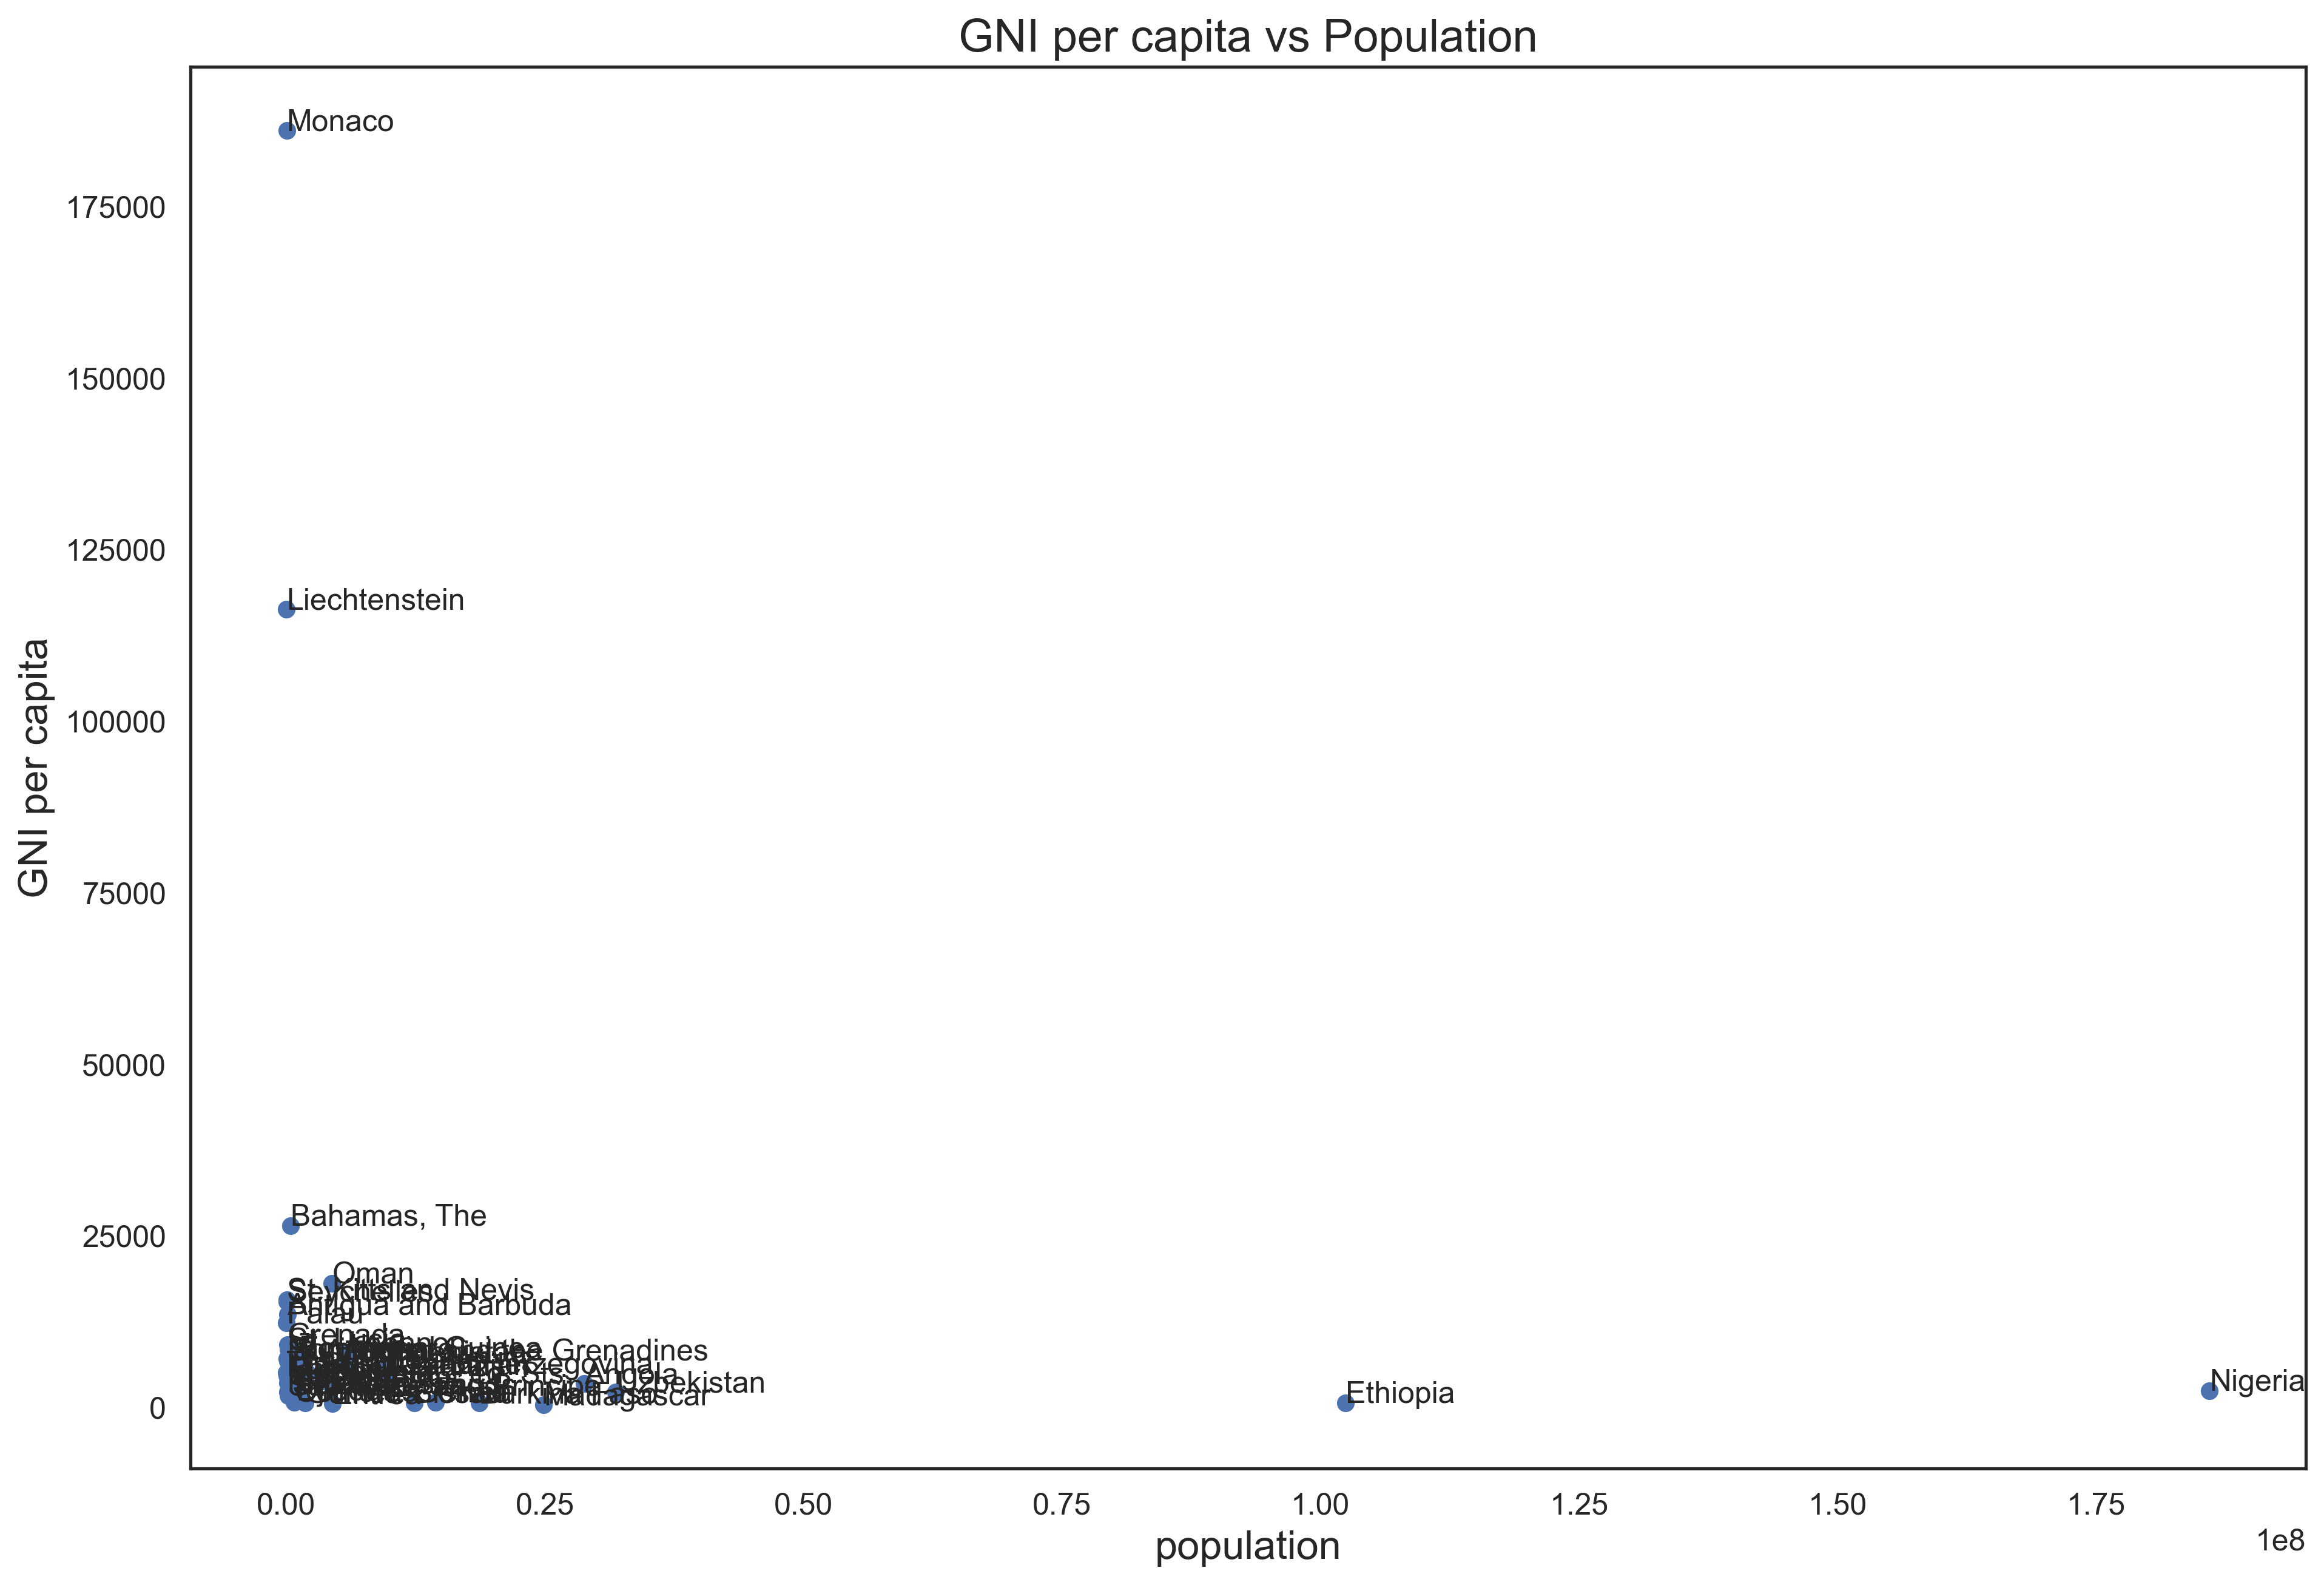

In [85]:
# graph 
x = list(data_merge_mask4['Population'])
y = list(data_merge_mask4['GNI_per_capita'])
text = data_merge_mask4['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GNI per capita vs Population')
plt.xlabel('population')
plt.ylabel('GNI per capita')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

This graph shows that the 50 countries concern by missing values have of small population or a weak economy.
I drop data for these countries.

In [86]:
data_clean3 = data_clean2[mask3]
data_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 196
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOM                  142 non-null    object 
 1   NOM_ALPHA            142 non-null    object 
 2   CODE                 142 non-null    object 
 3   Country Name         142 non-null    object 
 4   Country Code         142 non-null    object 
 5   Secondary_completed  142 non-null    float64
 6   Secondary_total      142 non-null    float64
 7   Tertiary_completed   142 non-null    float64
 8   Tertiary_total       142 non-null    float64
 9   Internet             142 non-null    float64
 10  GNI_per_capita       142 non-null    float64
 11  Expenditure          142 non-null    float64
 12  Population_Growth    142 non-null    float64
 13  Population           142 non-null    float64
 14  Region               142 non-null    object 
 15  Income Group         142 non-null    obj

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C43">4.3. Handling outliers</a></div> 

In [87]:
data_clean3.describe()

Secondary_completed  Secondary_total  Tertiary_completed  \
count           142.000000       142.000000          142.000000   
mean             27.189930        46.432394            8.023310   
std              16.238451        20.457729            7.243429   
min               2.190000         6.300000            0.000000   
25%              15.645000        31.160000            1.907500   
50%              24.980000        45.710000            6.110000   
75%              38.465000        62.837500           12.907500   
max              68.770000        85.780000           30.040000   

       Tertiary_total    Internet  GNI_per_capita  Expenditure  \
count      142.000000  142.000000      142.000000   142.000000   
mean        13.621690   51.767942    14412.605634     4.742500   
std         11.710066   27.771451    18855.462240     1.926364   
min          0.000000    4.000000      280.000000     1.073990   
25%          3.837500   25.594207     1742.500000     3.540845   
50%         11.210000   53.613386     5480.000000     4.825825   
75%         20.582500   76.350998    17697.500000     5.588337   
max         59.220000   98.240016    82440.000000    12.837270   

       Population_Growth    Population  
count         142.000000  1.420000e+02  
mean            1.329833  4.835634e+07  
std             1.111905  1.636727e+08  
min            -1.638839  1.071220e+05  
25%             0.561413  4.599422e+06  
50%             1.261051  1.079704e+07  
75%             2.144718  3.603402e+07  
max             3.826066  1.378665e+09

There is one or several values set to 0 for the variables "Tertiary_completed" and "Tertiary_total" meaning that nobody goes to university

In [88]:
data_clean3.loc[data_clean3['Tertiary_total'] == 0]

NOM  NOM_ALPHA CODE Country Name Country Code  Secondary_completed  \
73  Guatémala  Guatémala  GTM    Guatemala          GTM                10.23   

    Secondary_total  Tertiary_completed  Tertiary_total   Internet  \
73             22.6                 0.0             0.0  34.509326   

    GNI_per_capita  Expenditure  Population_Growth  Population  \
73          3790.0      2.95595           2.010368  16582469.0   

                       Region         Income Group  
73  Latin America & Caribbean  Lower middle income

On "https://www.aquiguatemala.info/lacces-aux-etudes-superieures-toujours-difficile/", it is mentioned that 3% of the population access to university. Therefore, this null value corresponds to an outliers. However, I choose to keep this value like this because I don't know the exact value and this country seems not relevant for the project.

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C44">4.4. Handling duplicate</a></div> 


In [89]:
if data_clean3.loc[data_clean3[['Country Name']].duplicated(keep=False),:].empty:
    print("No duplicate")
else:
    data_clean3.loc[data_clean3[['Country Name']].duplicated(keep=False),:]


No duplicate


<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

# <div class="alert alert-block alert-info"><a name="C5">5. Exploratory analysis</a></div> 

In [90]:
print("Size of the prepared dataframe", data_clean3.shape)

Size of the prepared dataframe (142, 16)


## <div class="alert alert-block alert-info"><a name="C51">5.1. Overview</a></div>

In [91]:
data_clean3.describe()

Secondary_completed  Secondary_total  Tertiary_completed  \
count           142.000000       142.000000          142.000000   
mean             27.189930        46.432394            8.023310   
std              16.238451        20.457729            7.243429   
min               2.190000         6.300000            0.000000   
25%              15.645000        31.160000            1.907500   
50%              24.980000        45.710000            6.110000   
75%              38.465000        62.837500           12.907500   
max              68.770000        85.780000           30.040000   

       Tertiary_total    Internet  GNI_per_capita  Expenditure  \
count      142.000000  142.000000      142.000000   142.000000   
mean        13.621690   51.767942    14412.605634     4.742500   
std         11.710066   27.771451    18855.462240     1.926364   
min          0.000000    4.000000      280.000000     1.073990   
25%          3.837500   25.594207     1742.500000     3.540845   
50%         11.210000   53.613386     5480.000000     4.825825   
75%         20.582500   76.350998    17697.500000     5.588337   
max         59.220000   98.240016    82440.000000    12.837270   

       Population_Growth    Population  
count         142.000000  1.420000e+02  
mean            1.329833  4.835634e+07  
std             1.111905  1.636727e+08  
min            -1.638839  1.071220e+05  
25%             0.561413  4.599422e+06  
50%             1.261051  1.079704e+07  
75%             2.144718  3.603402e+07  
max             3.826066  1.378665e+09

The values for 'Secondary completed', 'Secondary total', Tertiary completed, Tertiary total, Internet, Expenditure et Population Growth sont exprimées en pourcentage et pourront donc être incluses telles quelles dans le calcul du score d'attractivité.

Les valeurs pour GNI per capita et pour la population ne sont pas exprimées en pourcentage. Il sera donc nécessaire de procéder à une normalisation des valeurs avant le calcul du score d'attractivité.



<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C52">5.2. Variable descriptions</div>

### <a name="C521">5.2.1.Qualitative variables</a>

The aim of this part is to present a description of 'Income Group' variable.

In [92]:
# Display the name of 'Income Group'
data_clean3['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income',
       'Lower middle income'], dtype=object)

#### Overall

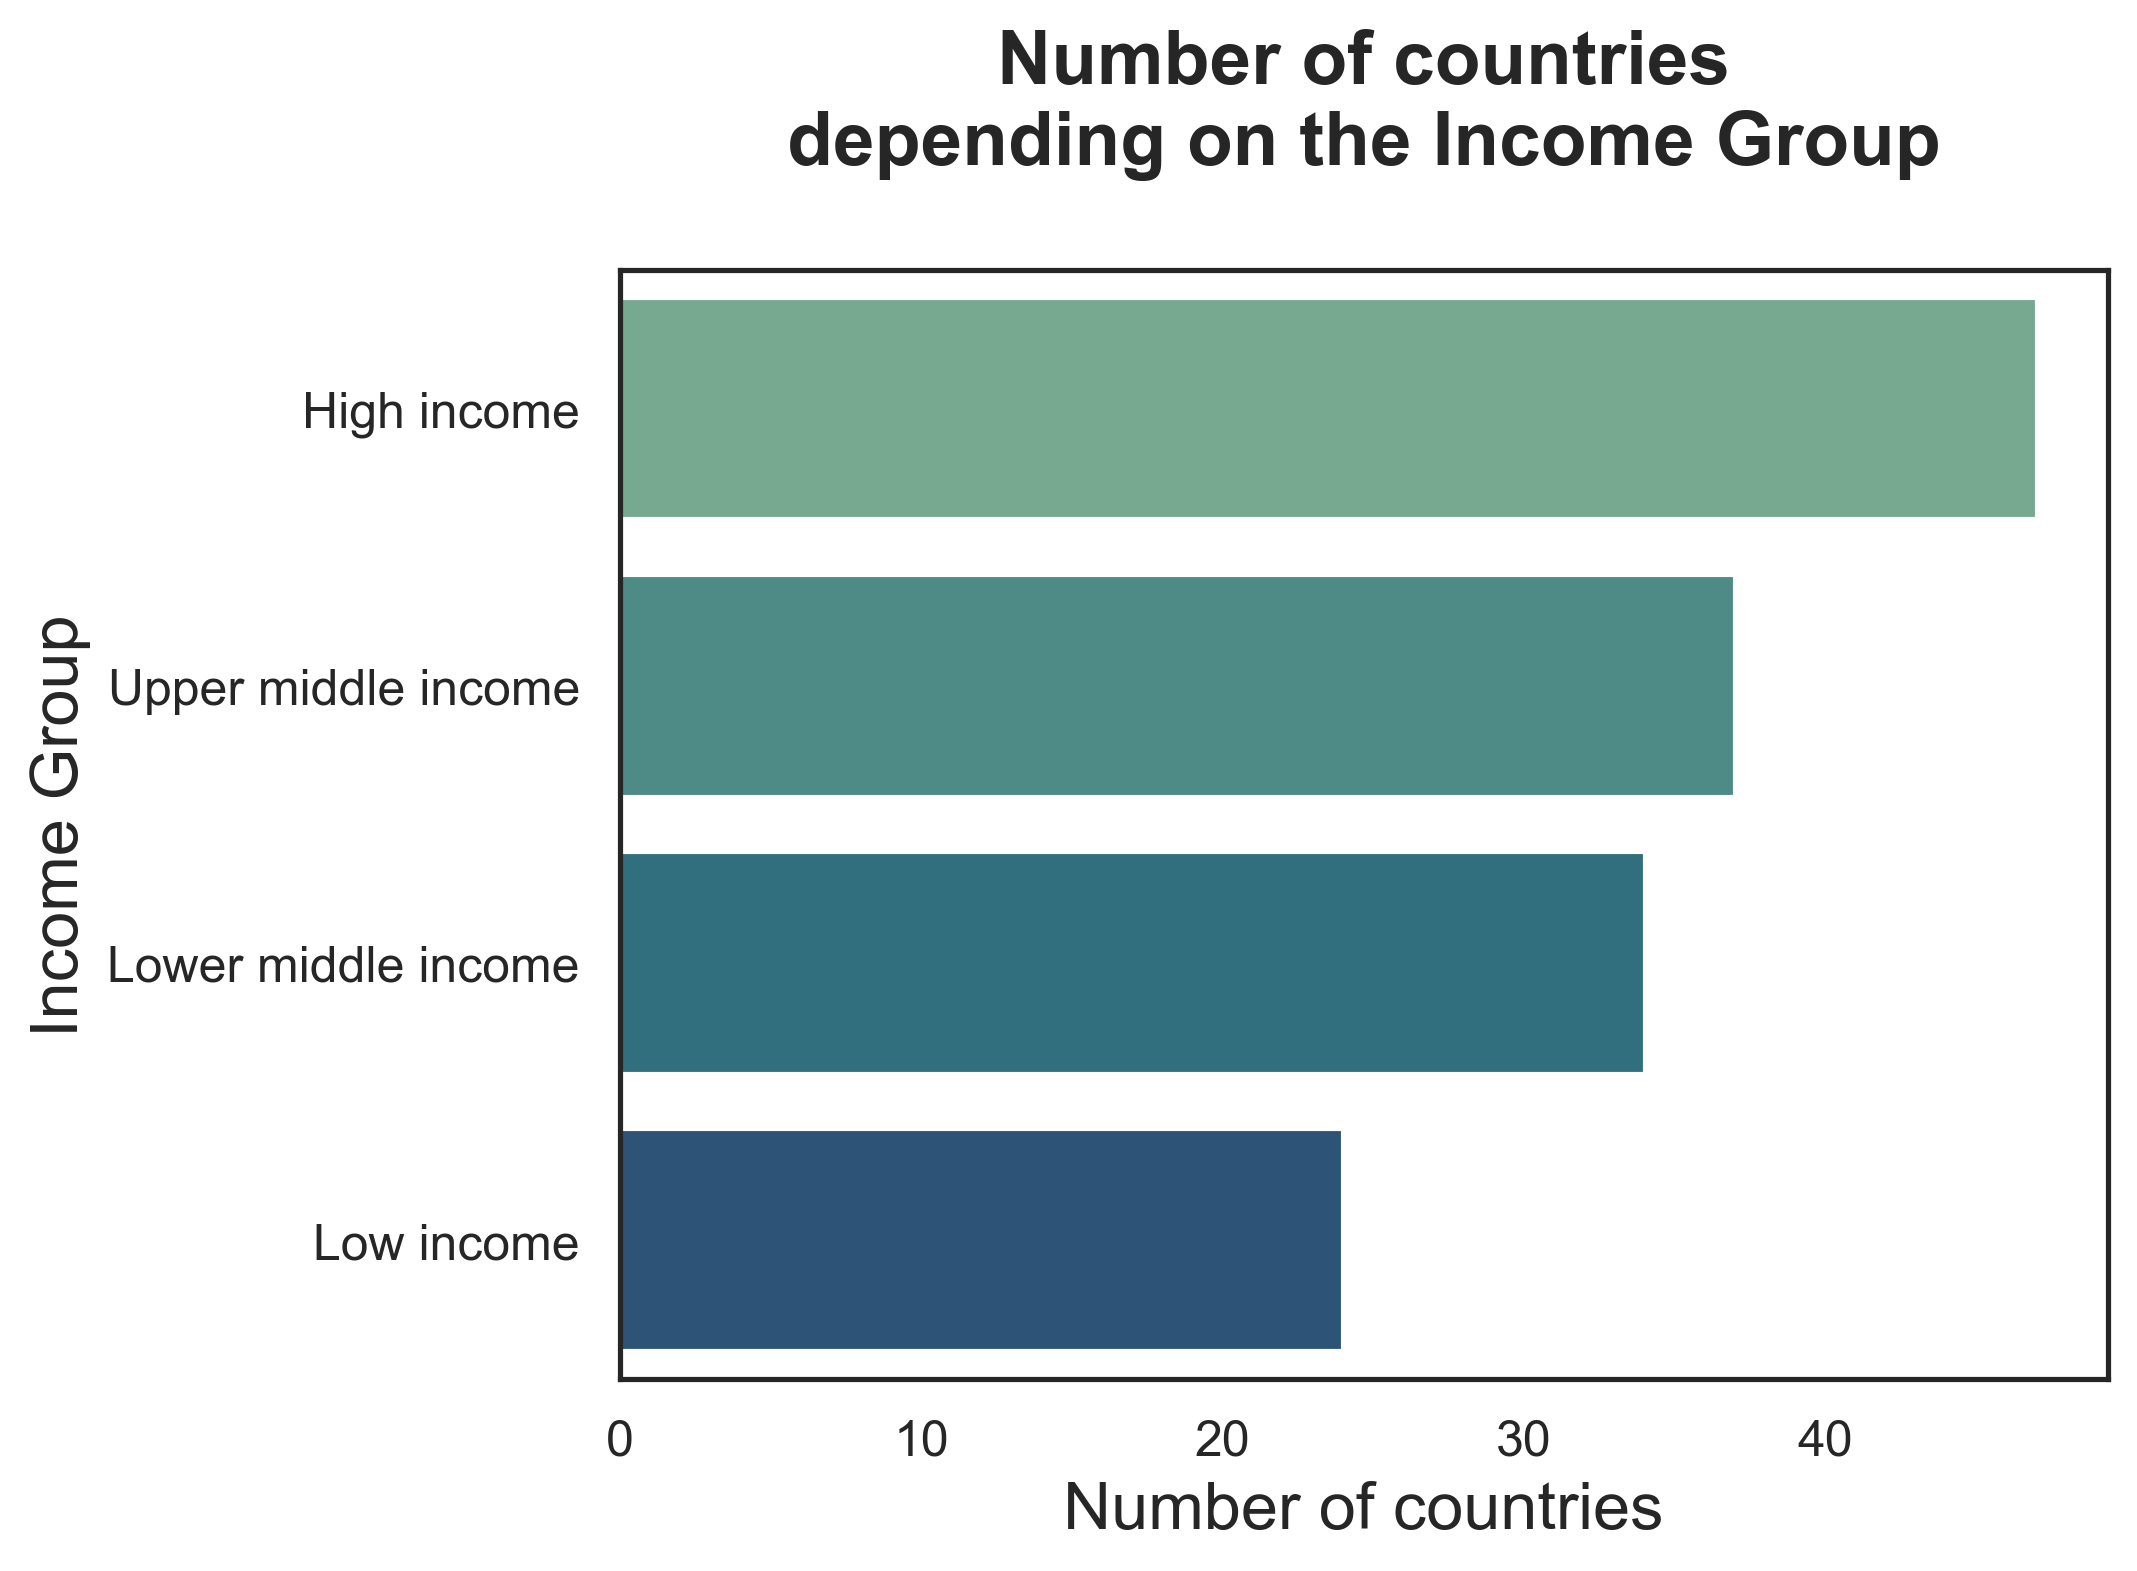

In [93]:
fig = plt.figure()
ax = plt.axes()
y = data_clean3["Income Group"].value_counts(normalize=False)
sns.barplot(x=y,
            y=y.index,
            palette="crest",
            order=['High income',
                   'Upper middle income',
                   'Lower middle income',
                   'Low income'])
ax = ax.set(xlabel='Number of countries', ylabel='Income Group')
plt.title("Number of countries""\n""depending on the Income Group""\n",
          fontweight='bold')
plt.show()

#### Income Groups depending on geographic areas

In [94]:
X = "Income Group"
Y = "Region"

cont = data_clean3[[X,Y]].pivot_table(index=X,
                                      columns=Y,
                                      aggfunc=len,
                                      margins=True,
                                      margins_name="Total")
cont

Region               East Asia & Pacific  Europe & Central Asia  \
Income Group                                                      
High income                          6.0                   28.0   
Low income                           2.0                    1.0   
Lower middle income                  6.0                    4.0   
Upper middle income                  5.0                    7.0   
Total                               19.0                   40.0   

Region               Latin America & Caribbean  Middle East & North Africa  \
Income Group                                                                 
High income                                4.0                         7.0   
Low income                                 1.0                         NaN   
Lower middle income                        7.0                         4.0   
Upper middle income                       13.0                         6.0   
Total                                     25.0                        17.0   

Region               North America  South Asia  Sub-Saharan Africa  Total  
Income Group                                                               
High income                    2.0         NaN                 NaN     47  
Low income                     NaN         3.0                17.0     24  
Lower middle income            NaN         3.0                10.0     34  
Upper middle income            NaN         1.0                 5.0     37  
Total                          2.0         7.0                32.0    142

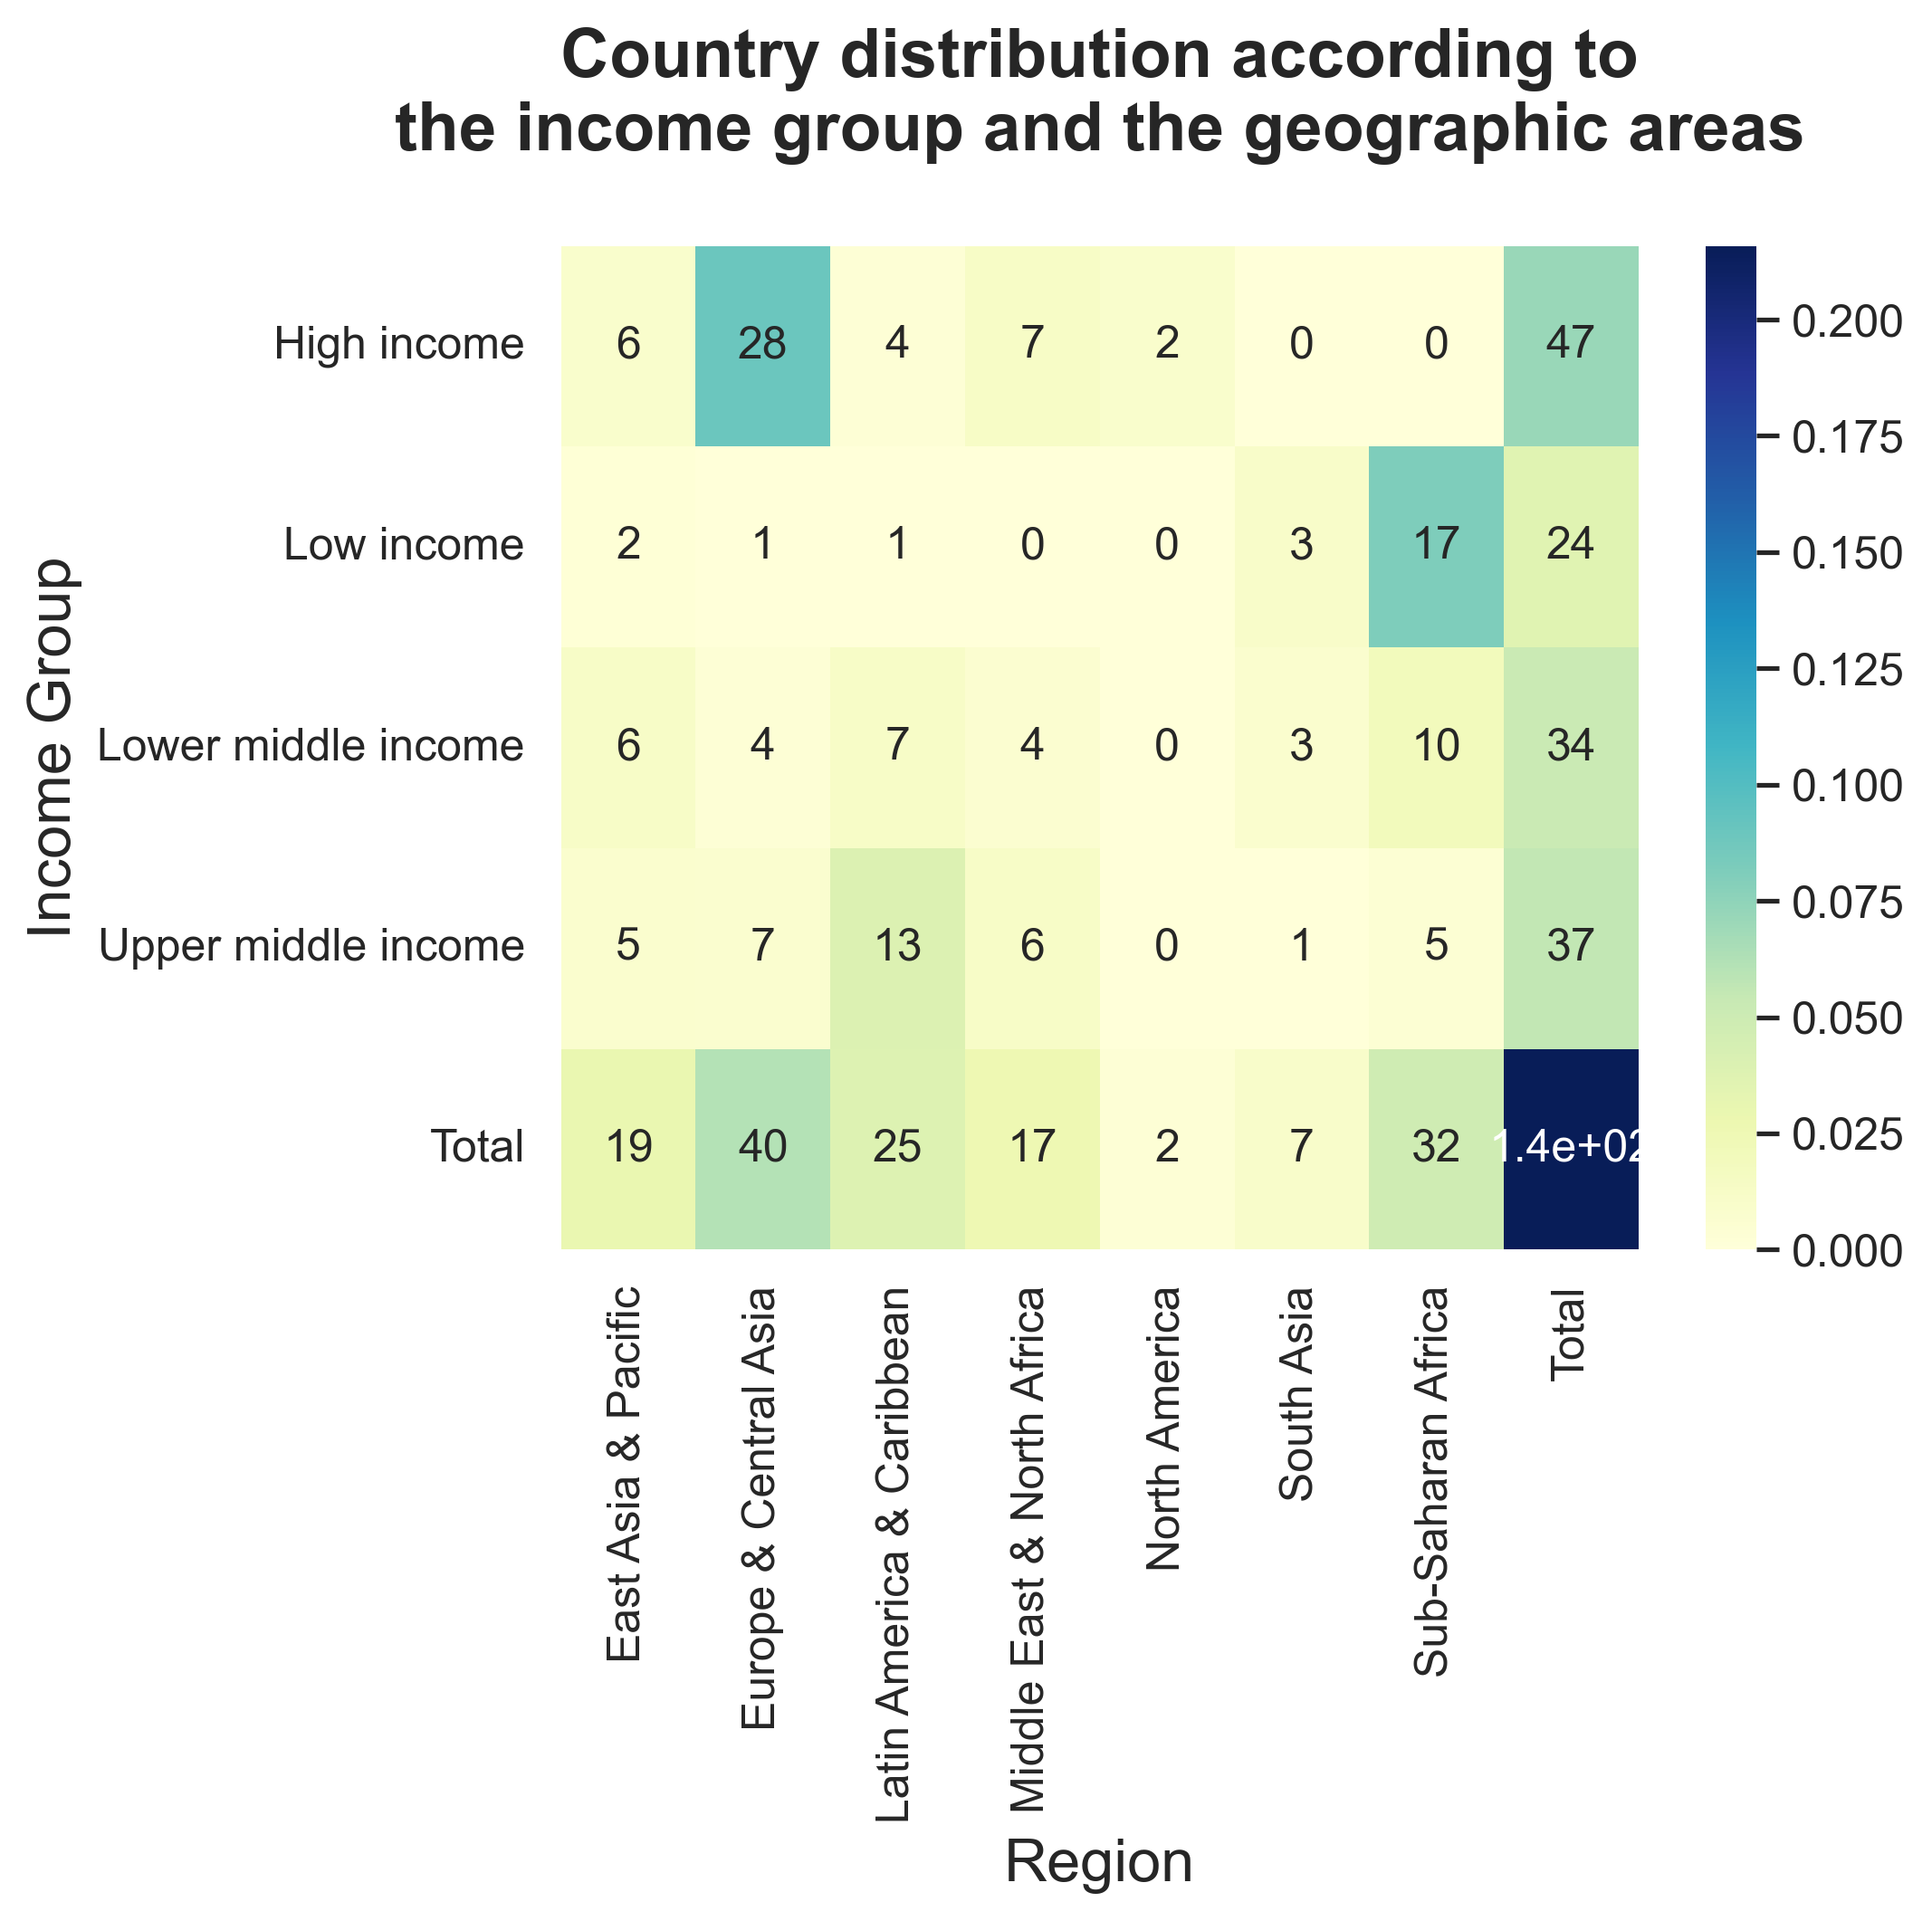

In [95]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n


fig = plt.figure()
ax = plt.axes()

plt.title("Country distribution according to""\n""the income group and the geographic areas""\n", fontweight='bold')
ax = ax.set(xlabel='Geographic area',ylabel='Income group',)


sns.heatmap(table.iloc[:,:],annot=c.iloc[:,:],cmap="YlGnBu")
plt.show()

With the contingency table and the heat-map, we see that most countries in 'low income' group are in "Sub-Saharan Africa" region.

The poorest countries and therefore not conducive to commercial development are located in the sub-Saharan and South Asian regions.

### <a name="C522">5.2.2. Quantitatives variables</a>

The goal of this section is to perform a descriptive analysis of the numerical variables.

#### <a name="C5221">5.2.2.1. For each variables</a>

For each variable, I plot:
1. a distribution histogram
2. a boxplot to see if outliers are present.

In [96]:
numerical_variables = data_clean3.describe().columns
print("The numerical variables are:",
      numerical_variables)

The numerical variables are: Index(['Secondary_completed', 'Secondary_total', 'Tertiary_completed',
       'Tertiary_total', 'Internet', 'GNI_per_capita', 'Expenditure',
       'Population_Growth', 'Population'],
      dtype='object')


In [97]:
variable_unities = ["Percentage of population over 15 years old",
                    "Percentage of population over 15 years old",
                    "Percentage of population over 15 years old",
                    "Percentage of population over 15 years old",
                    "Internet users (per 100 people)",
                    "Current US$",
                    "Percentage of GDP",
                    "Annual percentage",
                    "Number of people"]

Figure for Secondary_completed


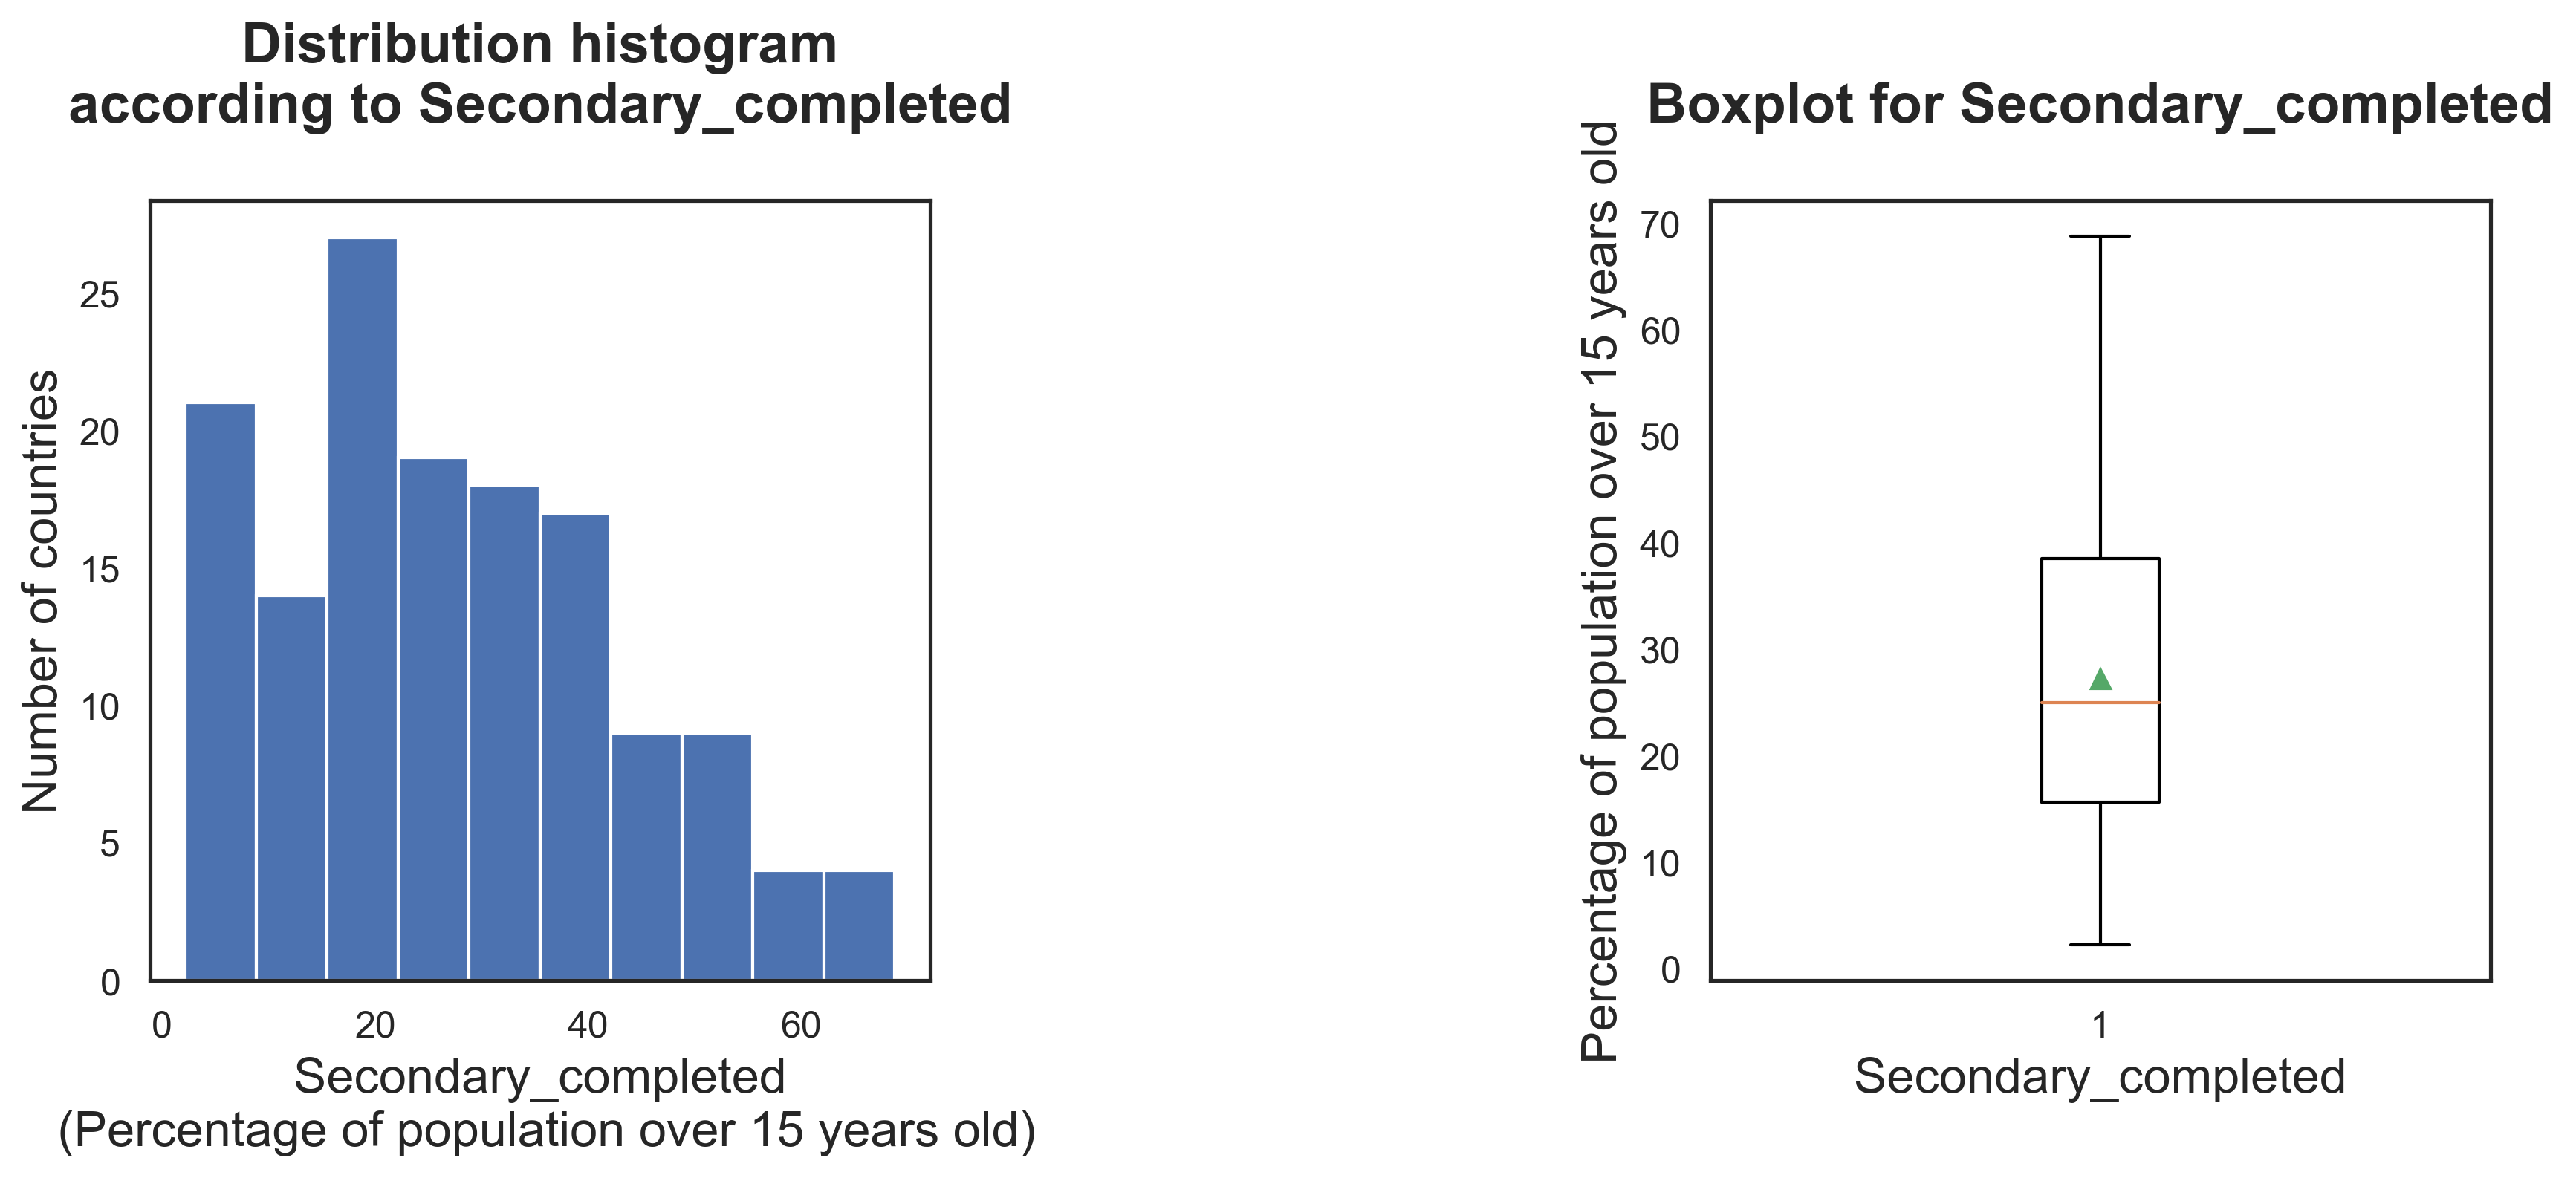

Figure for Secondary_total


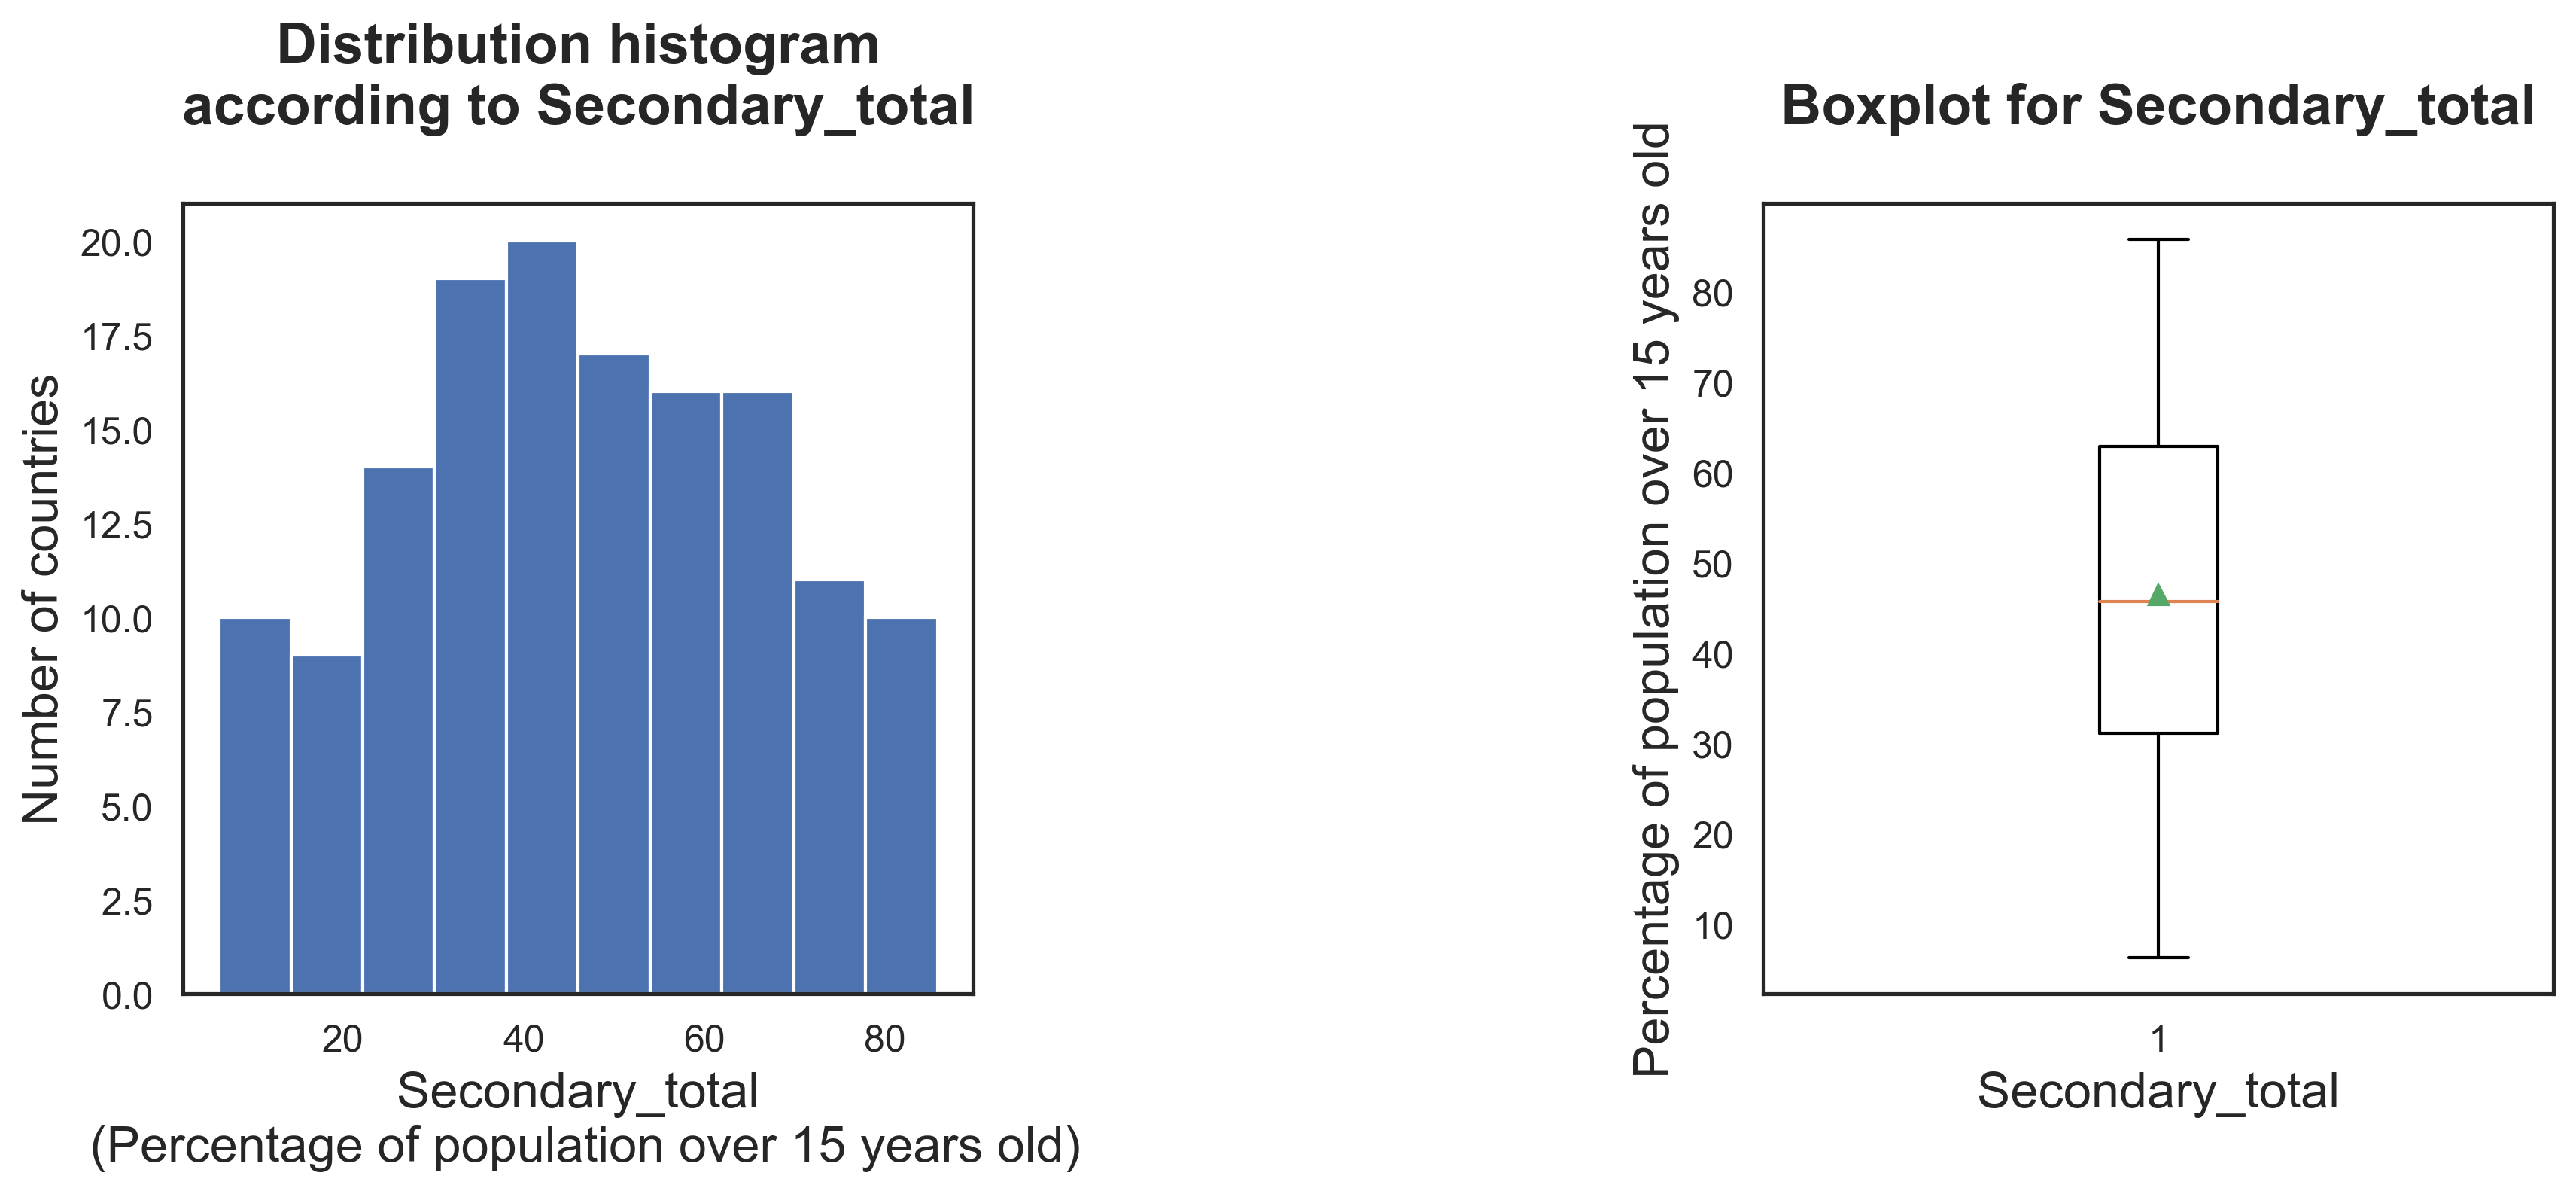

Figure for Tertiary_completed


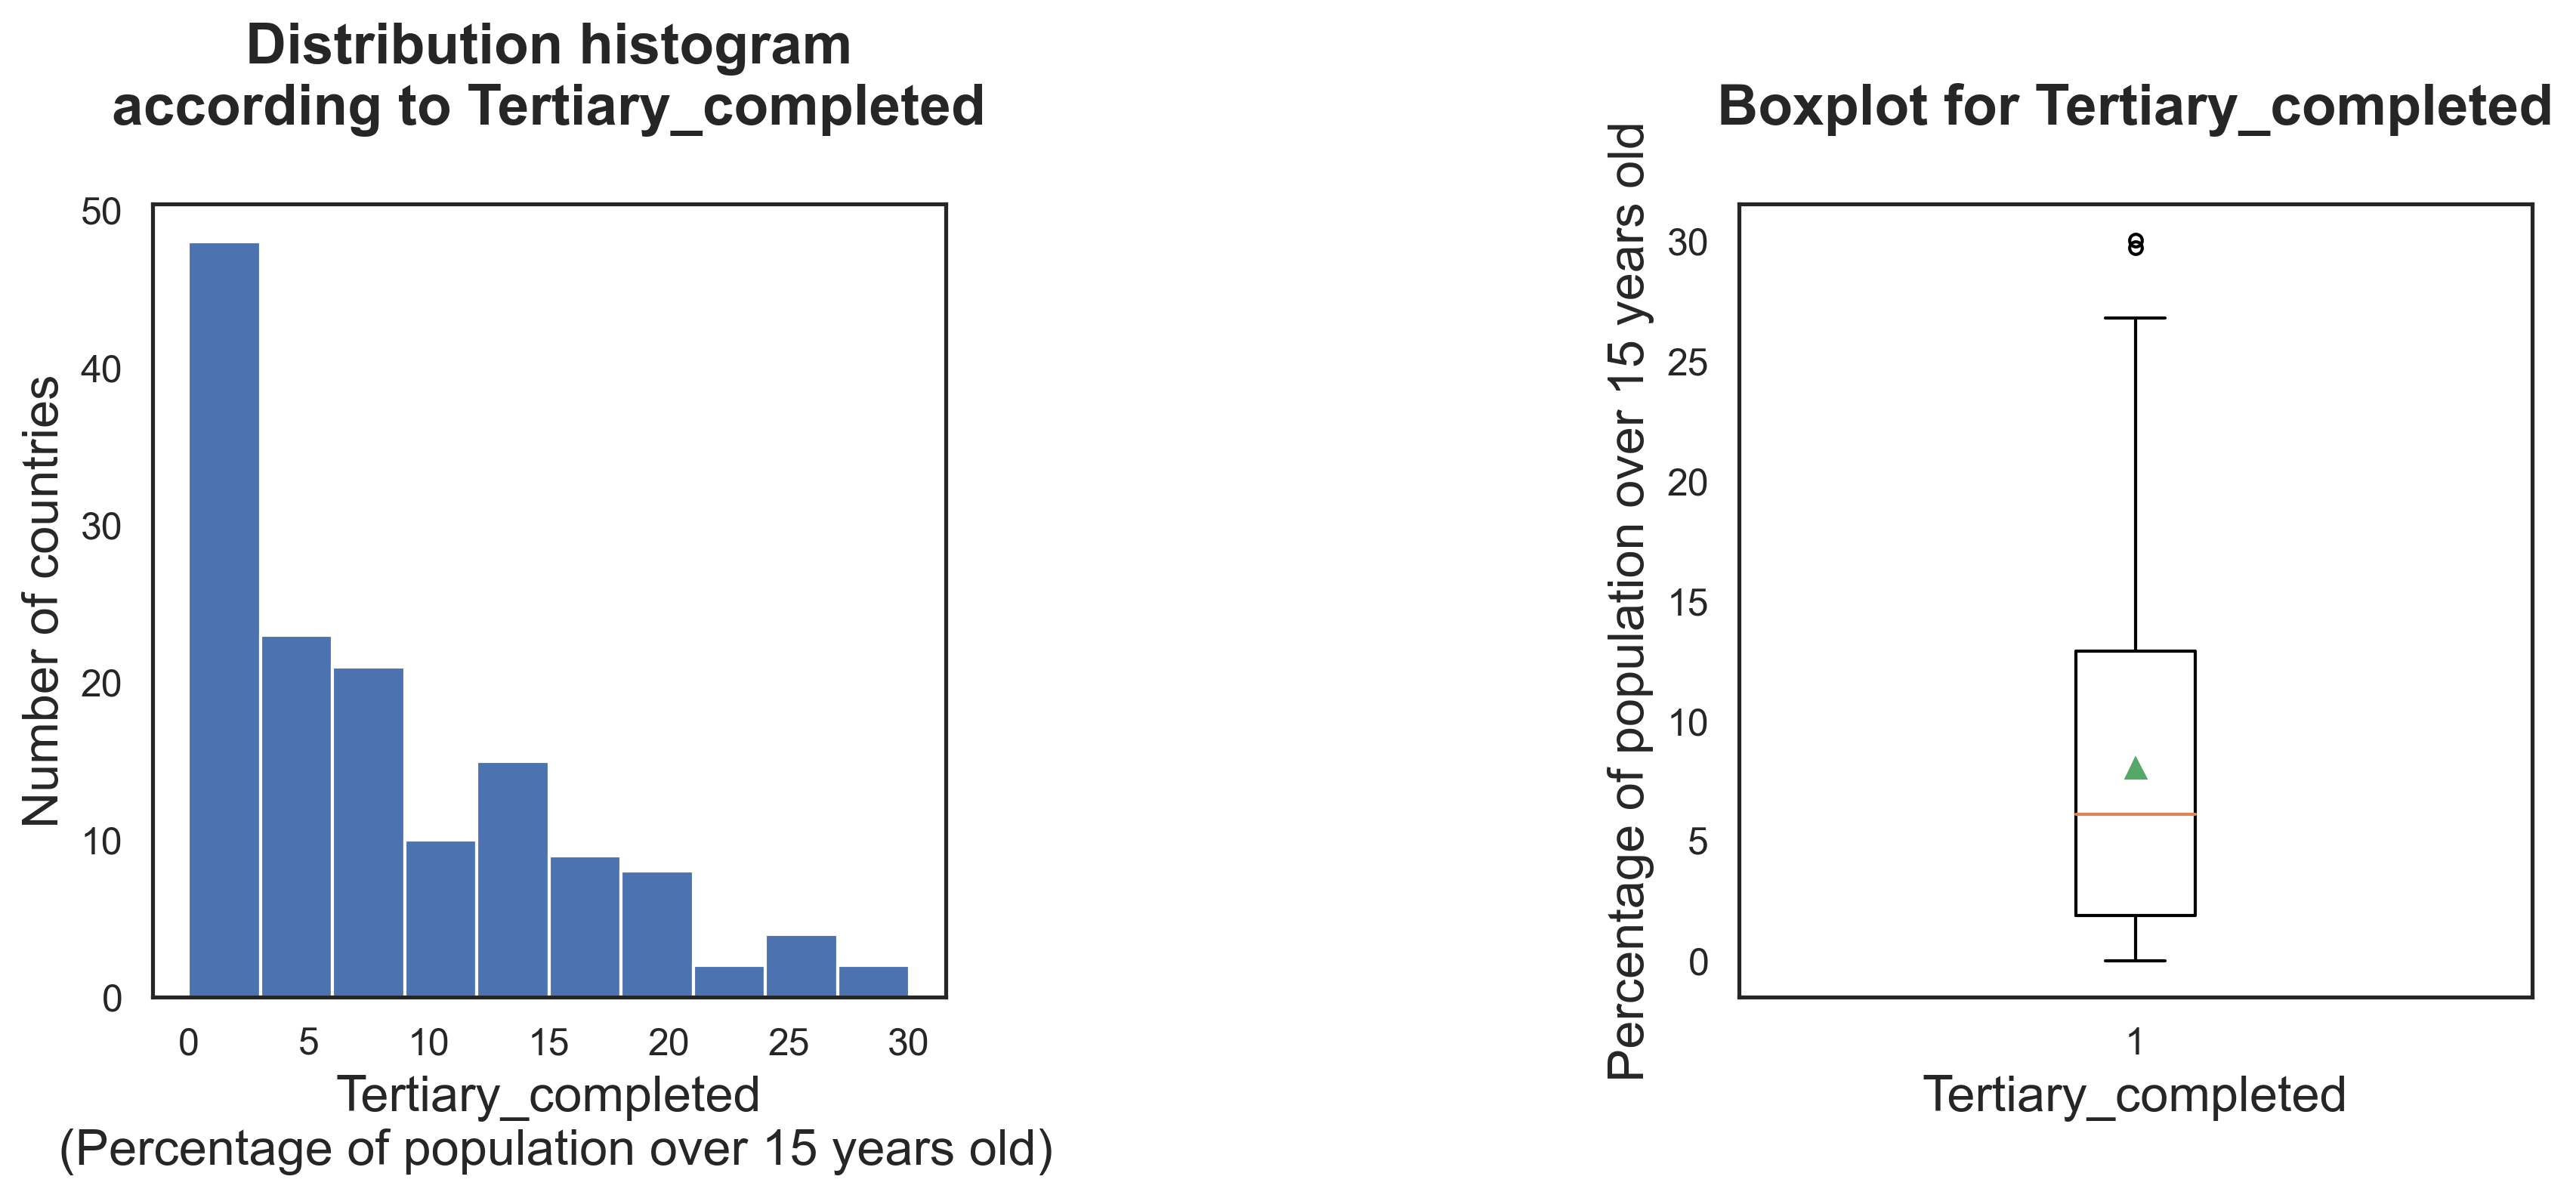

Figure for Tertiary_total


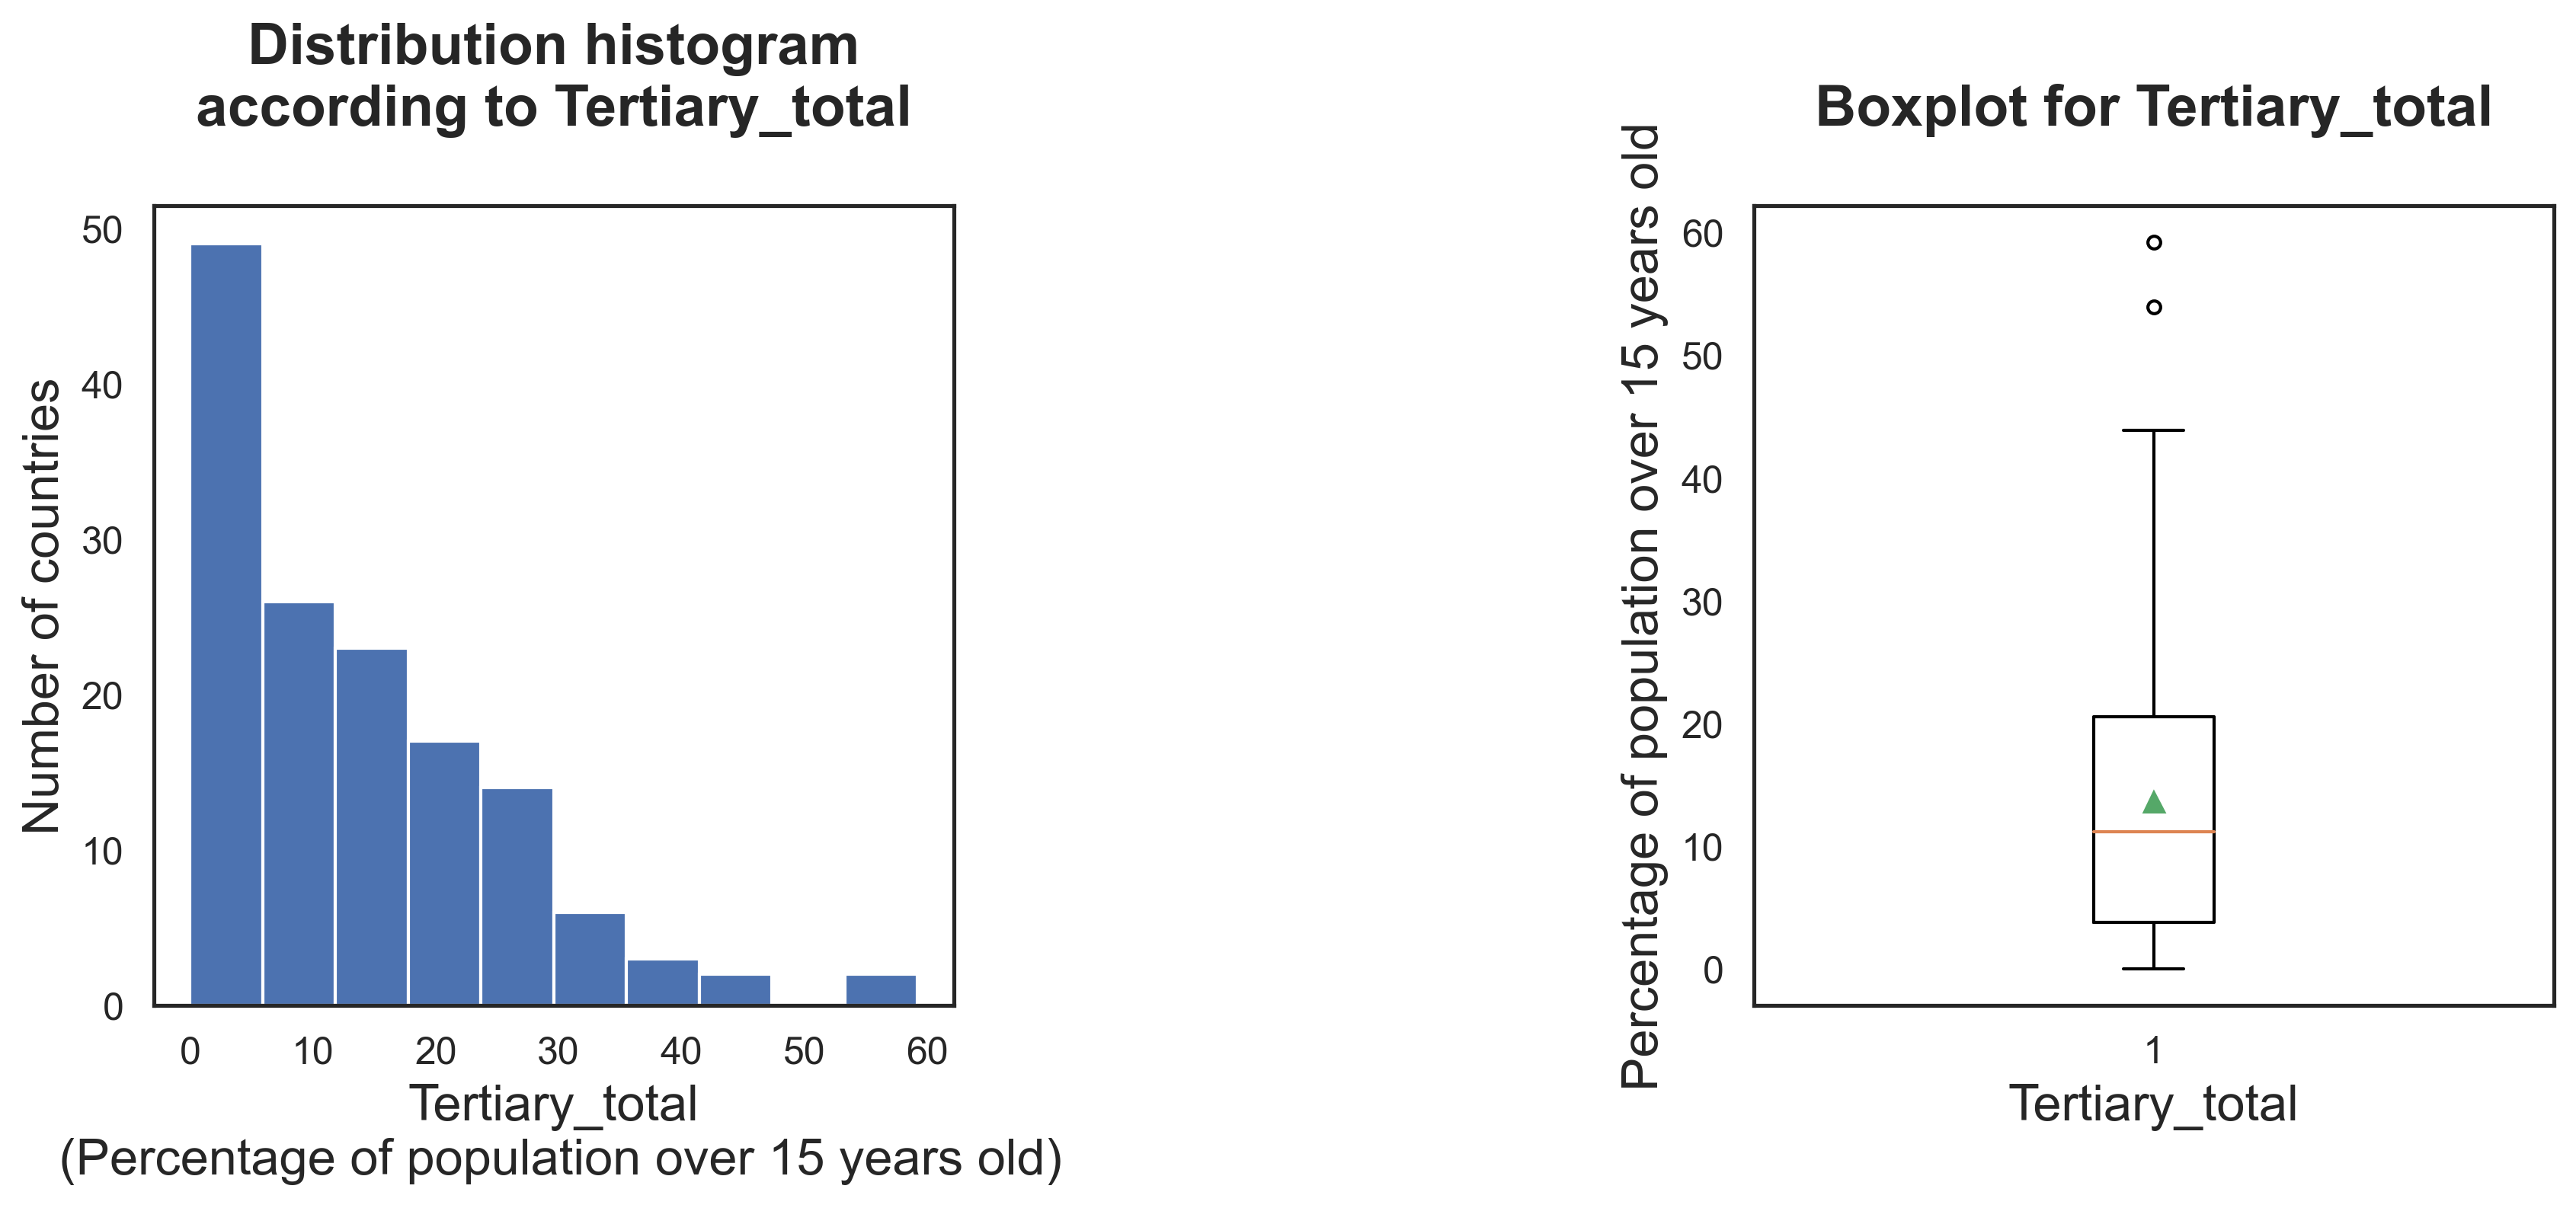

Figure for Internet


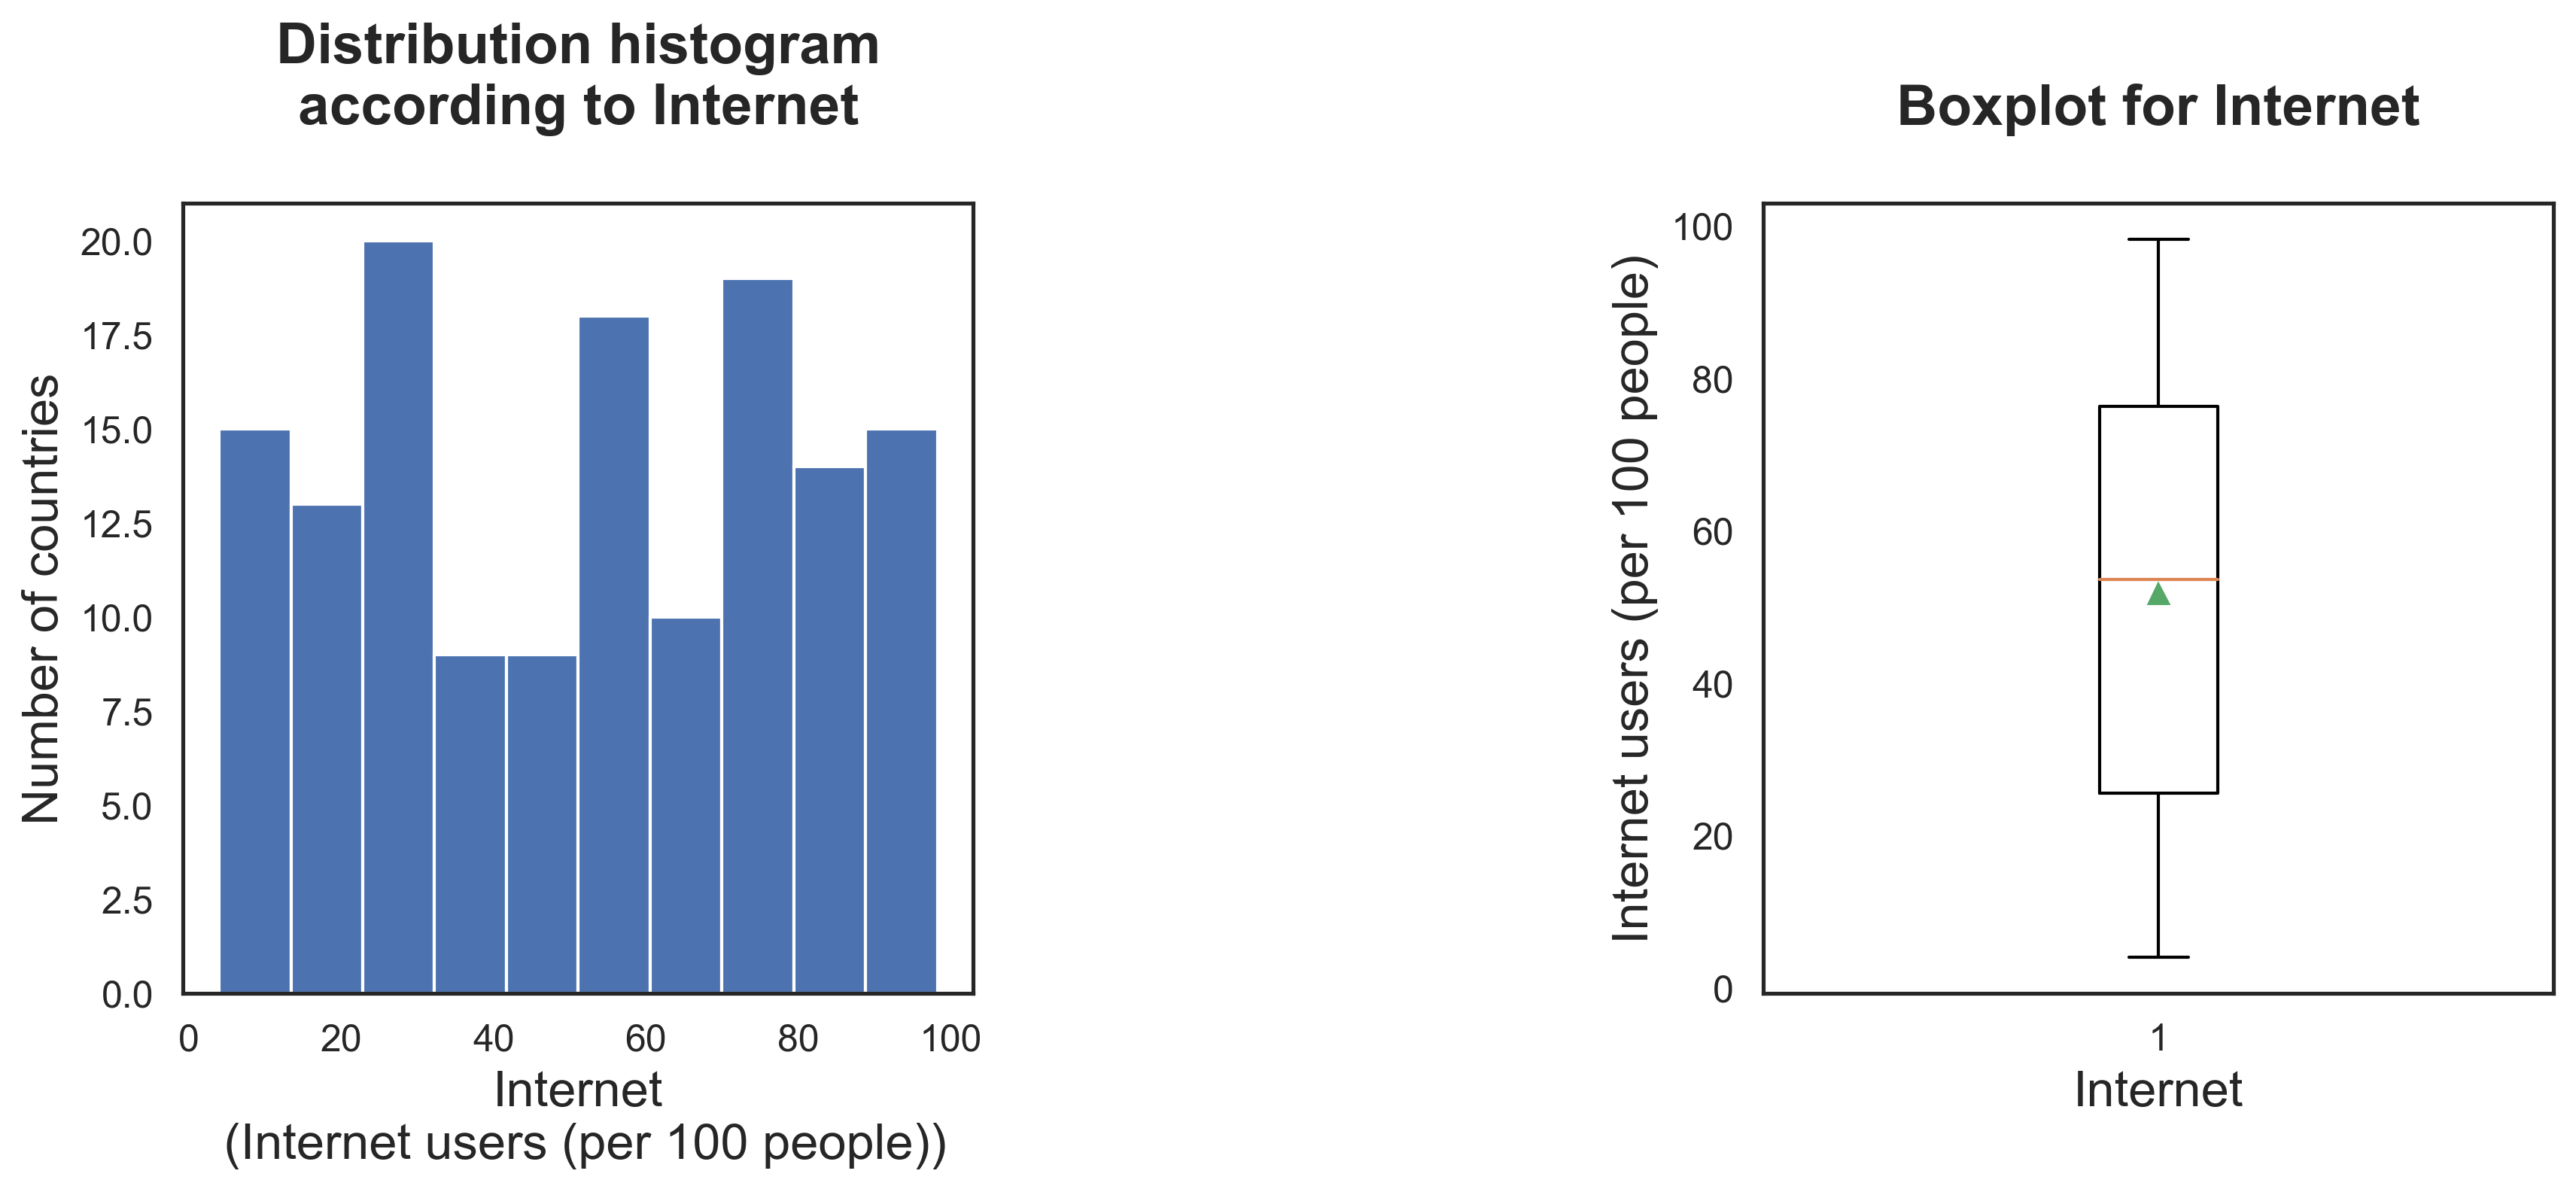

Figure for GNI_per_capita


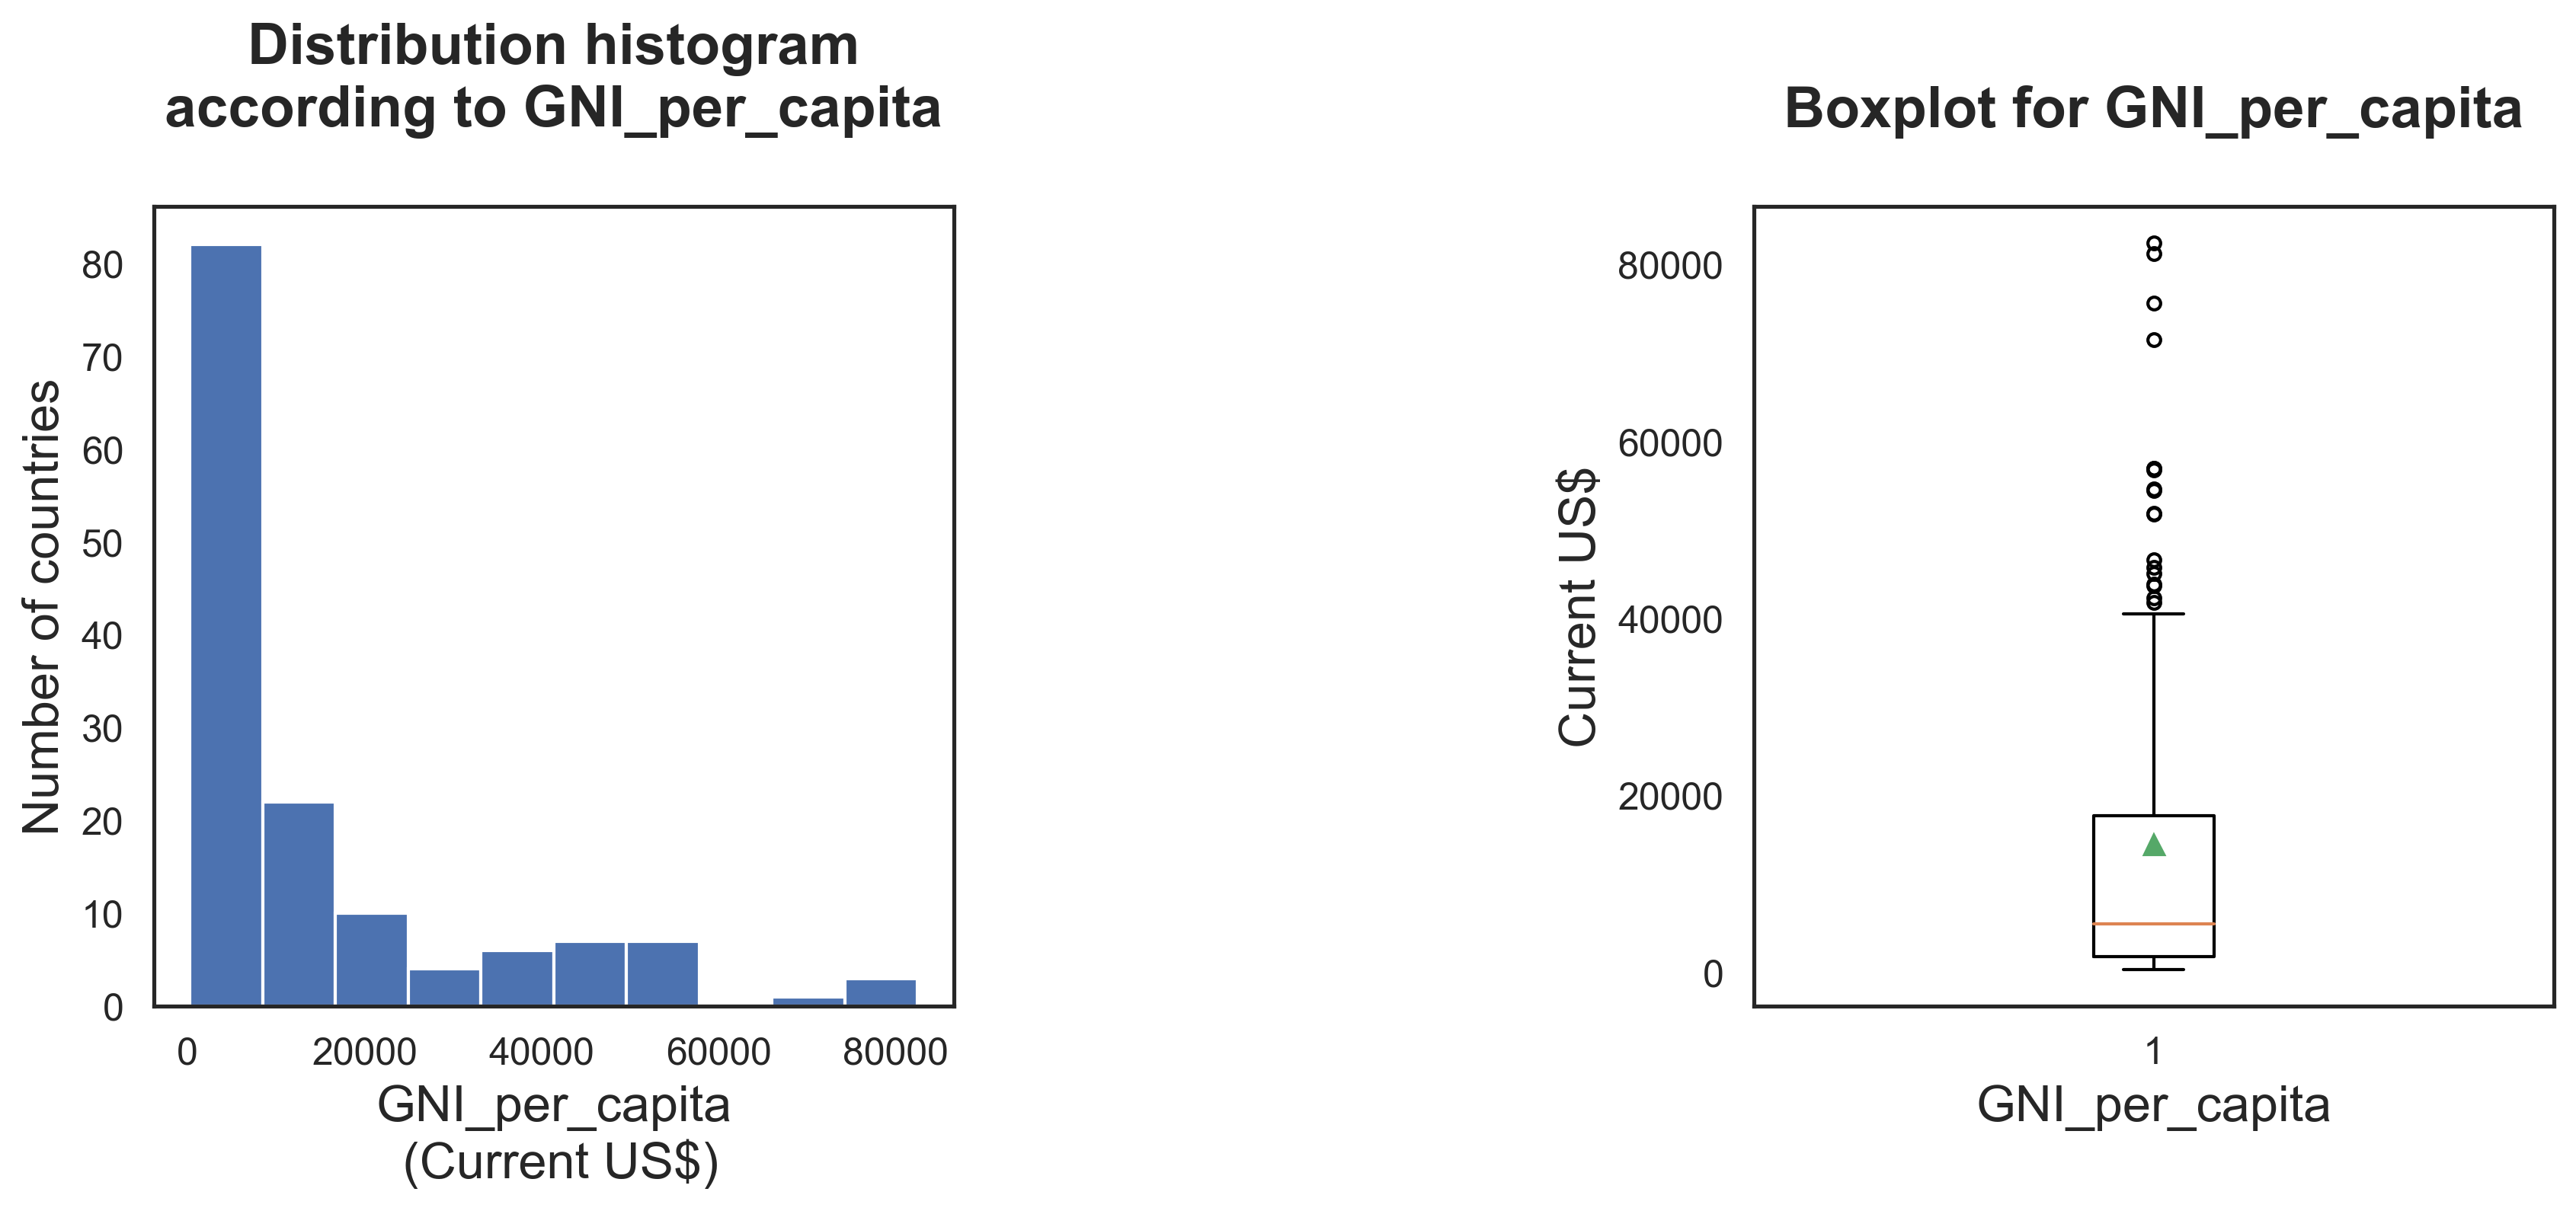

Figure for Expenditure


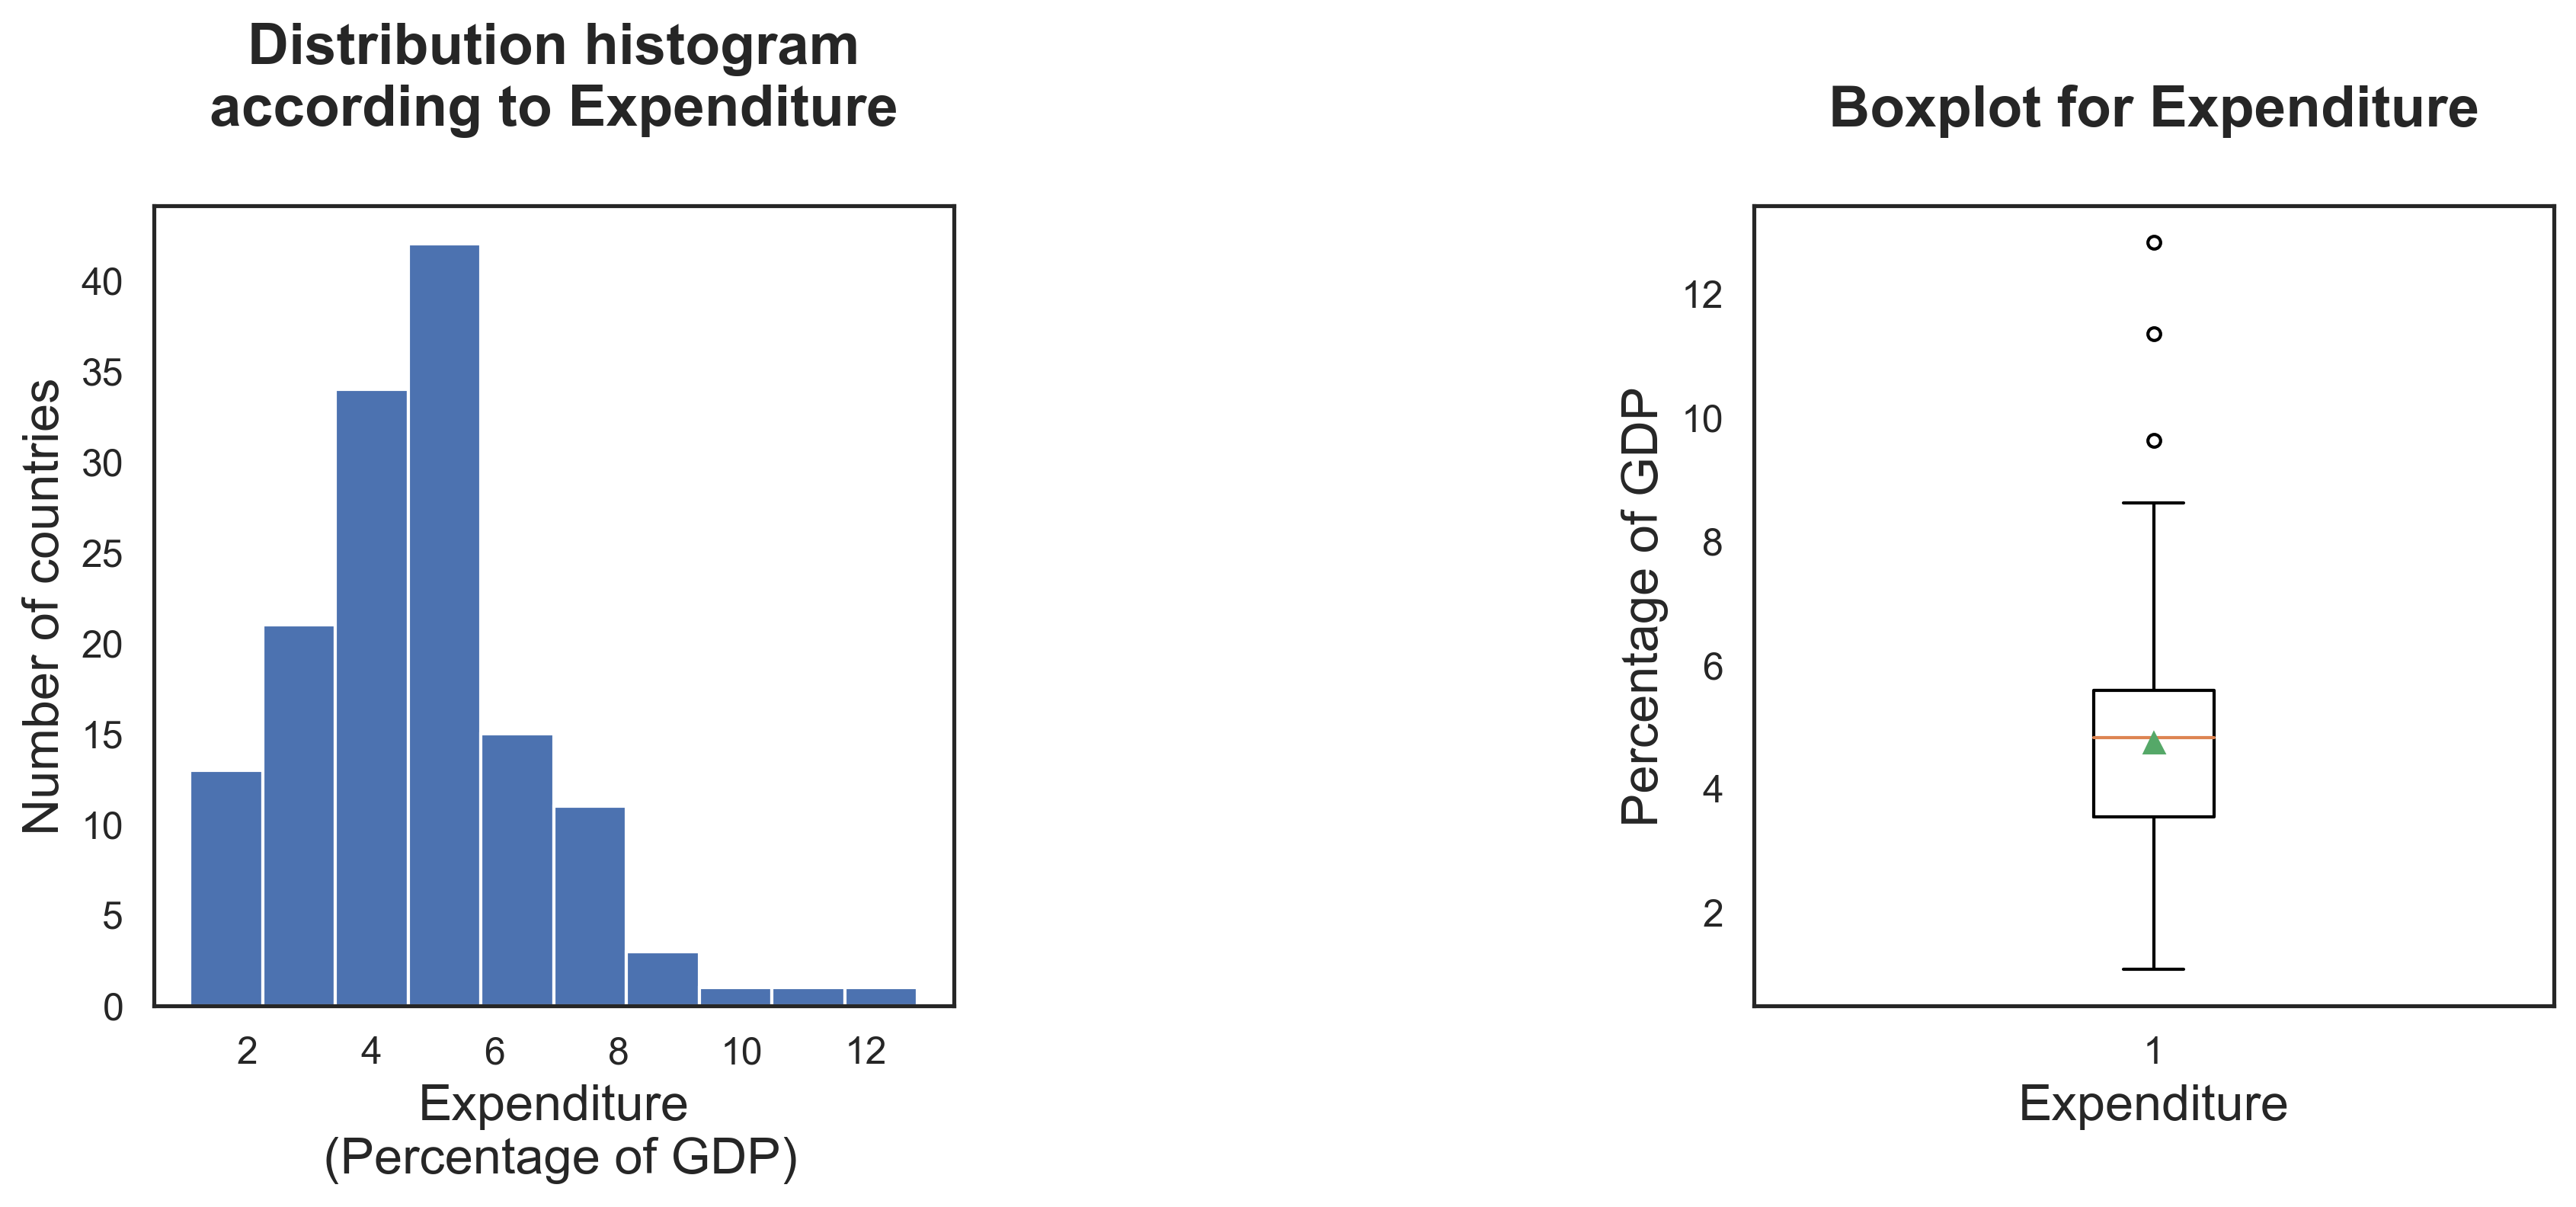

Figure for Population_Growth


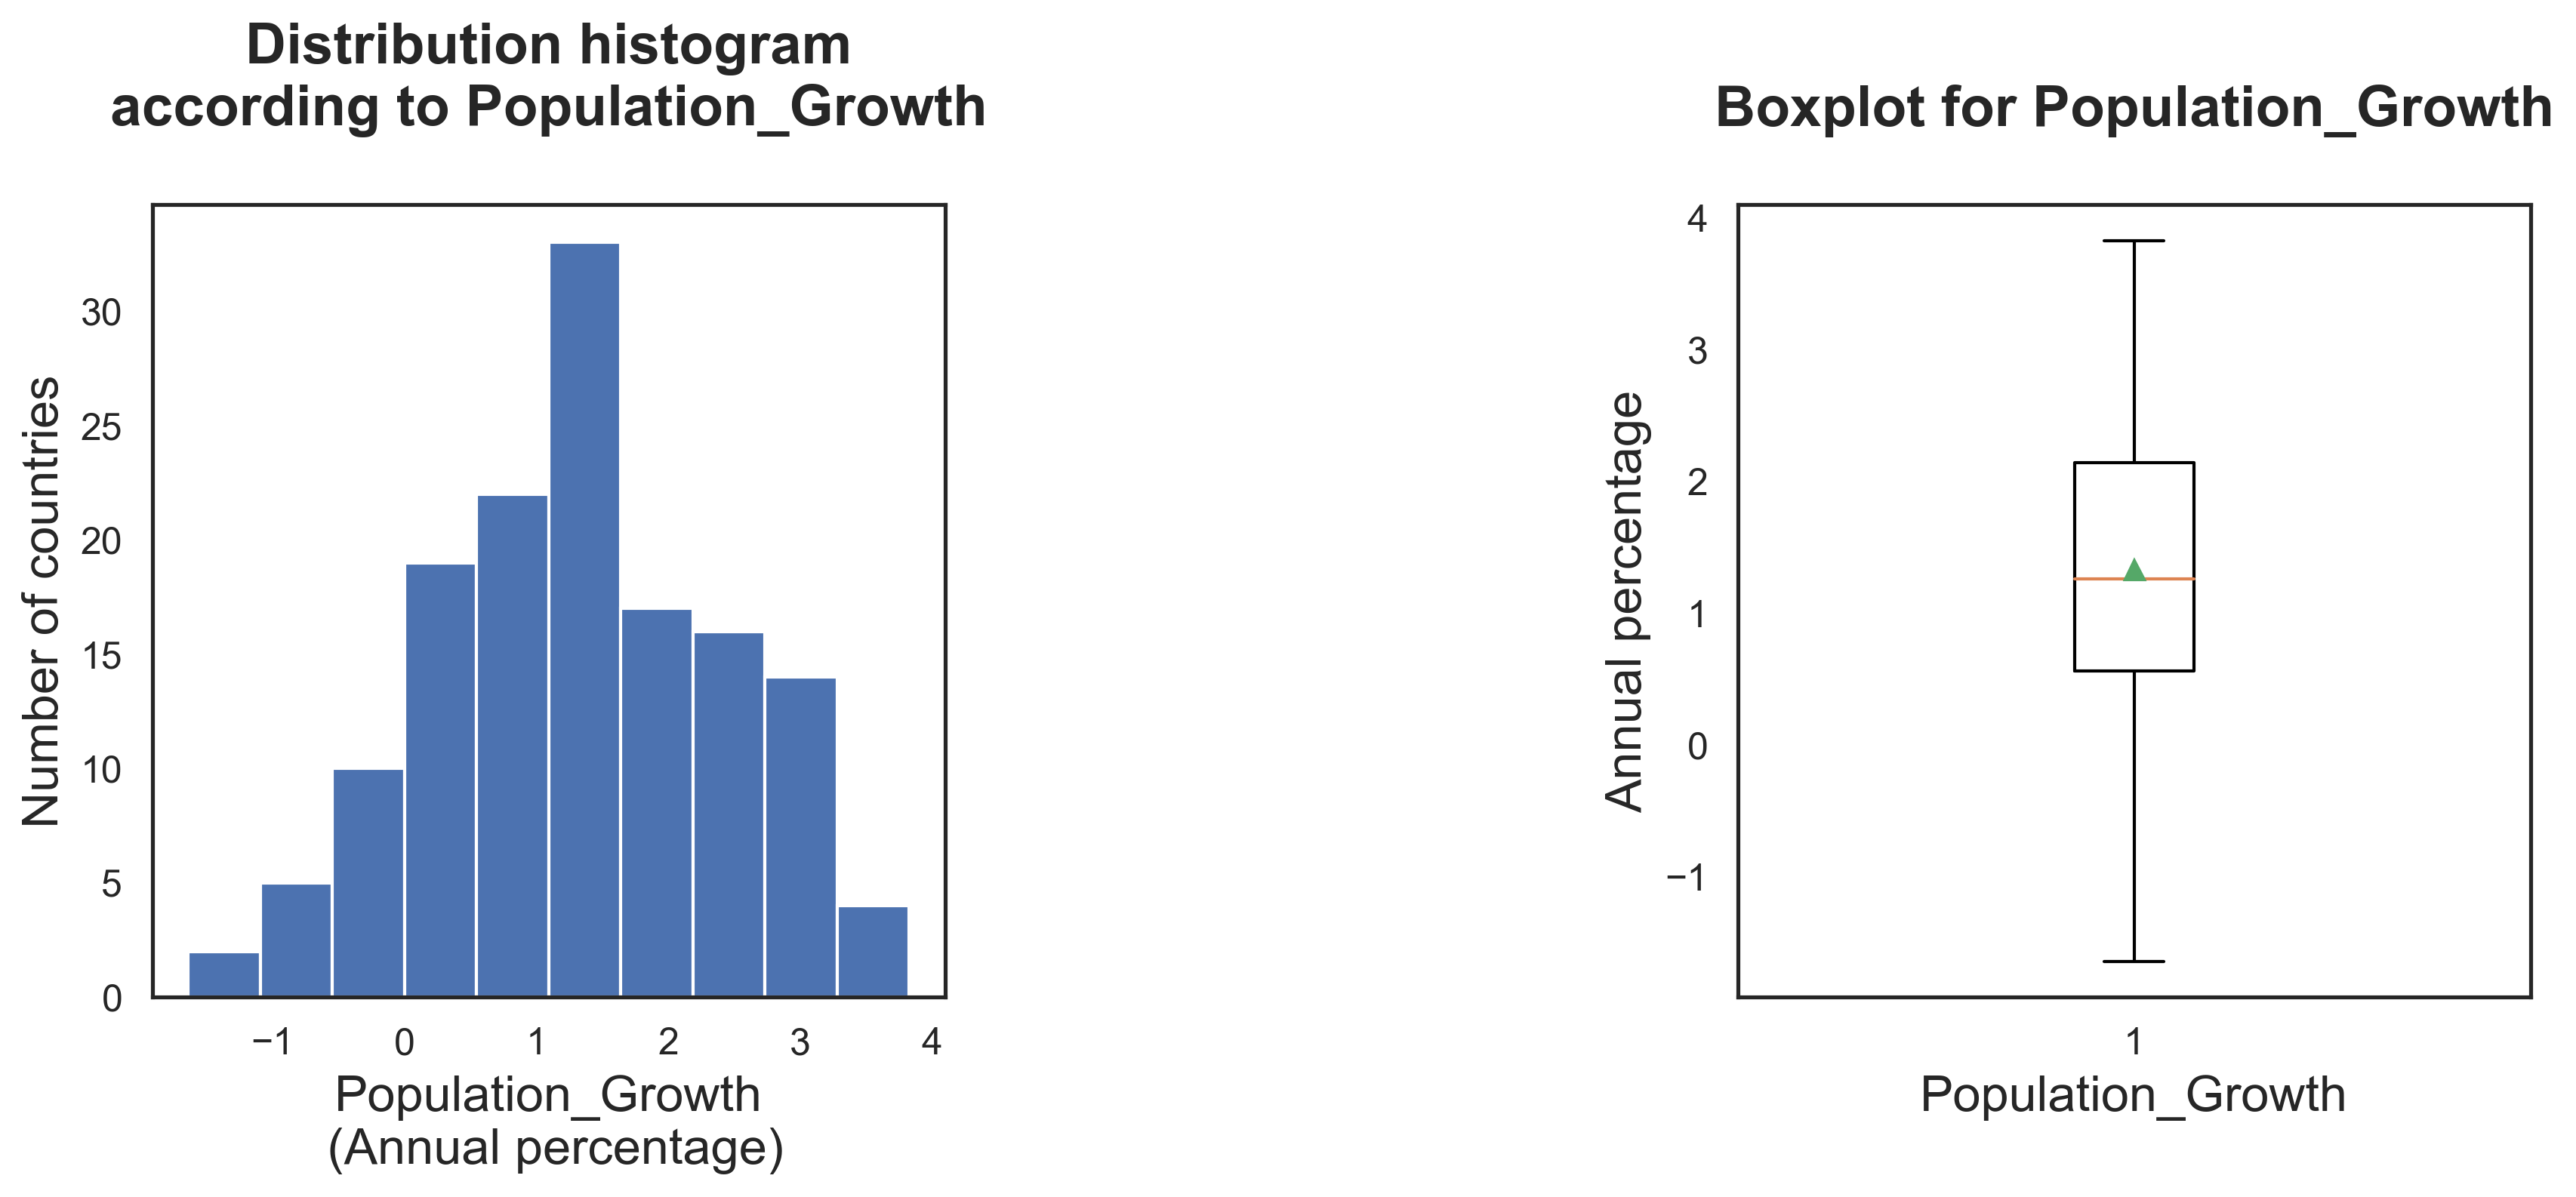

Figure for Population


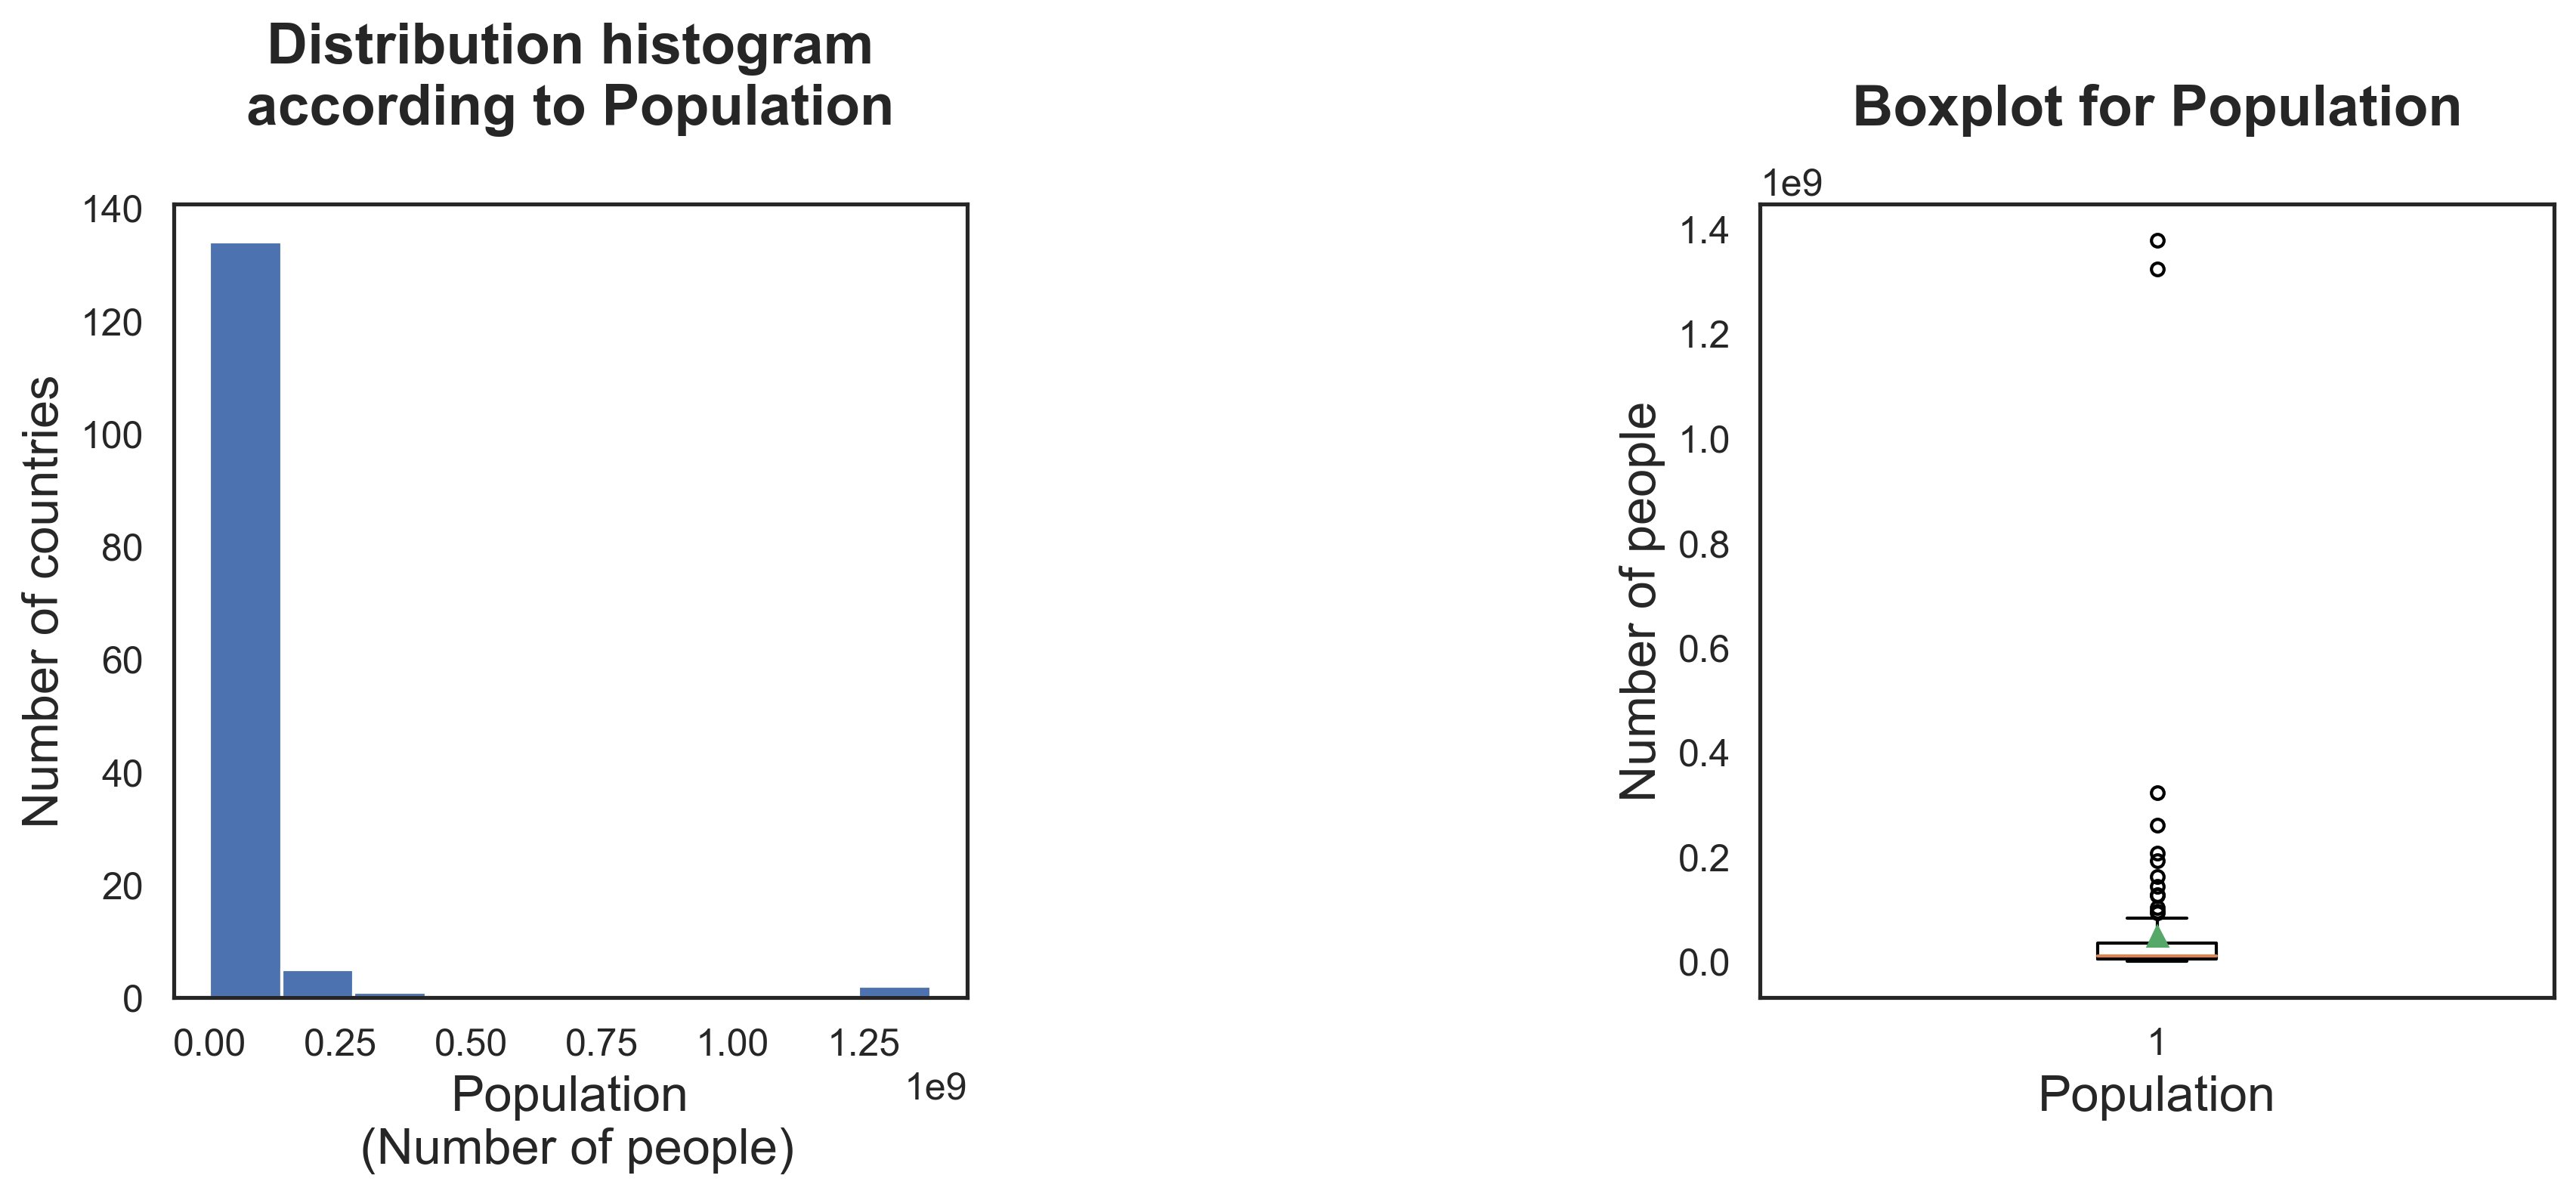

In [98]:
for i, variable in enumerate(numerical_variables):
    print("Figure for",variable)
    fig = plt.figure(figsize=(15, 5))
    plt.gcf().subplots_adjust(left=0.3,
                              bottom=0.3,
                              right=1,
                              top=1,
                              wspace=1,
                              hspace=0.5)
    
    # Plot a distribution histogram
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.hist(data_clean3[variable].sort_values())
    ax1.set_title("Distribution histogram""\n""according to {variable}""\n".format(variable=variable),
                  fontweight='bold')
    ax1.set(xlabel="{variable}""\n"" ({unite})".format(variable=variable,
                                                       unite=variable_unities[i]),
                                                       ylabel='Number of countries')

    # Boxplot
    ax2 = fig.add_subplot(1, 2, 2)
    plt.boxplot(data_clean3[variable],
                flierprops=dict(marker='o', markersize=4),
                showmeans=True)
    ax2.set_title("Boxplot for {variable}""\n".format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="{unite}".format(unite=variable_unities[i]))
    
    plt.show()

**Figure observations:**:
- For **'Secondary_completed' and 'Secondary_total'**:
    - No outlier
    - very spread out distribution suggesting a great disparity between countries
- For **'Tertiary_completed' and 'Tertiary_total'**:
    - 2 outliers are present
    - histogram peak in the left suggesting that most of the countries have a small proportion of their population going to the university.
- For **'Internet'**:
    - No outlier
    - very spread out distribution suggesting a great disparity between countries
- For **'GNI_per_capita'**:
    - Lot of ouliers suggeesting a strong disparity in wealth between countries. The outliers should correspond to the richest countries. This point will be checked below.
    - histogram peak in the left suggesting that most of the countries have a low GNI par capita
- For **'Expenditure'**:
    - 3 outliers are présents.
    - Normal distribution
- For **'Population_growth'**:
    - No outlier
    - very spread out distribution suggesting a great disparity between countries
- For **'Population'**:
    - Strong disparity between countries.

**Outlier verification for tertiary**  

In [99]:
data_clean3.loc[data_clean3['Tertiary_completed']>29]

NOM     NOM_ALPHA CODE Country Name Country Code  \
46   Corée du Sud  Corée du Sud  KOR  Korea, Rep.          KOR   
164     Singapour     Singapour  SGP    Singapore          SGP   

     Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
46                 35.46            45.28               30.04           41.64   
164                30.00            40.17               29.71           37.61   

      Internet  GNI_per_capita  Expenditure  Population_Growth  Population  \
46   92.716545         27600.0      5.05211           0.451318  51245707.0   
164  81.000000         51880.0      2.91579           1.297436   5607283.0   

                  Region Income Group  
46   East Asia & Pacific  High income  
164  East Asia & Pacific  High income

Outliers seems correspond to the reality. An OCDE study mention that Singapour and the South Korea have a fast expension in university.

**Outlier verification for 'GNI per capita'**  

In [100]:
data_clean3.loc[data_clean3['GNI_per_capita']>40000].sort_values(by='GNI_per_capita',
                                                                 ascending=False)


NOM            NOM_ALPHA CODE          Country Name  \
132              Norvège              Norvège  NOR                Norway   
172               Suisse               Suisse  CHE           Switzerland   
147                Qatar                Qatar  QAT                 Qatar   
106           Luxembourg           Luxembourg  LUX            Luxembourg   
86               Islande              Islande  ISL               Iceland   
51              Danemark             Danemark  DNK               Denmark   
62            États-Unis           États-Unis  USA         United States   
171                Suède                Suède  SWE                Sweden   
11             Australie            Australie  AUS             Australia   
164            Singapour            Singapour  SGP             Singapore   
85               Irlande              Irlande  IRL               Ireland   
142             Pays-Bas             Pays-Bas  NLD           Netherlands   
12              Autriche             Autriche  AUT               Austria   
65              Finlande             Finlande  FIN               Finland   
4              Allemagne            Allemagne  DEU               Germany   
34                Canada               Canada  CAN                Canada   
149          Royaume-Uni          Royaume-Uni  GBR        United Kingdom   
18              Belgique             Belgique  BEL               Belgium   
56   Émirats arabes unis  Émirats arabes unis  ARE  United Arab Emirates   

    Country Code  Secondary_completed  Secondary_total  Tertiary_completed  \
132          NOR                40.30            67.70               12.16   
172          CHE                48.33            65.75               17.88   
147          QAT                23.57            37.82               10.05   
106          LUX                27.58            46.75               18.54   
86           ISL                25.21            38.06               17.89   
51           DNK                38.88            66.69               14.98   
62           USA                36.19            42.96               26.76   
171          SWE                48.29            62.02               14.93   
11           AUS                38.49            60.71               18.52   
164          SGP                30.00            40.17               29.71   
85           IRL                24.69            41.83               26.80   
142          NLD                38.39            63.63               15.63   
12           AUT                40.81            59.96                9.37   
65           FIN                38.88            72.69               12.35   
4            DEU                54.75            73.00               13.14   
34           CAN                31.79            50.63               22.67   
149          GBR                47.31            59.45               15.31   
18           BEL                33.24            53.43               17.69   
56           ARE                35.68            53.27                8.54   

     Tertiary_total   Internet  GNI_per_capita  Expenditure  \
132           26.31  97.298204         82440.0      7.37329   
172           29.47  89.405568         81240.0      5.09608   
147           16.44  94.291118         75660.0      3.60719   
106           28.19  97.493930         71470.0      4.08388   
86            30.33  98.240016         56990.0      7.80585   
51            24.81  96.967785         56990.0      8.62711   
62            53.94  76.176737         56810.0      5.38078   
171           24.89  91.506828         54590.0      7.67509   
11            30.98  88.238658         54420.0      5.22534   
164           37.61  81.000000         51880.0      2.91579   
85            40.09  82.169700         51760.0      5.32457   
142           25.79  90.410959         46640.0      5.52938   
12            15.36  84.323331         45790.0      5.49955   
65            27.31  87.703650         45050.0      7.168

This list of countries and countries seems corresponf to data find on wikipedia and OCDE website.

**Outlier verification for eductional expenditure**  

In [101]:
data_clean3.loc[data_clean3['Expenditure']>9]

NOM NOM_ALPHA CODE Country Name Country Code  Secondary_completed  \
26  Botswana  Botswana  BWA     Botswana          BWA                29.03   
50      Cuba      Cuba  CUB         Cuba          CUB                29.48   
99   Lésotho   Lésotho  LSO      Lesotho          LSO                13.18   

    Secondary_total  Tertiary_completed  Tertiary_total   Internet  \
26            80.04                2.02            3.89  39.362997   
50            60.60               13.32           19.30  38.765867   
99            20.79                0.76            1.37  27.360000   

    GNI_per_capita  Expenditure  Population_Growth  Population  \
26          6750.0      9.63292           1.841666   2250260.0   
50          6570.0     12.83727           0.126867  11475982.0   
99          1270.0     11.36114           1.332724   2203821.0   

                       Region         Income Group  
26         Sub-Saharan Africa  Upper middle income  
50  Latin America & Caribbean  Upper middle income  
99         Sub-Saharan Africa  Lower middle income

These data correspond with the information on wikipédia.

**Outlier verification for population**  

In [102]:
data_clean3.loc[data_clean3['Population']>1000000000]

NOM NOM_ALPHA CODE Country Name Country Code  Secondary_completed  \
38  Chine     Chine  CHN        China          CHN                22.85   
81   Inde      Inde  IND        India          IND                25.03   

    Secondary_total  Tertiary_completed  Tertiary_total   Internet  \
38            66.47                2.71            4.48  53.200000   
81            41.53                4.85            8.50  29.547163   

    GNI_per_capita  Expenditure  Population_Growth    Population  \
38          8250.0      1.88730           0.541479  1.378665e+09   
81          1670.0      3.84236           1.148215  1.324171e+09   

                 Region         Income Group  
38  East Asia & Pacific  Upper middle income  
81           South Asia  Lower middle income

These values matches the reality.

#### <a name="C5222">5.2.2.2. Analysis according to geographic area or income group</a>

The goal is to obtain:
1. boxplot according to the geographic region
2. boxplot according to the income group

In [103]:
region_list = data_clean3["Region"].unique()
print(region_list)

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']


In [104]:
# Ordered region list
region_list = ['North America',
               'Europe & Central Asia',
               'East Asia & Pacific',
               'Middle East & North Africa',
               'Latin America & Caribbean',
               'South Asia',
               'Sub-Saharan Africa']

**Define an income group list**

In [105]:
incomegroup_list = data_clean3["Income Group"].unique()
print(incomegroup_list)

['Low income' 'Upper middle income' 'High income' 'Lower middle income']


In [106]:
# DOrdered incomegroup_list
incomegroup_list = ['High income',
                    'Upper middle income',
                    'Lower middle income',
                    'Low income']

For Secondary_completed


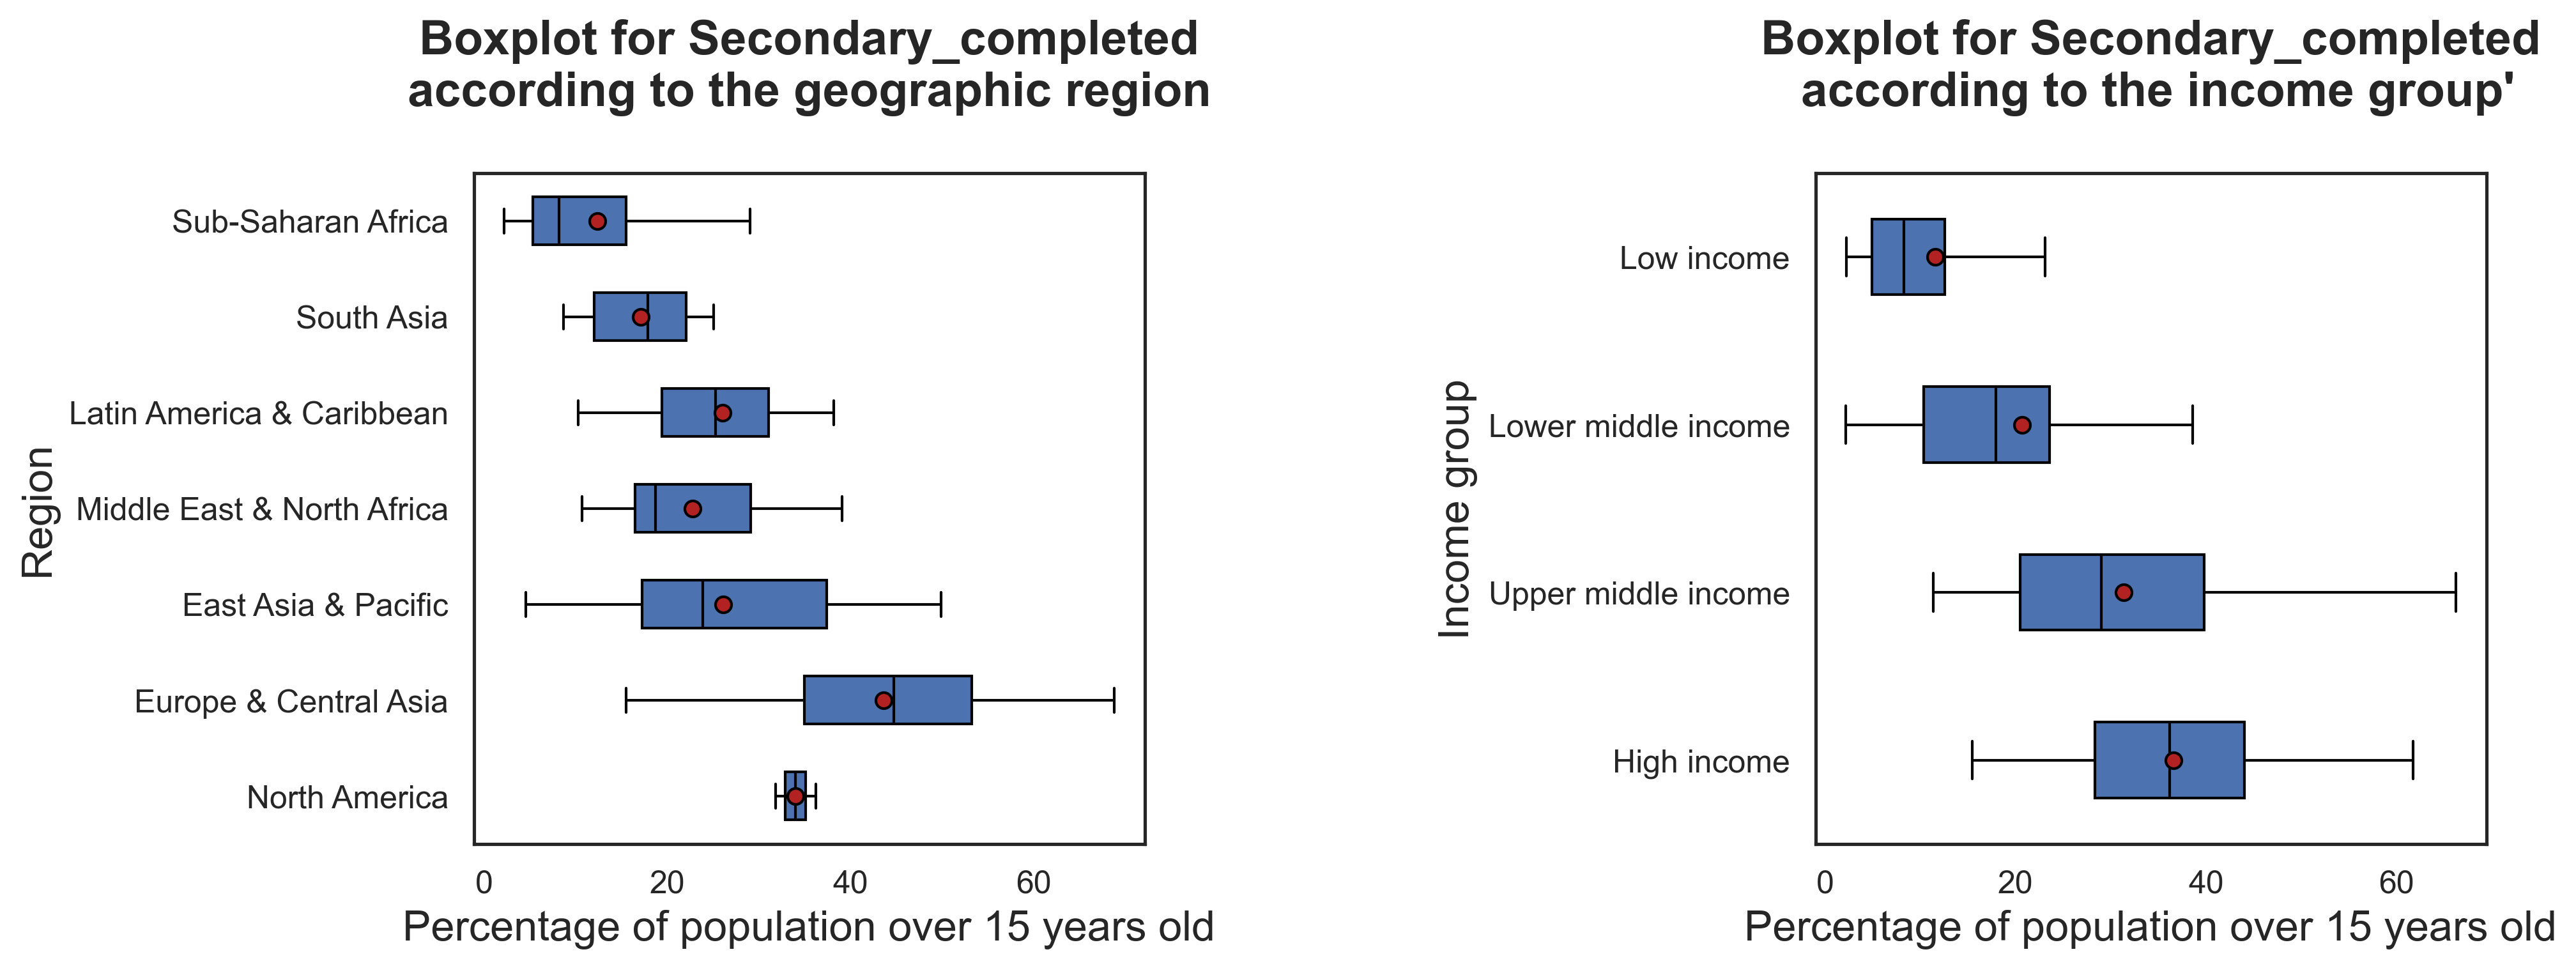

For Secondary_total


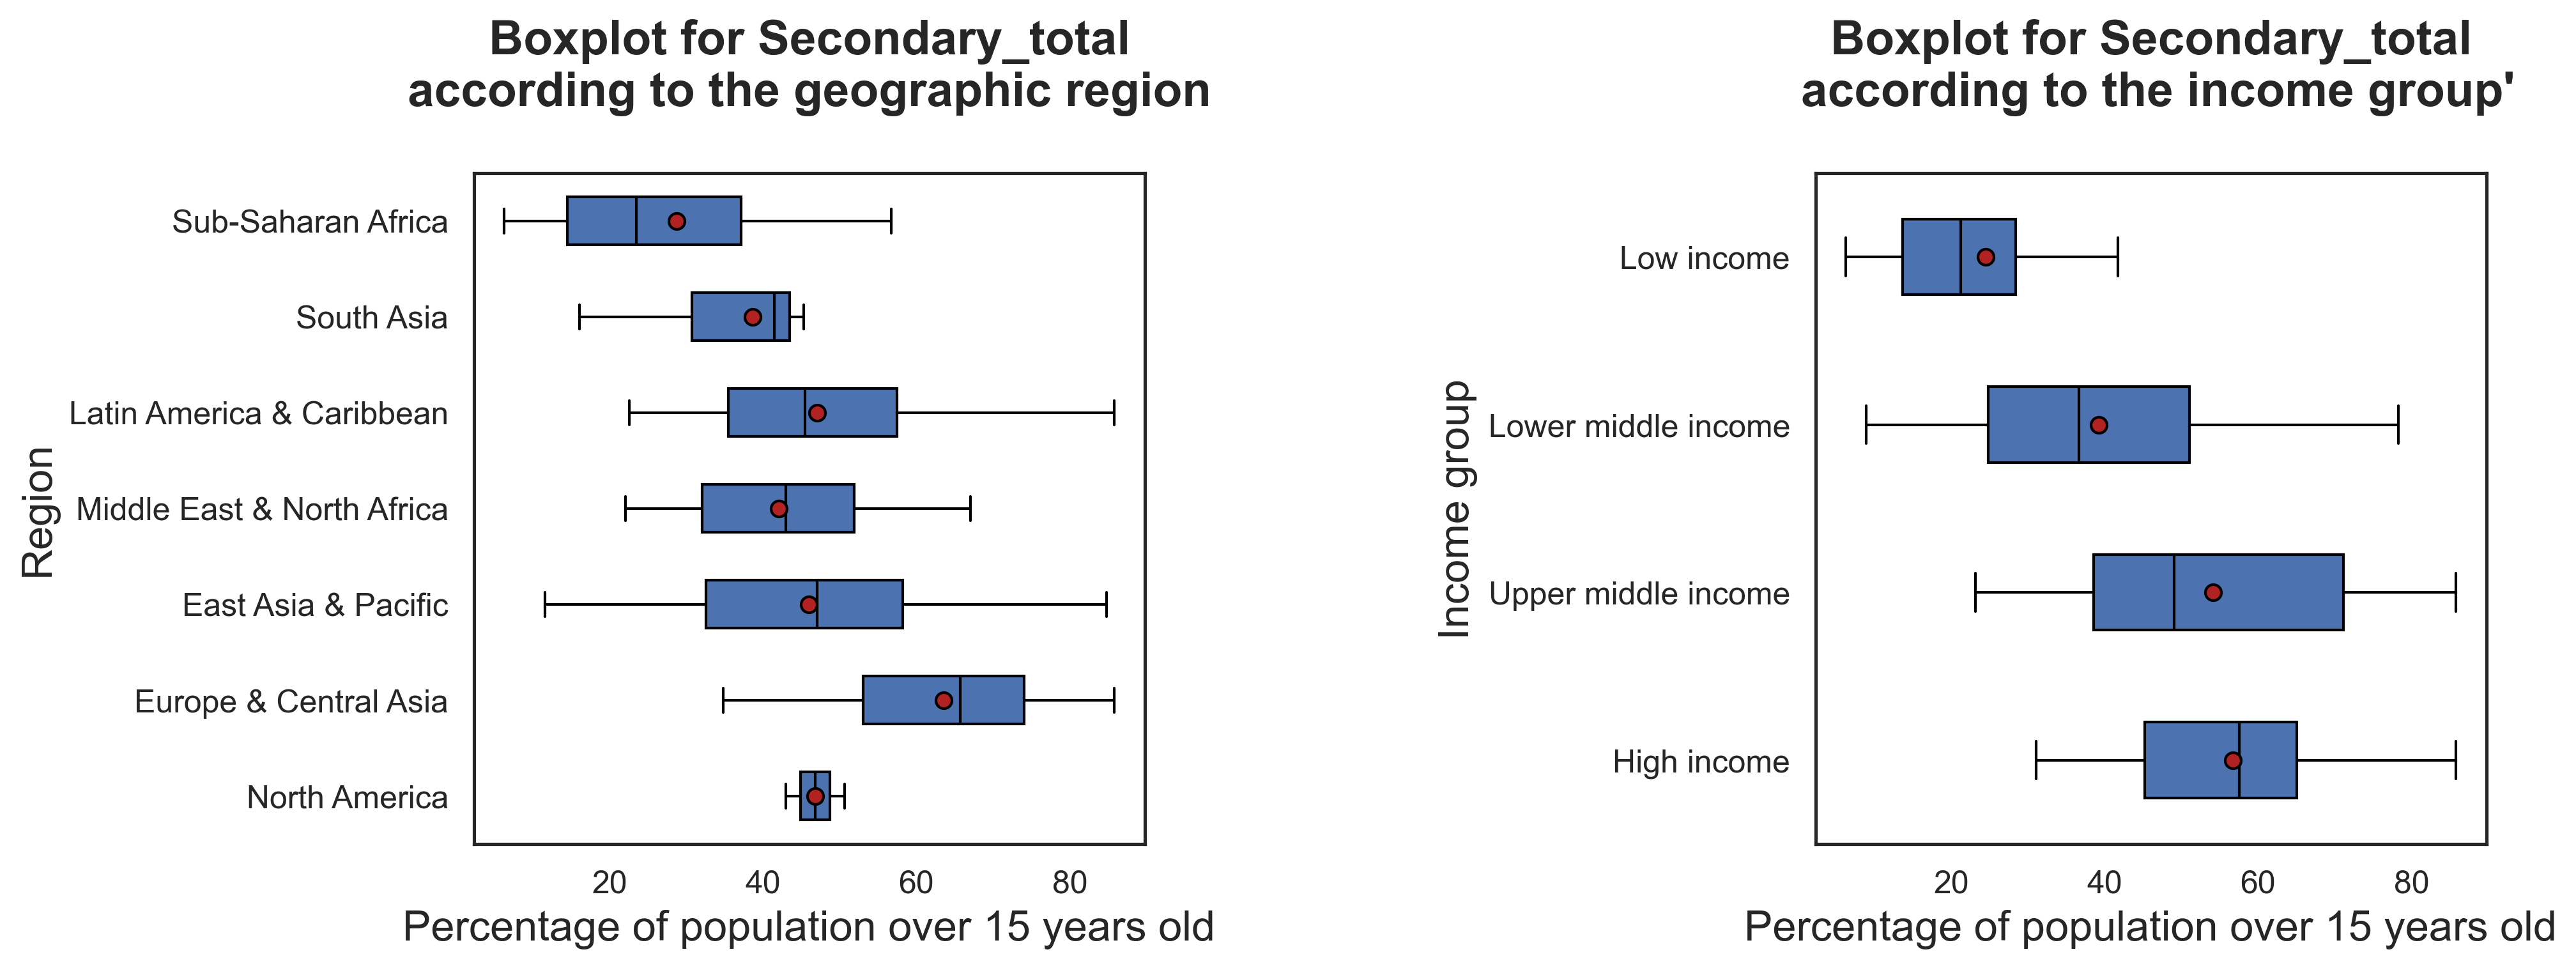

For Tertiary_completed


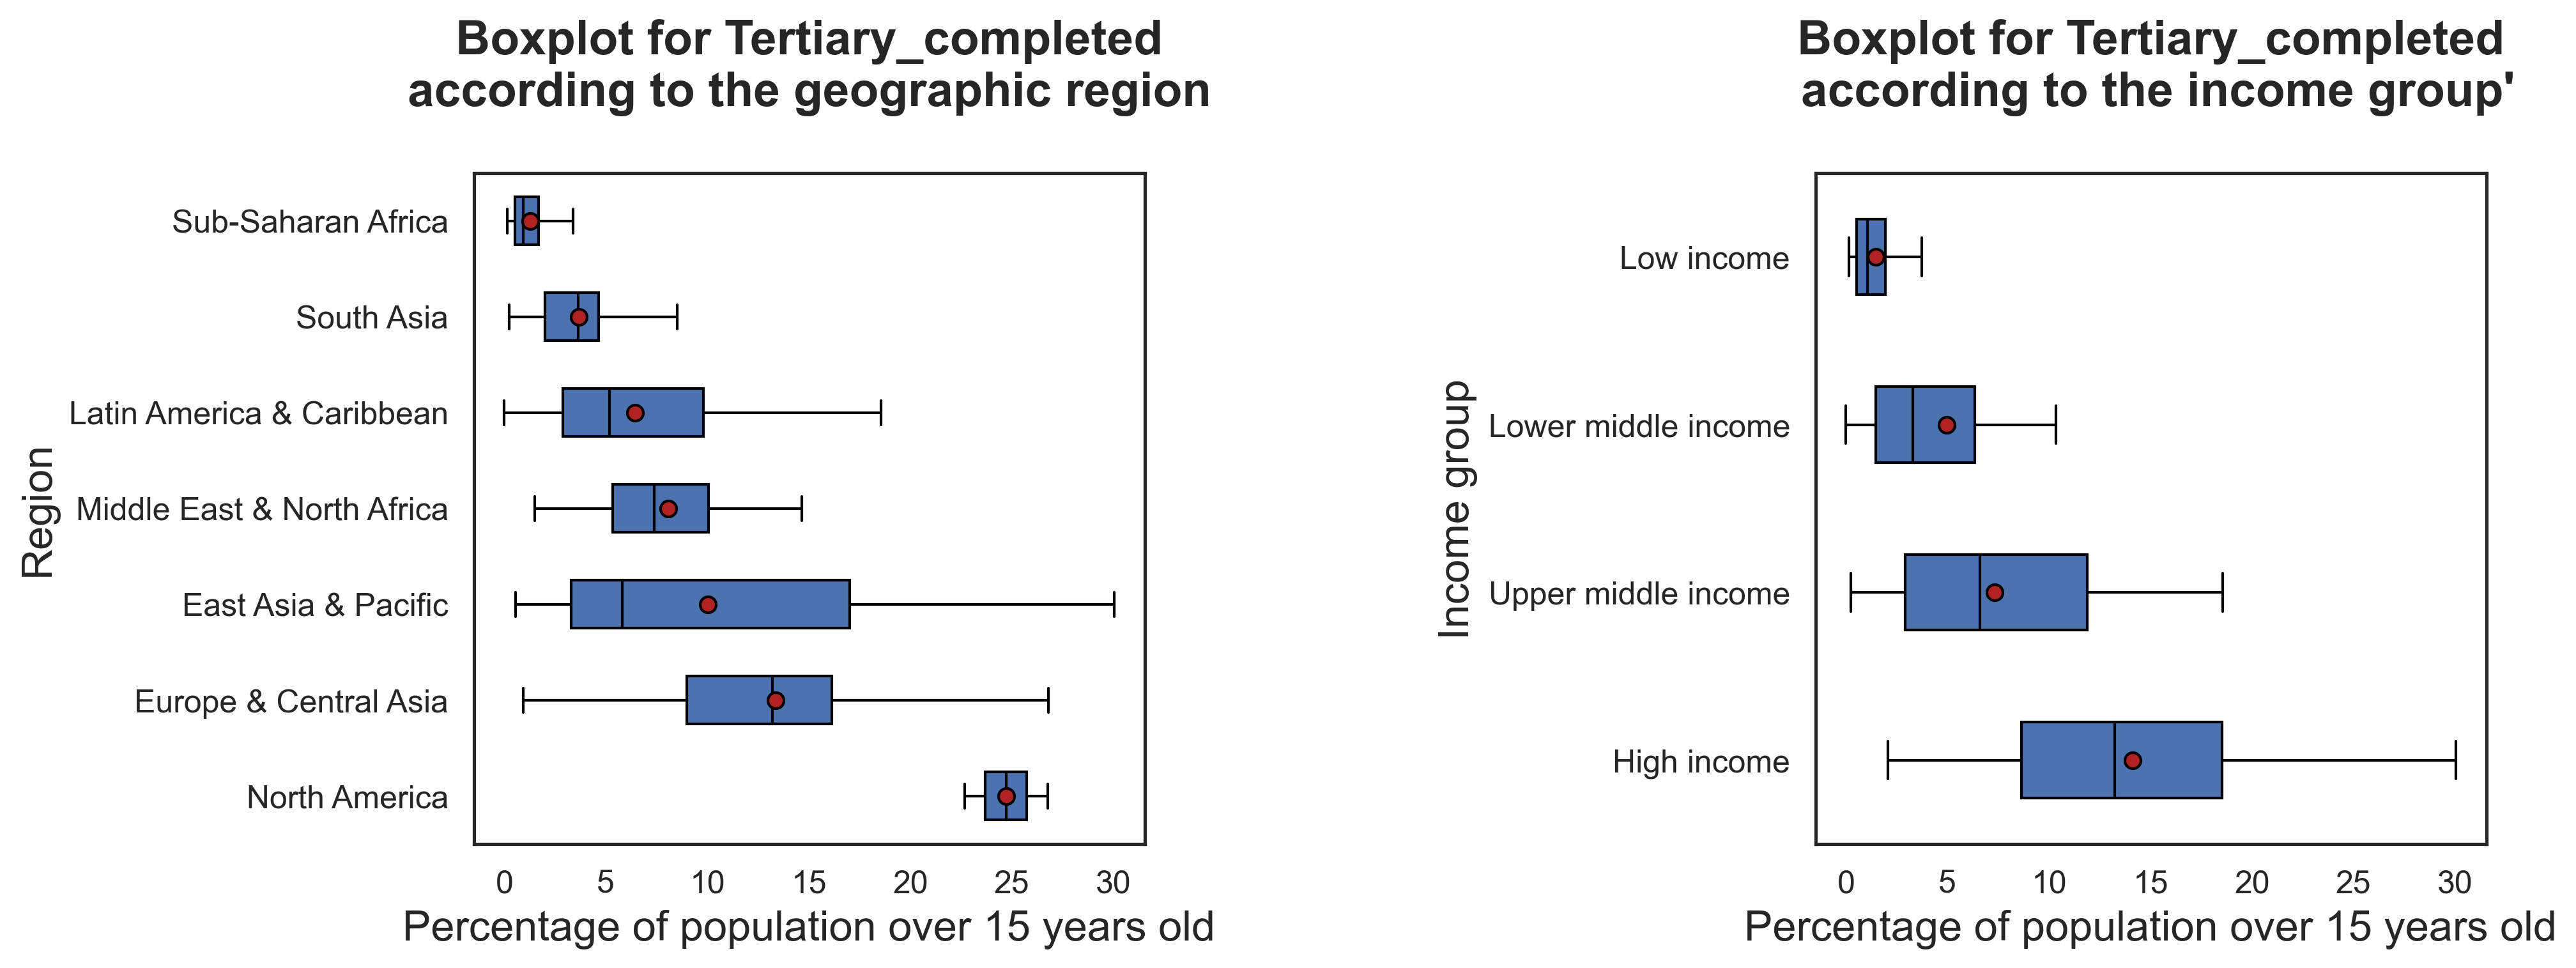

For Tertiary_total


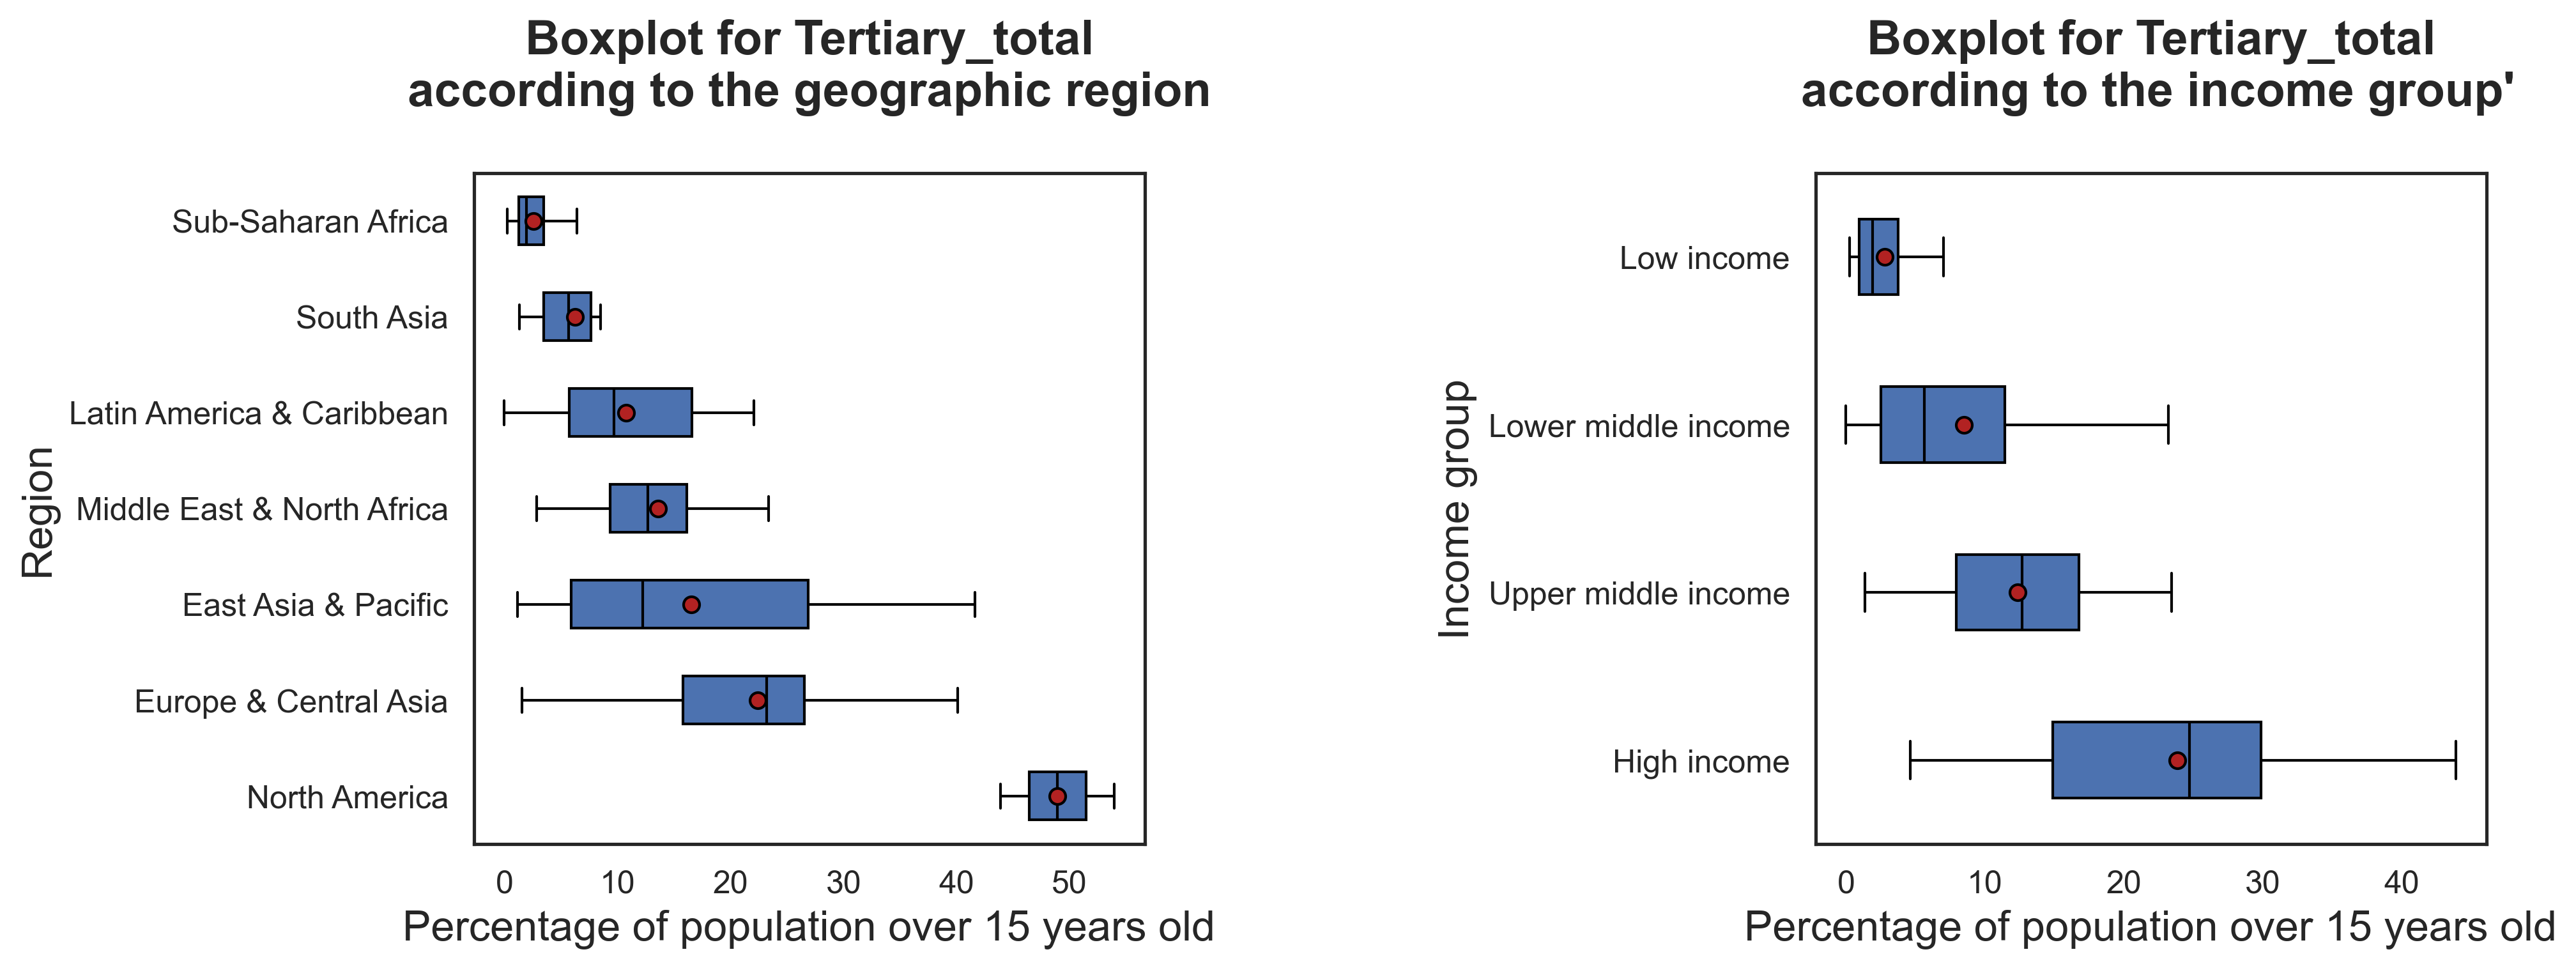

For Internet


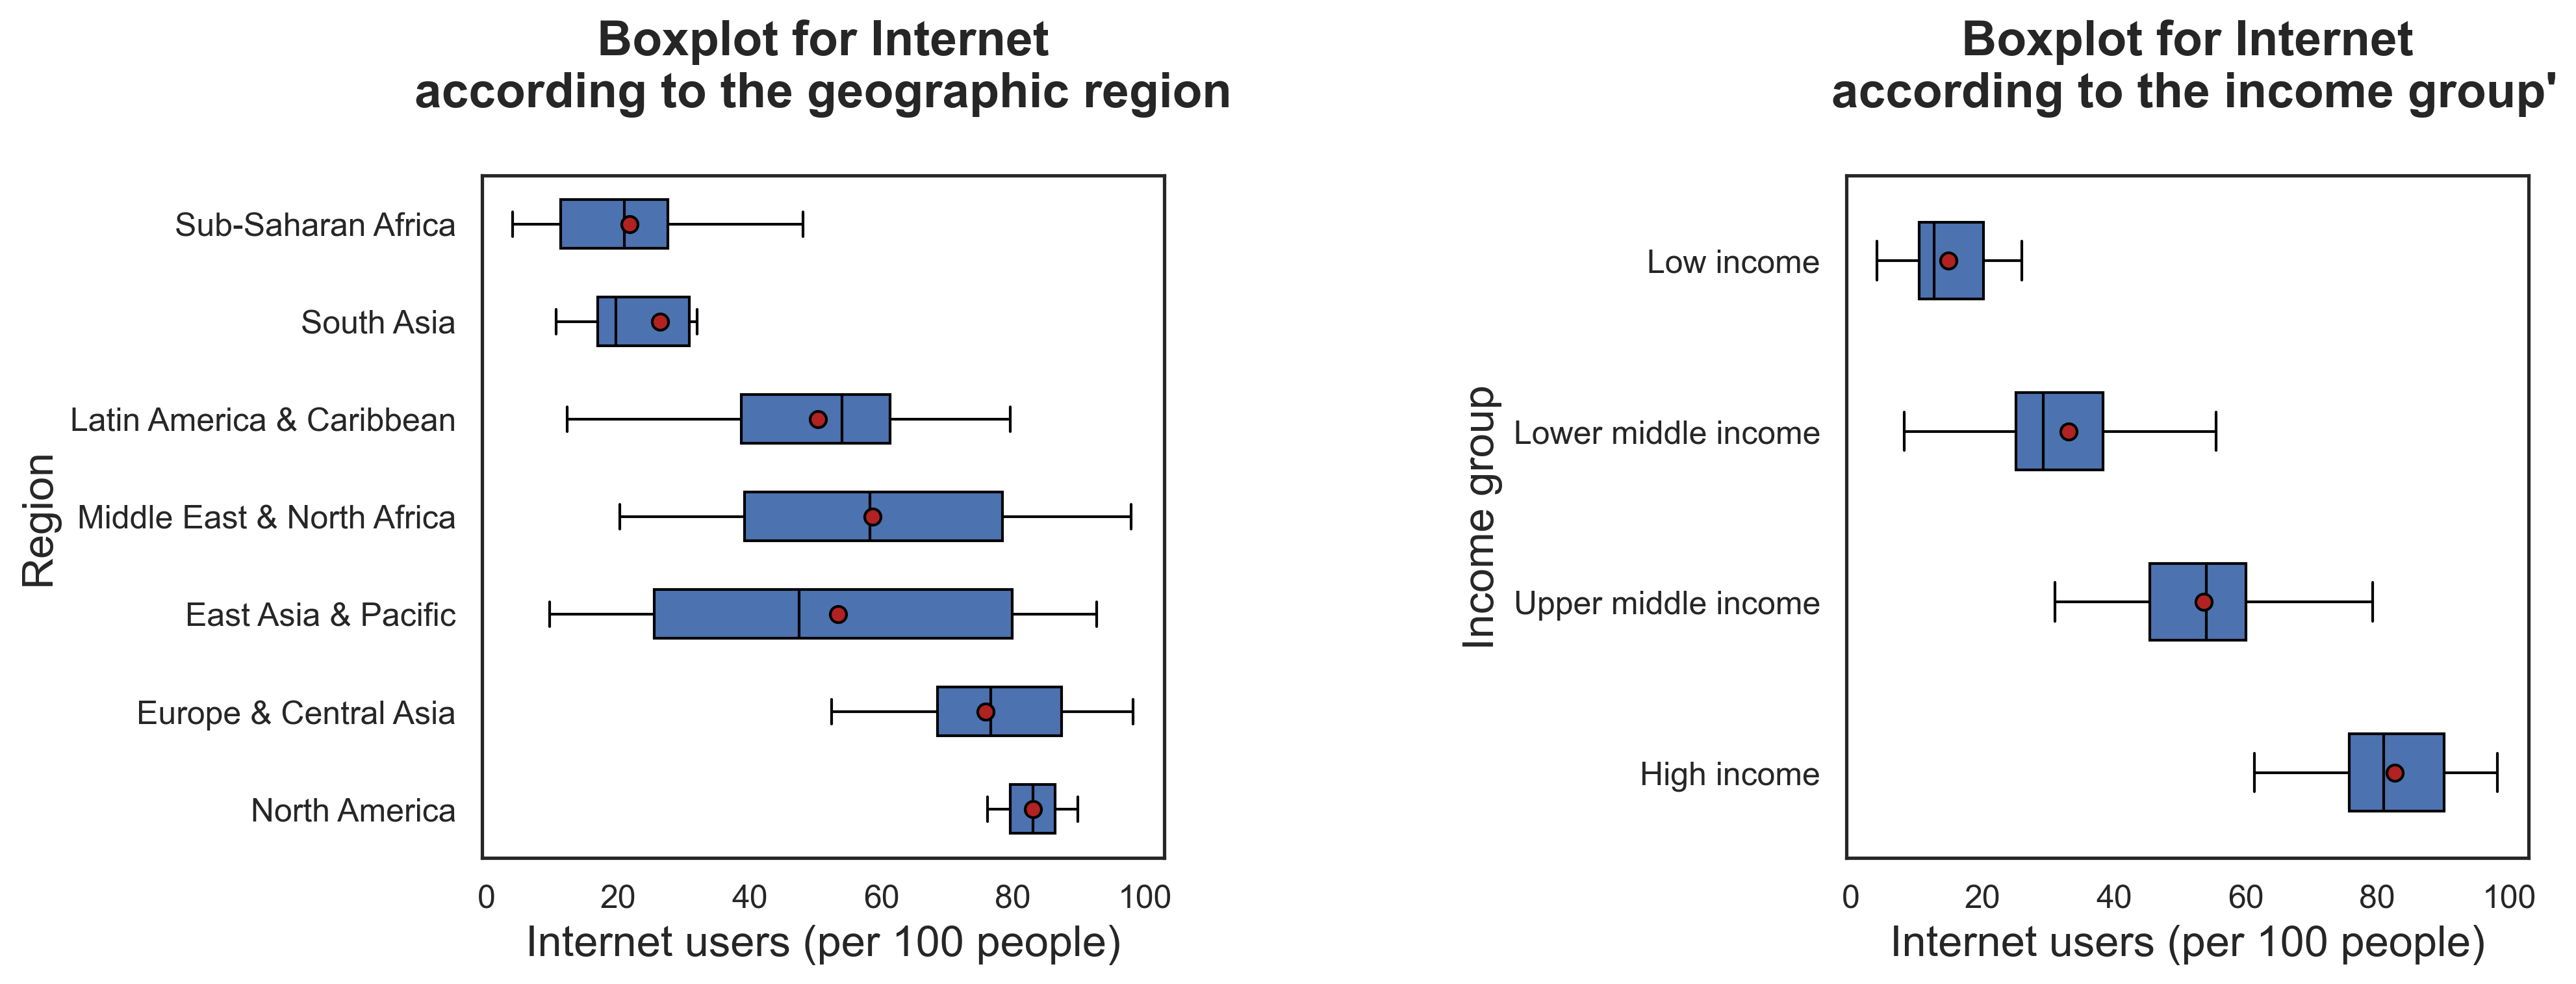

For GNI_per_capita


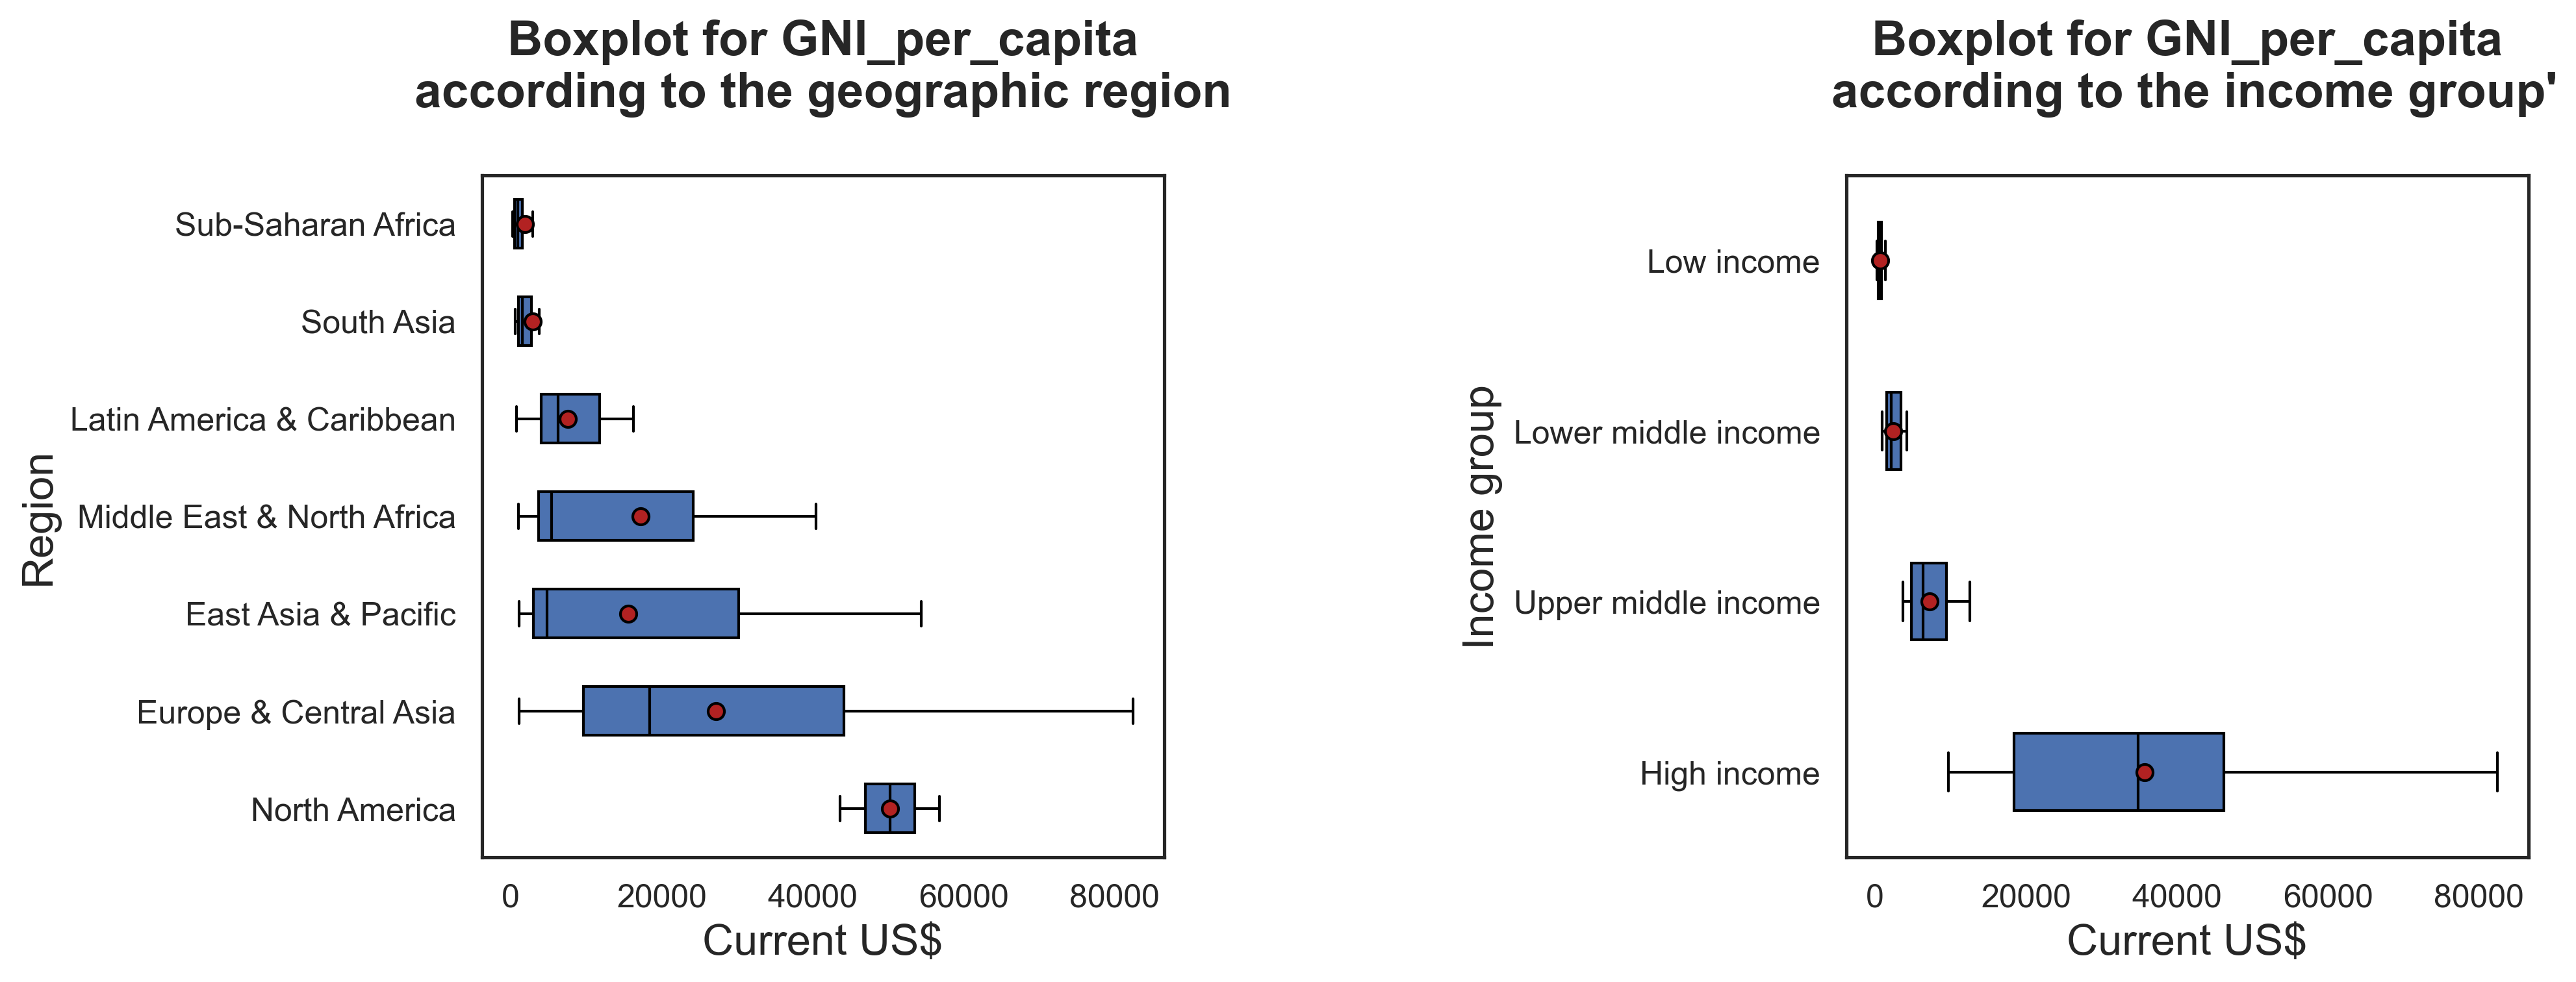

For Expenditure


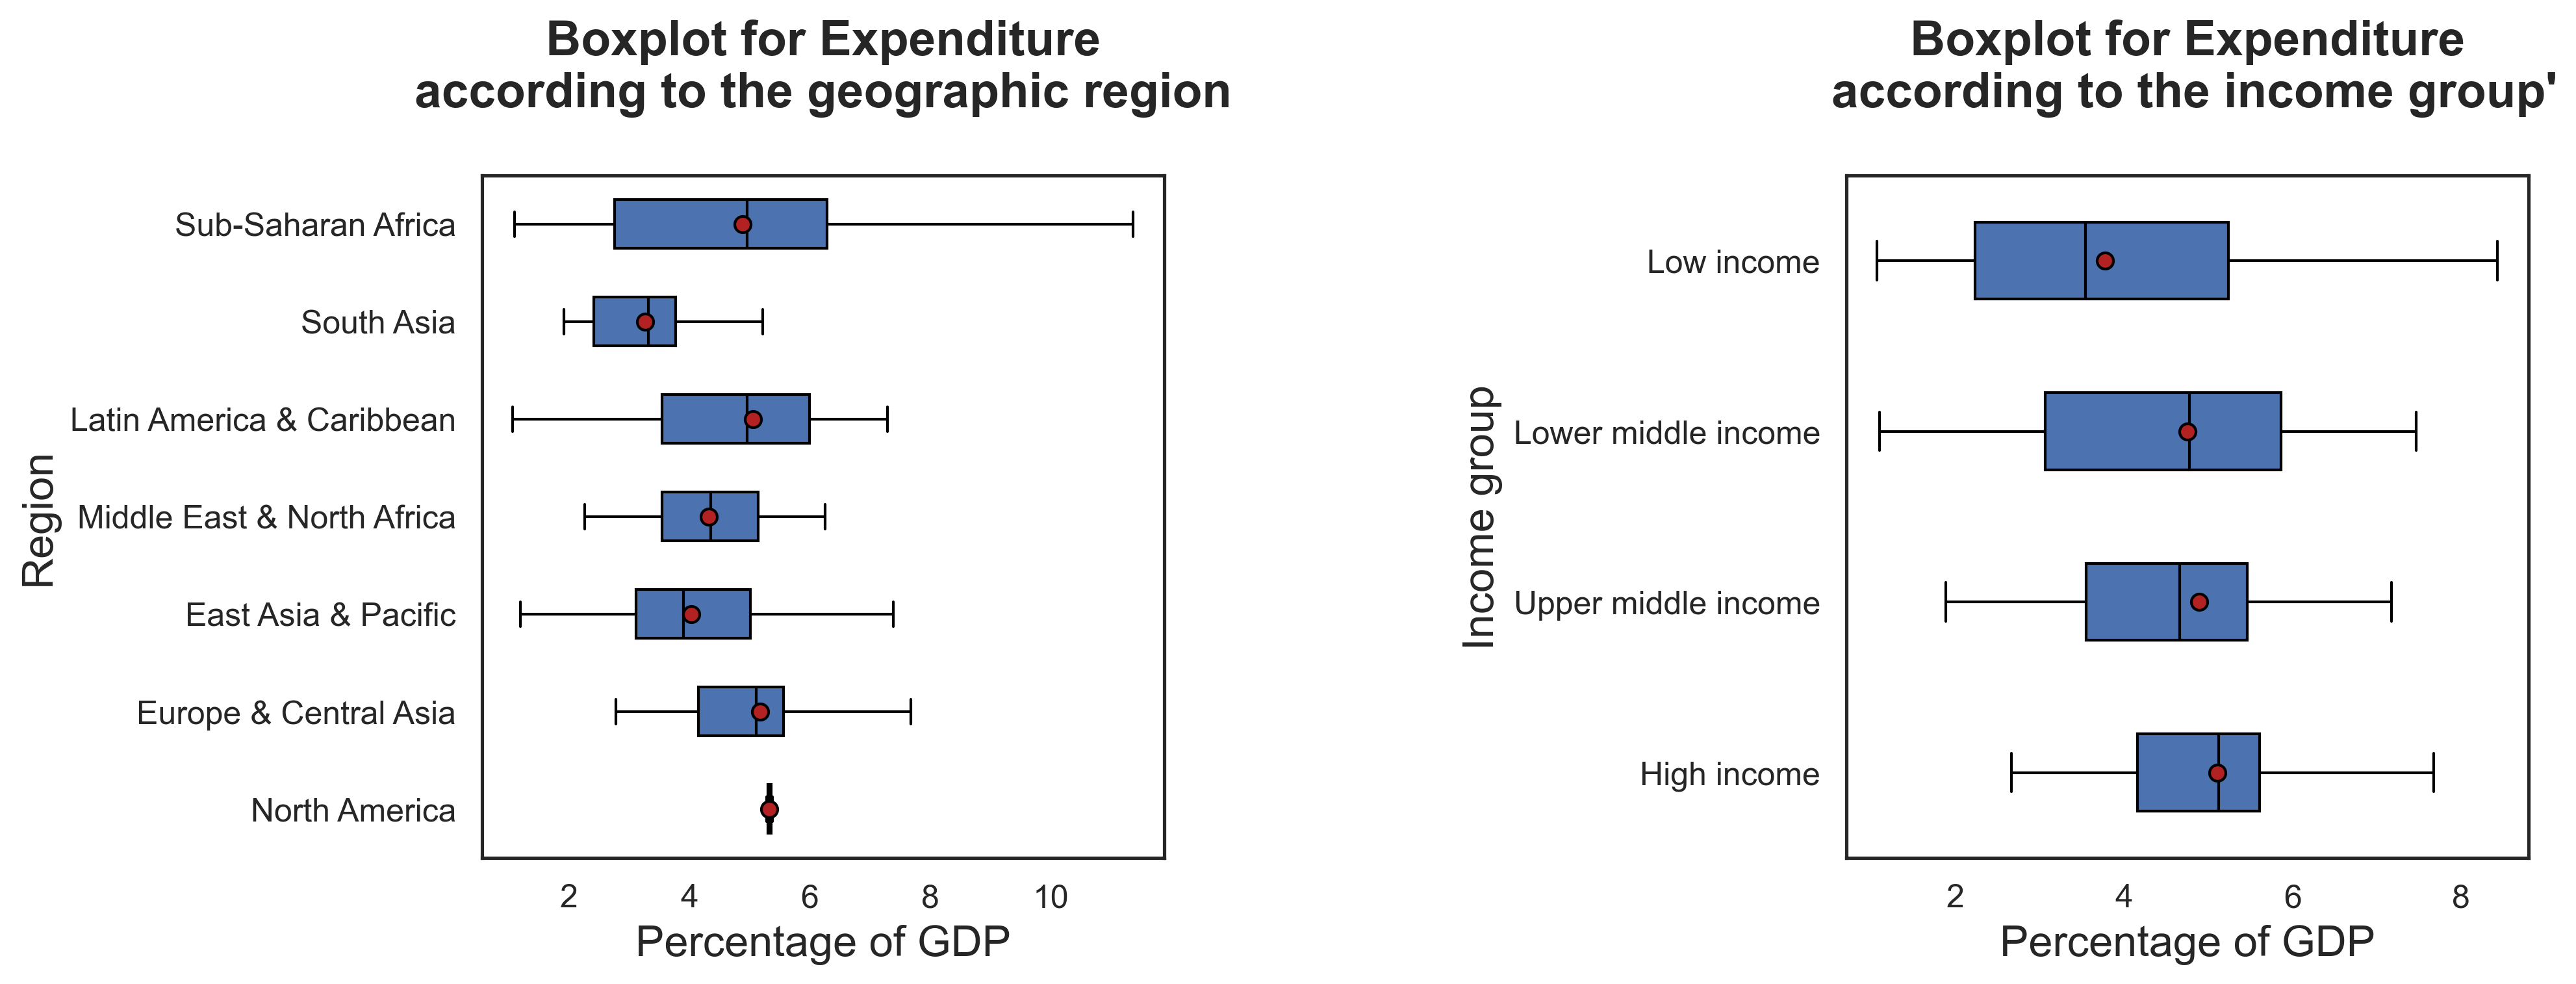

For Population_Growth


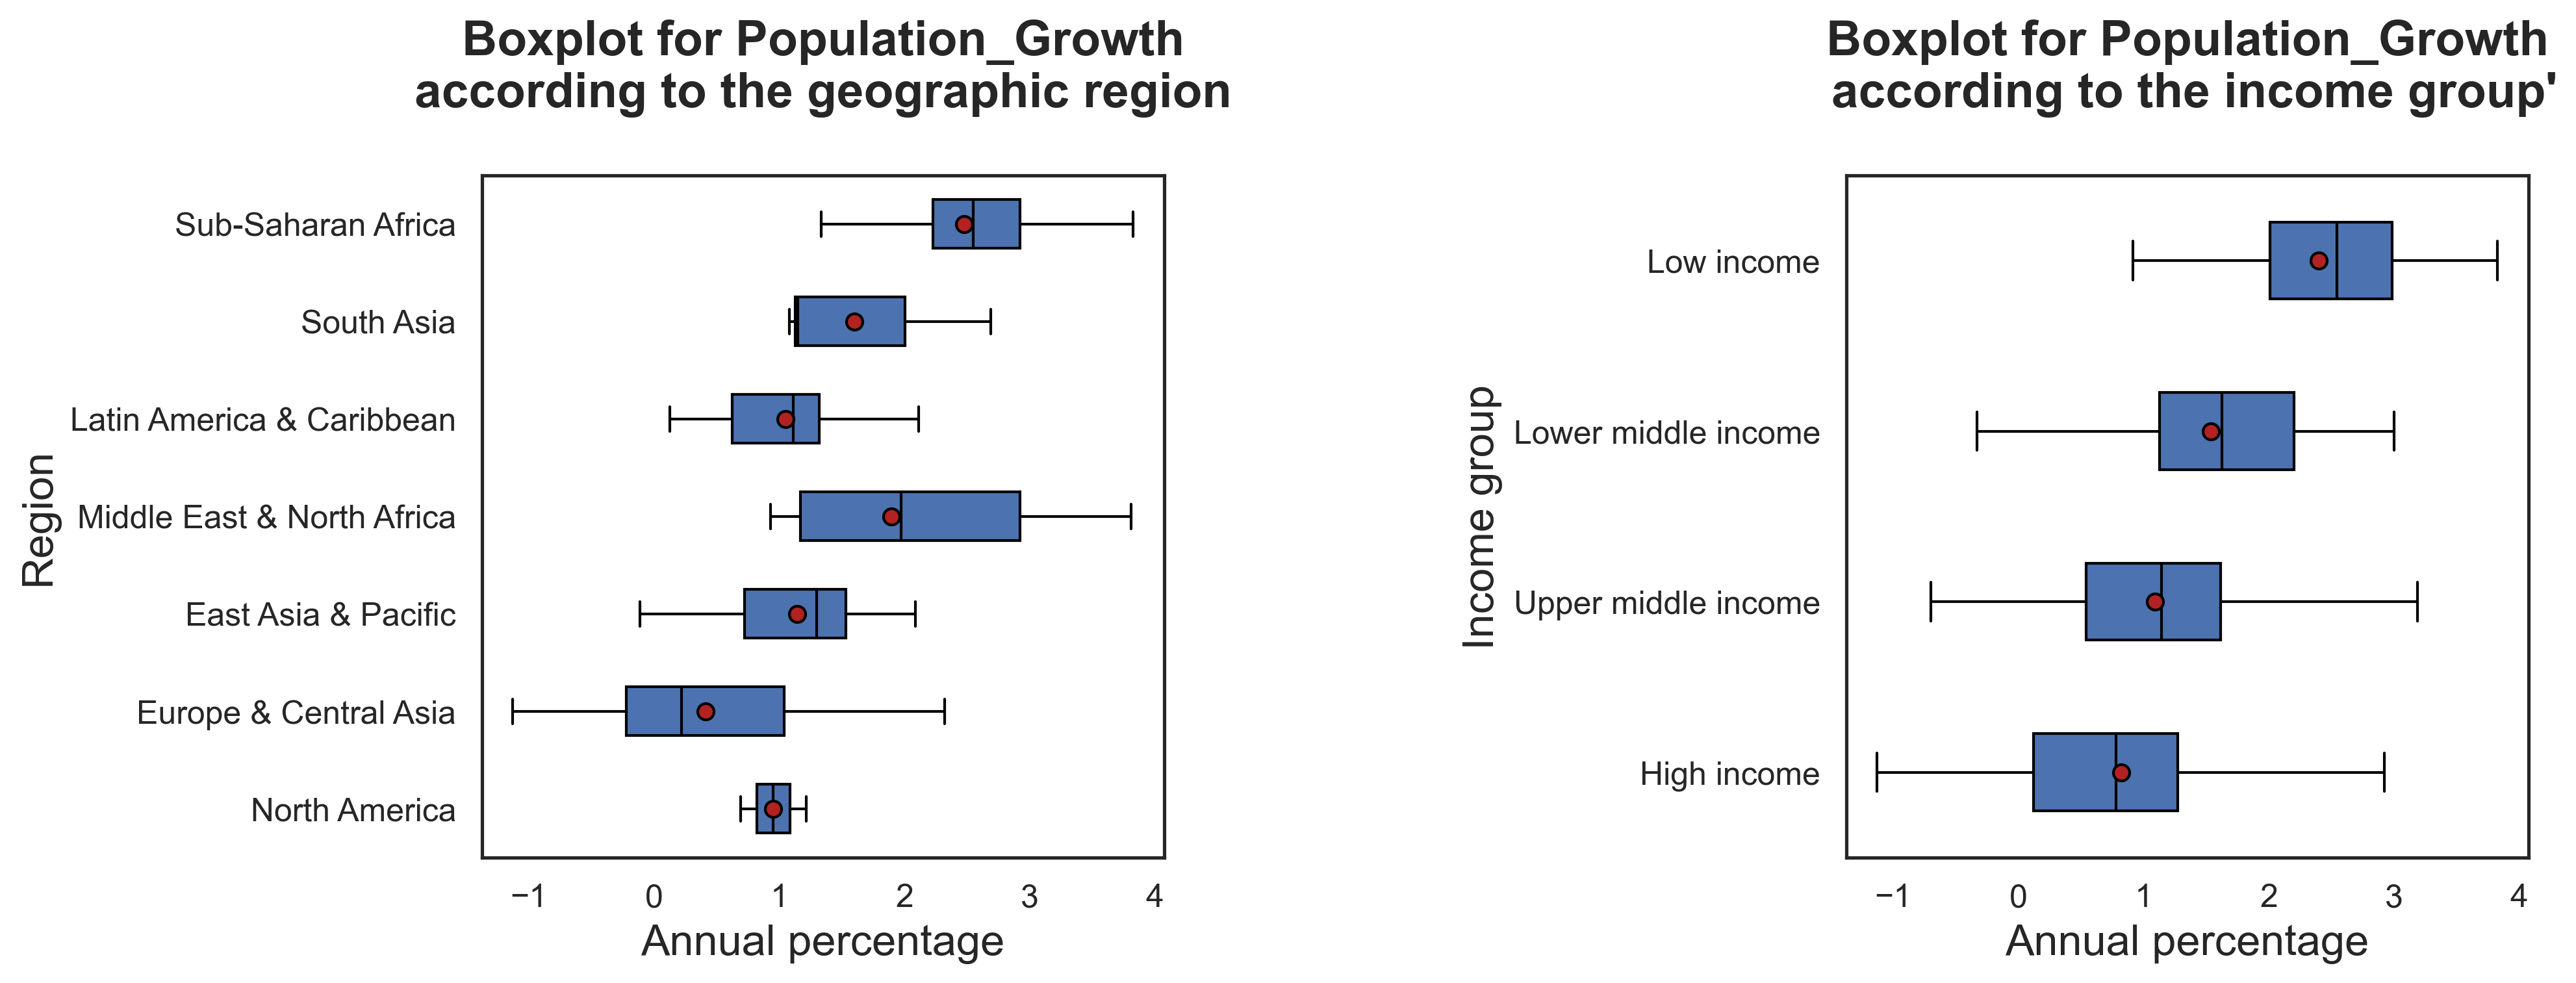

For Population


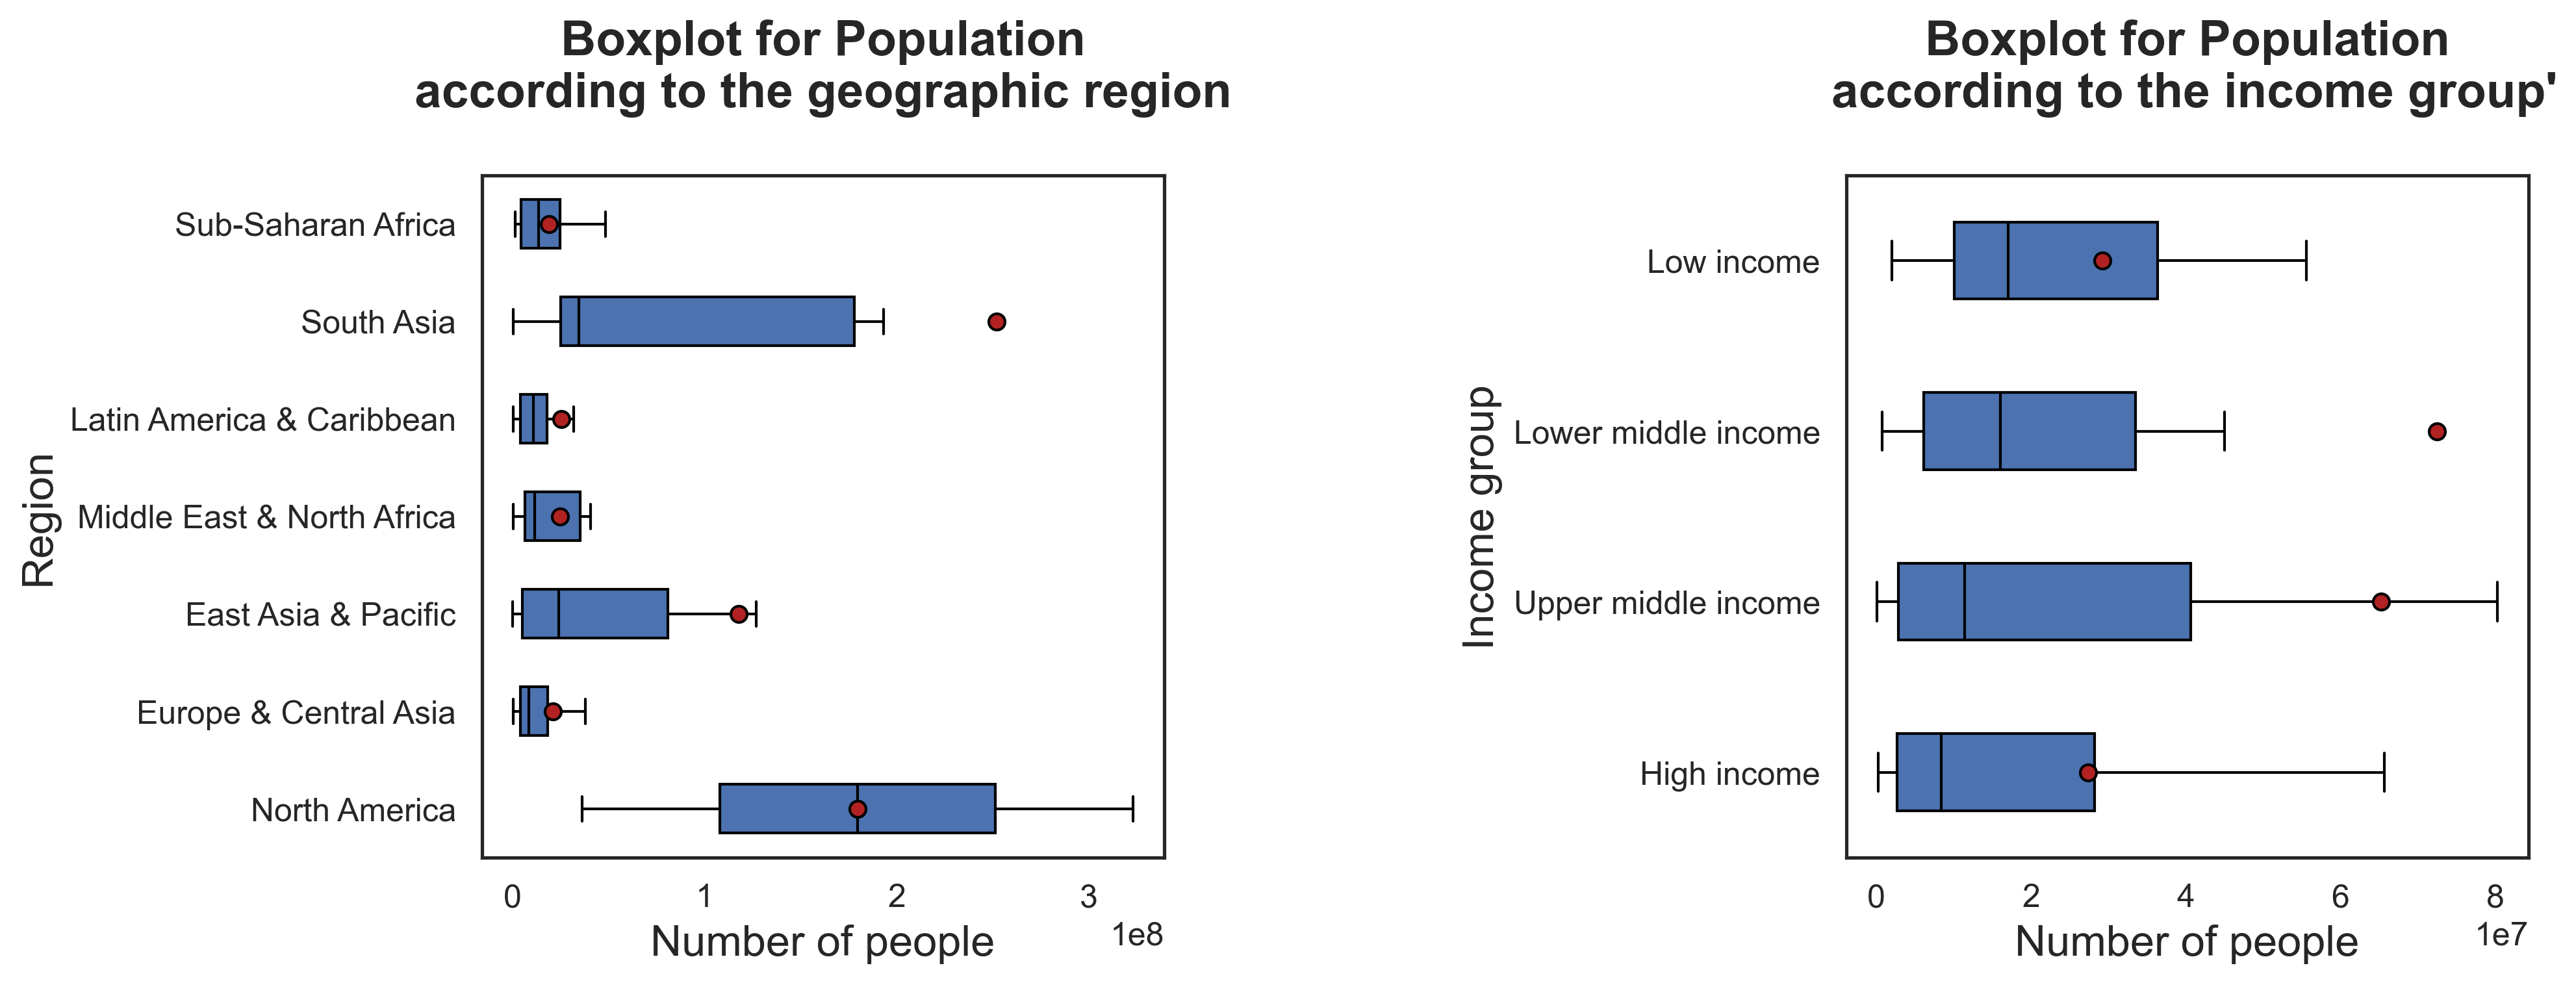

In [107]:
for i, variable in enumerate(numerical_variables):
    print("For", variable)
    fig = plt.figure(figsize=(15, 5))
    plt.gcf().subplots_adjust(left=0.3,
                              bottom=0.3,
                              right=1,
                              top=1,
                              wspace=1,
                              hspace=0.5)    
    
    # Boxplot by geographic region
    modalites = region_list
    groupes = []
    for m in modalites:
        groupes.append(data_clean3[data_clean3["Region"] == m][variable])
    
    ax2 = fig.add_subplot(1, 2, 1)
    ax2.set_title("Boxplot for {variable}""\n""according to the geographic region""\n".format(variable=variable),fontweight='bold')
    ax2.set(xlabel="{unite}".format(variable=variable,
                                    unite=variable_unities[i]),
            ylabel='Region')
    
    # Graph properties  
    medianprops = {'color': "black"}
    meanprops = {'marker': 'o',
                 'markeredgecolor': 'black',
                 'markerfacecolor': 'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)

    # Boxplot according the income group   
    modalites = incomegroup_list
    groupes = []
    for m in modalites:
        groupes.append(data_clean3[data_clean3["Income Group"] == m][variable])
    
    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_title("Boxplot for {variable}""\n"" according to the income group'""\n".format(variable=variable),fontweight='bold')
    ax3.set(xlabel="{unite}".format(variable=variable,
                                    unite=variable_unities[i]),
            ylabel='Income group')
    
    # Graph properties  
    medianprops = {'color': "black"}
    meanprops = {'marker': 'o',
                 'markeredgecolor': 'black',
                 'markerfacecolor': 'firebrick'}
    
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)    

    plt.show()

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C53">5.3 Summary table by geographic area and income group</a></div>


In [108]:
data_clean3.groupby(["Region","Income Group"]).mean()

Secondary_completed  \
Region                     Income Group                               
East Asia & Pacific        High income                    31.858333   
                           Low income                      7.010000   
                           Lower middle income            20.548333   
                           Upper middle income            33.572000   
Europe & Central Asia      High income                    40.619643   
                           Low income                     62.270000   
                           Lower middle income            53.760000   
                           Upper middle income            47.058571   
Latin America & Caribbean  High income                    32.247500   
                           Low income                     23.100000   
                           Lower middle income            19.731429   
                           Upper middle income            27.763846   
Middle East & North Africa High income                    27.808571   
                           Lower middle income            16.820000   
                           Upper middle income            20.756667   
North America              High income                    33.990000   
South Asia                 Low income                     15.403333   
                           Lower middle income            20.683333   
                           Upper middle income            11.380000   
Sub-Saharan Africa         Low income                      7.756471   
                           Lower middle income             9.670000   
                           Upper middle income            33.356000   

                                                Secondary_total  \
Region                     Income Group                           
East Asia & Pacific        High income                48.350000   
                           Low income                 15.725000   
                           Lower middle income        42.076667   
                           Upper middle income        60.090000   
Europe & Central Asia      High income                60.116429   
                           Low income                 83.240000   
                           Lower middle income        69.037500   
                           Upper middle income        71.427143   
Latin America & Caribbean  High income                62.985000   
                           Low income                 27.980000   
                           Lower middle income        37.505714   
                           Upper middle income        48.773846   
Middle East & North Africa High income                49.670000   
                           Lower middle income        32.370000   
                           Upper middle income        39.628333   
North America              High income                46.795000   
South Asia                 Low income                 29.213333   
                           Lower middle income        45.920000   
                           Upper middle income        45.310000   
Sub-Saharan Africa         Low income                 21.061176   
                           Lower middle income        27.720000   
                           Upper middle income        57.060000   

                                                Tertiary_completed  \
Region                     Income Group                              
East Asia & Pacific        High income                   19.865000   
                           Low income                     3.235000   
                           Lower middle income            5.996667   
                           Upper middle income            5.786000   
Europe & Central Asia      High income                   14.615000   
                           Low income                     3.740000   
                           Lower middle income           14.335000   
                           Upper middle income            9.181429   
Latin America & Caribbean  High in

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

# <div class="alert alert-block alert-info"><a name="C6">6. Attractiveness score determination for each country</a></div>

In order to class the countries, I choose to calculate an attractiveness score using all the selected numerical variables.

To calculate this score, I need to normalize some variables ('GNI per capita' and 'Population'). With this normalization, all the numerical variables will be express in percentage.

## <div class="alert alert-block alert-info"><a name="C61">6.1. Normalization</a></div>

### <a name="C611">6.1.1. 'GNI per capita' normalization</a>


In [109]:
minmax_scale = MinMaxScaler().fit(data_clean3[['GNI_per_capita']])
normalized = minmax_scale.transform(data_clean3[['GNI_per_capita']])

# To get percent
normalized = normalized*100

data_GNI_normalized = data_clean3.copy()
data_GNI_normalized['Normalized_GNI_per_capita'] = normalized
data_GNI_normalized.head()

NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  GNI_per_capita  Expenditure  Population_Growth  Population  \
0  10.595726           570.0      3.31754           2.689163  34656032.0   
1  54.000000          5490.0      6.02955           1.617203  55908865.0   
2  66.363445          4180.0      3.53944          -0.159880   2876101.0   
3  42.945527          4220.0      4.35425           1.825463  40606052.0   
4  89.647101         43850.0      4.95219           1.193867  82667685.0   

                       Region         Income Group  Normalized_GNI_per_capita  
0                  South Asia           Low income                   0.352970  
1          Sub-Saharan Africa  Upper middle income                   6.341285  
2       Europe & Central Asia  Upper middle income                   4.746835  
3  Middle East & North Africa  Upper middle income                   4.795521  
4       Europe & Central Asia          High income                  53.030672

### <a name="C612">6.1.2. 'Population' normalization</a>

In [110]:
minmax_scale = MinMaxScaler().fit(data_GNI_normalized[['Population']])
normalized = minmax_scale.transform(data_GNI_normalized[['Population']])

# to get in percent
normalized = normalized*100

# Add this value to the dataframe
data_GNI_pop_normalized = data_GNI_normalized.copy()
data_GNI_pop_normalized['Normalized_population']= normalized
data_GNI_pop_normalized.head()

NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  GNI_per_capita  Expenditure  Population_Growth  Population  \
0  10.595726           570.0      3.31754           2.689163  34656032.0   
1  54.000000          5490.0      6.02955           1.617203  55908865.0   
2  66.363445          4180.0      3.53944          -0.159880   2876101.0   
3  42.945527          4220.0      4.35425           1.825463  40606052.0   
4  89.647101         43850.0      4.95219           1.193867  82667685.0   

                       Region         Income Group  Normalized_GNI_per_capita  \
0                  South Asia           Low income                   0.352970   
1          Sub-Saharan Africa  Upper middle income                   6.341285   
2       Europe & Central Asia  Upper middle income                   4.746835   
3  Middle East & North Africa  Upper middle income                   4.795521   
4       Europe & Central Asia          High income                  53.030672   

   Normalized_population  
0               2.506163  
1               4.047835  
2               0.200861  
3               2.937775  
4               5.988908

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C62">6.2. Attractiveness score determination</a></div>

In [111]:
# Drop unnecessary variables
data_normalized = data_GNI_pop_normalized.copy()
del data_normalized['GNI_per_capita']
del data_normalized['Population']

print(data_normalized.shape)
data_normalized.head()

(142, 16)


NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  Expenditure  Population_Growth                      Region  \
0  10.595726      3.31754           2.689163                  South Asia   
1  54.000000      6.02955           1.617203          Sub-Saharan Africa   
2  66.363445      3.53944          -0.159880       Europe & Central Asia   
3  42.945527      4.35425           1.825463  Middle East & North Africa   
4  89.647101      4.95219           1.193867       Europe & Central Asia   

          Income Group  Normalized_GNI_per_capita  Normalized_population  
0           Low income                   0.352970               2.506163  
1  Upper middle income                   6.341285               4.047835  
2  Upper middle income                   4.746835               0.200861  
3  Upper middle income                   4.795521               2.937775  
4          High income                  53.030672               5.988908

In [112]:
score = data_normalized.mean(axis=1)
data_normalized['Attractiveness_score'] = score 

data_normalized.head()    

C:\Users\virgi\AppData\Local\Temp\ipykernel_23596\3509889734.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score = data_normalized.mean(axis=1)


NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  Expenditure  Population_Growth                      Region  \
0  10.595726      3.31754           2.689163                  South Asia   
1  54.000000      6.02955           1.617203          Sub-Saharan Africa   
2  66.363445      3.53944          -0.159880       Europe & Central Asia   
3  42.945527      4.35425           1.825463  Middle East & North Africa   
4  89.647101      4.95219           1.193867       Europe & Central Asia   

          Income Group  Normalized_GNI_per_capita  Normalized_population  \
0           Low income                   0.352970               2.506163   
1  Upper middle income                   6.341285               4.047835   
2  Upper middle income                   4.746835               0.200861   
3  Upper middle income                   4.795521               2.937775   
4          High income                  53.030672               5.988908   

   Attractiveness_score  
0              6.081285  
1             22.569541  
2             22.876744  
3             12.842060  
4             35.242526

**order countries according to the attractiveness score**

In [113]:
order_data_normalized = data_normalized.sort_values(by='Attractiveness_score',
                                                    ascending=False)
print(order_data_normalized.shape)
order_data_normalized.head()

(142, 17)


NOM   NOM_ALPHA CODE   Country Name Country Code  \
172      Suisse      Suisse  CHE    Switzerland          CHE   
132     Norvège     Norvège  NOR         Norway          NOR   
62   États-Unis  États-Unis  USA  United States          USA   
51     Danemark    Danemark  DNK        Denmark          DNK   
4     Allemagne   Allemagne  DEU        Germany          DEU   

     Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
172                48.33            65.75               17.88           29.47   
132                40.30            67.70               12.16           26.31   
62                 36.19            42.96               26.76           53.94   
51                 38.88            66.69               14.98           24.81   
4                  54.75            73.00               13.14           21.48   

      Internet  Expenditure  Population_Growth                 Region  \
172  89.405568      5.09608           1.077221  Europe & Central Asia   
132  97.298204      7.37329           0.850590  Europe & Central Asia   
62   76.176737      5.38078           0.692801          North America   
51   96.967785      8.62711           0.834638  Europe & Central Asia   
4    89.647101      4.95219           1.193867  Europe & Central Asia   

    Income Group  Normalized_GNI_per_capita  Normalized_population  \
172  High income                  98.539435               0.599538   
132  High income                 100.000000               0.371824   
62   High income                  68.804771              23.431761   
51   High income                  69.023856               0.407962   
4    High income                  53.030672               5.988908   

     Attractiveness_score  
172             39.571982  
132             39.151545  
62              37.148539  
51              35.691261  
4               35.242526

In [114]:
# Save
order_data_normalized.to_csv('Ordered_data.csv', sep=';')

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info">6.3. Attractiveness score by geopgraphic area</a></div>

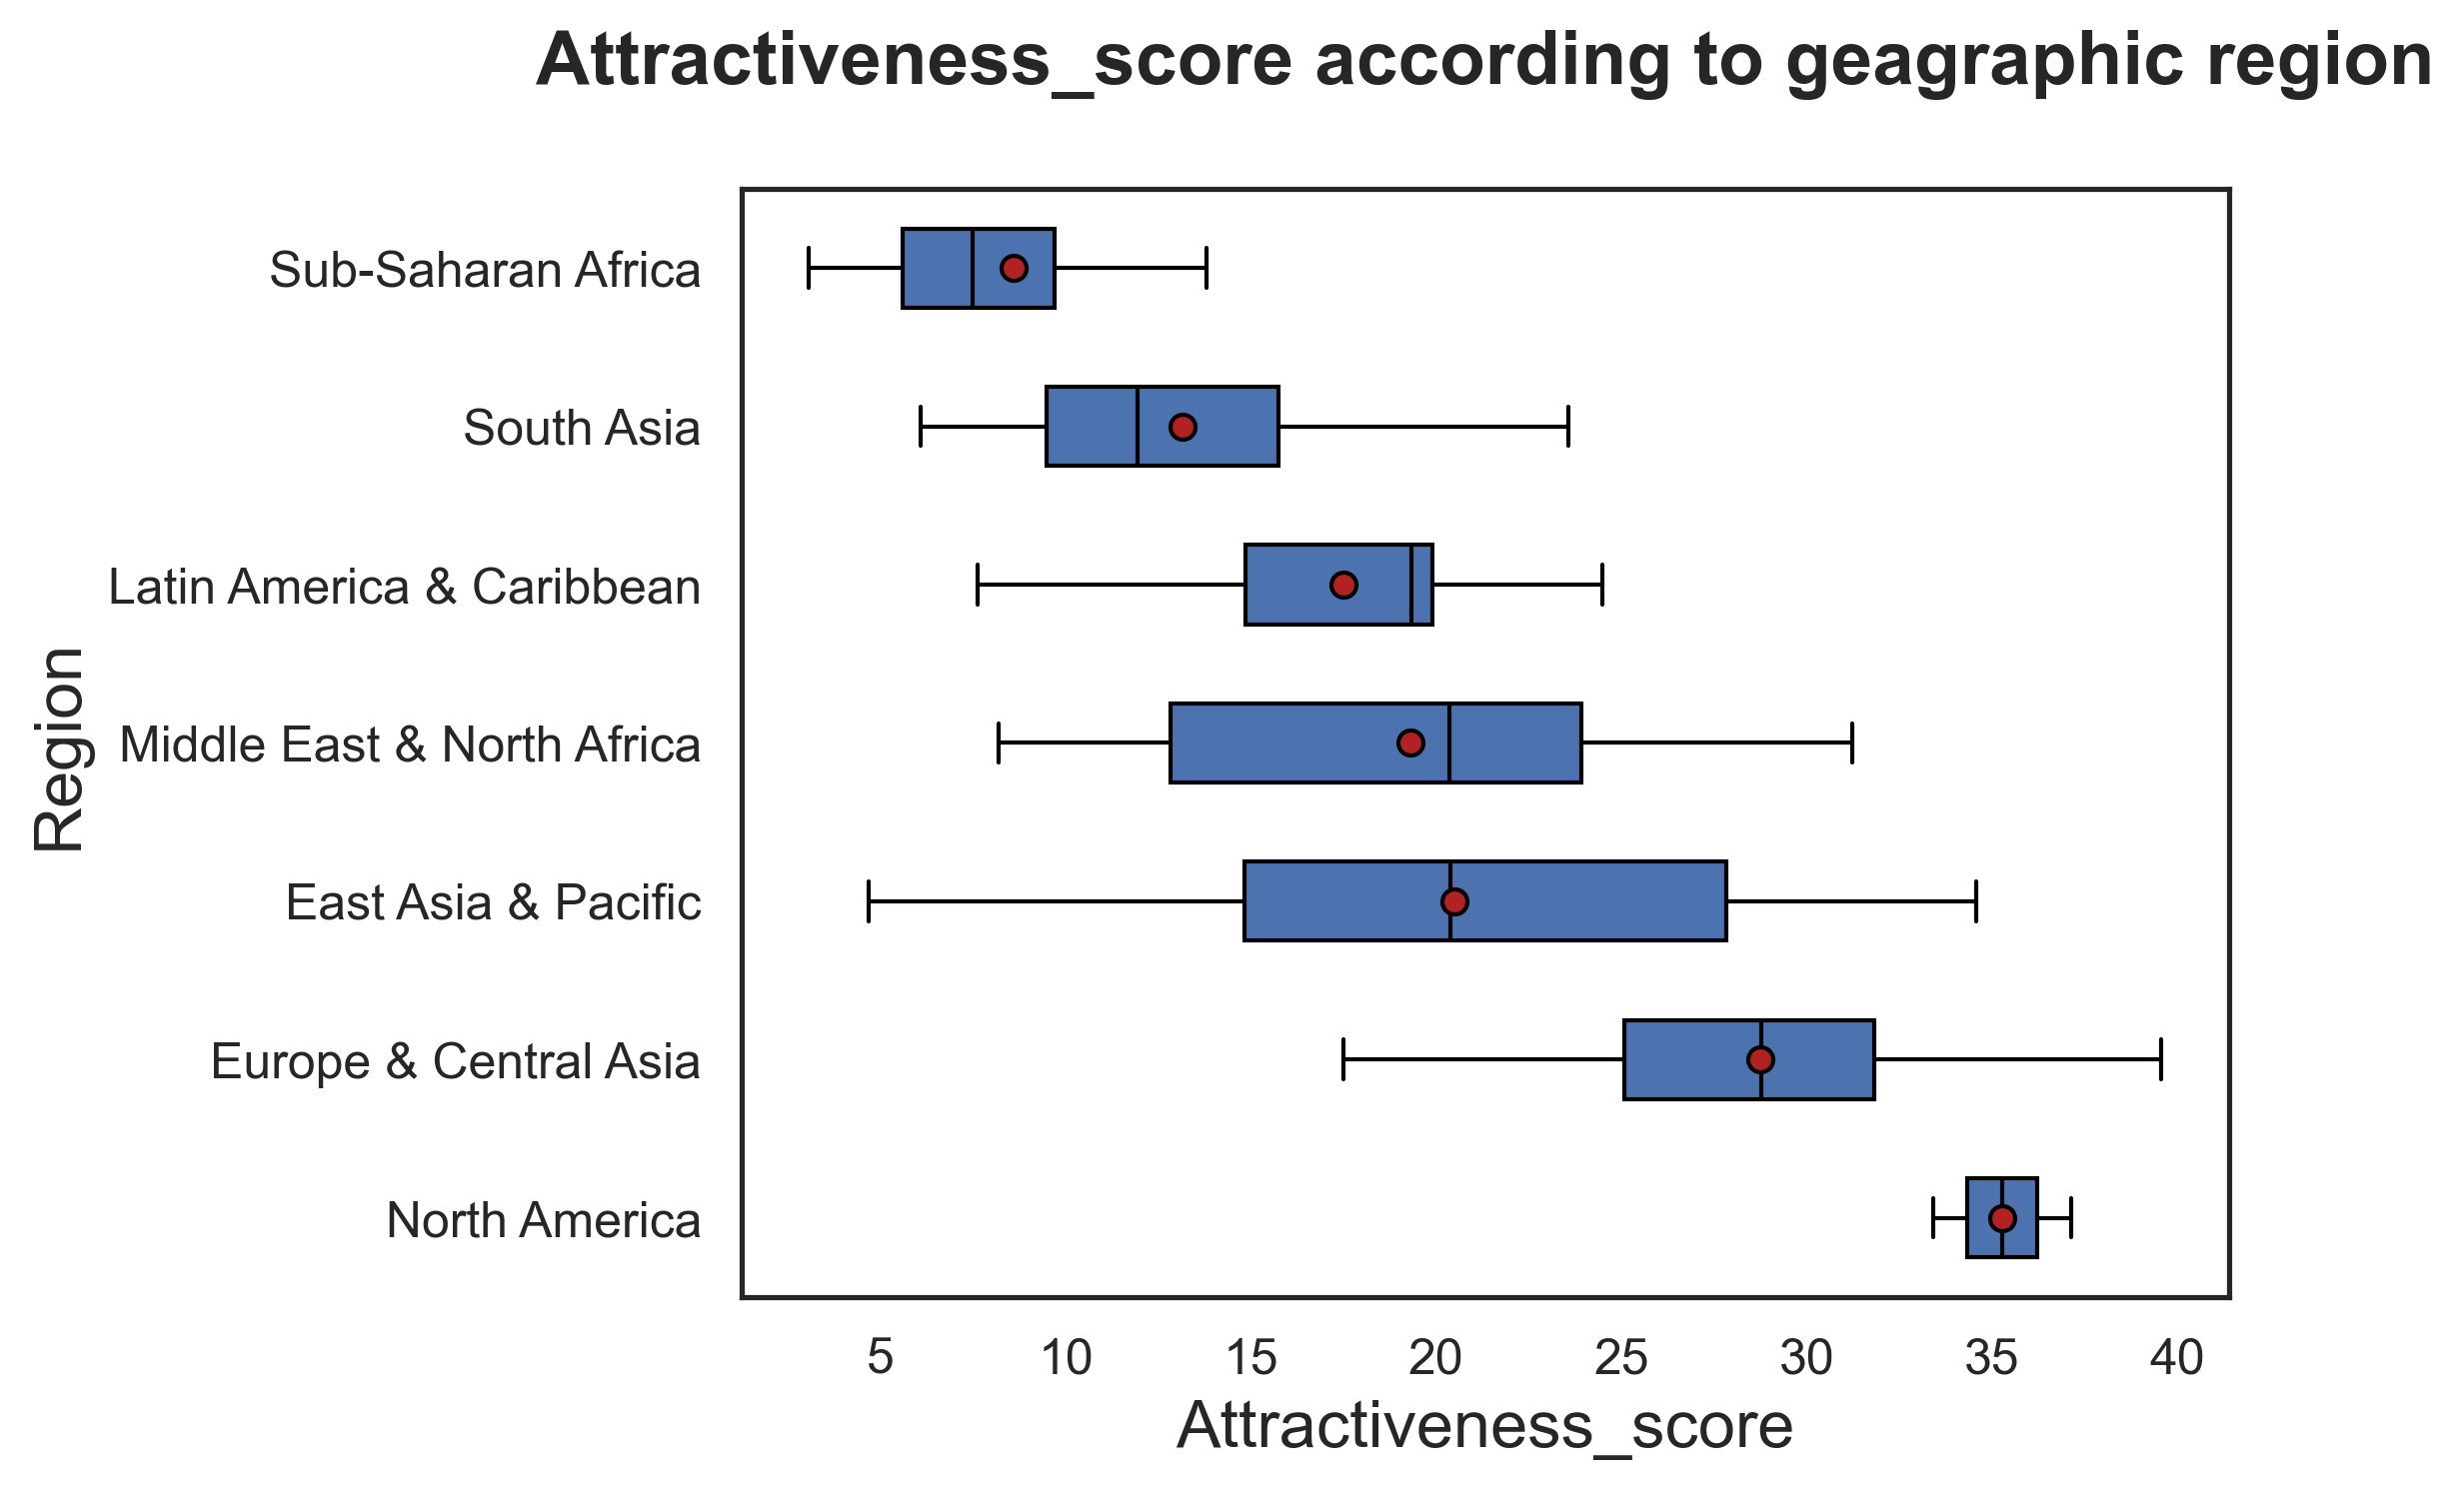

In [115]:
x = "Region"                # qualitative
y = "Attractiveness_score"  # quantitative

modalites = region_list
groupes = []
for m in modalites:
    groupes.append(data_normalized[data_normalized[x] == m][y])

fig = plt.figure()
ax = plt.axes()

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker': 'o',
             'markeredgecolor': 'black',
             'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes,
            labels=modalites,
            showfliers=False,
            medianprops=medianprops, 
            vert=False,
            patch_artist=True,
            showmeans=True,
            meanprops=meanprops)
plt.title("Attractiveness_score according to geagraphic region""\n",
          fontweight='bold')
ax = ax.set(xlabel="Attractiveness_score",
            ylabel='Region')

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>

## <div class="alert alert-block alert-info"><a name="C64">6.4. World map of attractiveness scores</a></div>

In [116]:
# Specific library importation
import geopandas as gpd
import folium
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [117]:
data_map = data_normalized.copy()
print(data_map.shape)
data_map.head()

(142, 17)


NOM       NOM_ALPHA CODE  Country Name Country Code  \
0     Afghanistan     Afghanistan  AFG   Afghanistan          AFG   
1  Afrique du Sud  Afrique du Sud  ZAF  South Africa          ZAF   
2         Albanie         Albanie  ALB       Albania          ALB   
3         Algérie         Algérie  DZA       Algeria          DZA   
4       Allemagne       Allemagne  DEU       Germany          DEU   

   Secondary_completed  Secondary_total  Tertiary_completed  Tertiary_total  \
0                 8.65            16.09                3.65            6.88   
1                53.90            72.31                0.32            4.56   
2                42.90            85.78                0.93            1.59   
3                17.08            23.21                6.66           11.77   
4                54.75            73.00               13.14           21.48   

    Internet  Expenditure  Population_Growth                      Region  \
0  10.595726      3.31754           2.689163                  South Asia   
1  54.000000      6.02955           1.617203          Sub-Saharan Africa   
2  66.363445      3.53944          -0.159880       Europe & Central Asia   
3  42.945527      4.35425           1.825463  Middle East & North Africa   
4  89.647101      4.95219           1.193867       Europe & Central Asia   

          Income Group  Normalized_GNI_per_capita  Normalized_population  \
0           Low income                   0.352970               2.506163   
1  Upper middle income                   6.341285               4.047835   
2  Upper middle income                   4.746835               0.200861   
3  Upper middle income                   4.795521               2.937775   
4          High income                  53.030672               5.988908   

   Attractiveness_score  
0              6.081285  
1             22.569541  
2             22.876744  
3             12.842060  
4             35.242526

In [118]:
# Get geographic information of each country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.head())
world.info()

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   

In [119]:
world2 = pd.read_csv('World_cleaned.csv', sep=';')
world2.head()

Unnamed: 0    pop_est      continent                      name iso_a3  \
0           0     920938        Oceania                      Fiji    FJI   
1           1   53950935         Africa                  Tanzania    TZA   
2           2     603253         Africa                 W. Sahara    ESH   
3           3   35623680  North America                    Canada    CAN   
4           4  326625791  North America  United States of America    USA   

   gdp_md_est                                           geometry  
0      8374.0  MULTIPOLYGON (((180 -16.06713266364245, 180 -1...  
1    150600.0  POLYGON ((33.90371119710453 -0.950000000000000...  
2       906.5  POLYGON ((-8.665589565454809 27.65642588959236...  
3   1674000.0  MULTIPOLYGON (((-122.84 49.00000000000011, -12...  
4  18560000.0  MULTIPOLYGON (((-122.84 49.00000000000011, -12...

In [120]:
world2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  177 non-null    int64  
 1   pop_est     177 non-null    int64  
 2   continent   177 non-null    object 
 3   name        177 non-null    object 
 4   iso_a3      177 non-null    object 
 5   gdp_md_est  177 non-null    float64
 6   geometry    177 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ KB


The geometry column type should be geometry. 

In [121]:
# Change geometry type
world2['geometry'] = gpd.GeoSeries.from_wkt(world2['geometry'])
my_geo_df = gpd.GeoDataFrame(world2, geometry='geometry')
my_geo_df.head()

Unnamed: 0    pop_est      continent                      name iso_a3  \
0           0     920938        Oceania                      Fiji    FJI   
1           1   53950935         Africa                  Tanzania    TZA   
2           2     603253         Africa                 W. Sahara    ESH   
3           3   35623680  North America                    Canada    CAN   
4           4  326625791  North America  United States of America    USA   

   gdp_md_est                                           geometry  
0      8374.0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    150600.0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2       906.5  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3   1674000.0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [122]:
table = my_geo_df.merge(data_map,
                        how="outer",
                        left_on=['iso_a3'],
                        right_on=['Country Code'])
print(table.shape)
table.head()

(184, 24)


Unnamed: 0      pop_est      continent                      name iso_a3  \
0         0.0     920938.0        Oceania                      Fiji    FJI   
1         1.0   53950935.0         Africa                  Tanzania    TZA   
2         2.0     603253.0         Africa                 W. Sahara    ESH   
3         3.0   35623680.0  North America                    Canada    CAN   
4         4.0  326625791.0  North America  United States of America    USA   

   gdp_md_est                                           geometry         NOM  \
0      8374.0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fidji   
1    150600.0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...    Tanzanie   
2       906.5  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...         NaN   
3   1674000.0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...      Canada   
4  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  États-Unis   

    NOM_ALPHA CODE  ... Tertiary_completed Tertiary_total   Internet  \
0       Fidji  FJI  ...               7.03          12.23  46.506978   
1    Tanzanie  TZA  ...               0.36           0.69  13.000000   
2         NaN  NaN  ...                NaN            NaN        NaN   
3      Canada  CAN  ...              22.67          43.91  89.840000   
4  États-Unis  USA  ...              26.76          53.94  76.176737   

   Expenditure  Population_Growth               Region         Income Group  \
0      3.88289           0.738288  East Asia & Pacific  Upper middle income   
1      3.47914           3.092454   Sub-Saharan Africa           Low income   
2          NaN                NaN                  NaN                  NaN   
3      5.28122           1.213891        North America          High income   
4      5.38078           0.692801        North America          High income   

   Normalized_GNI_per_capita  Normalized_population Attractiveness_score  
0                   5.477118               0.057425            19.013633  
1                   0.754625               4.023413             4.426626  
2                        NaN                    NaN                  NaN  
3                  52.799416               2.624431            33.417662  
4                  68.804771              23.431761            37.148539  

[5 rows x 24 columns]

Text(0.5, 1.0, 'Attractiveness score')

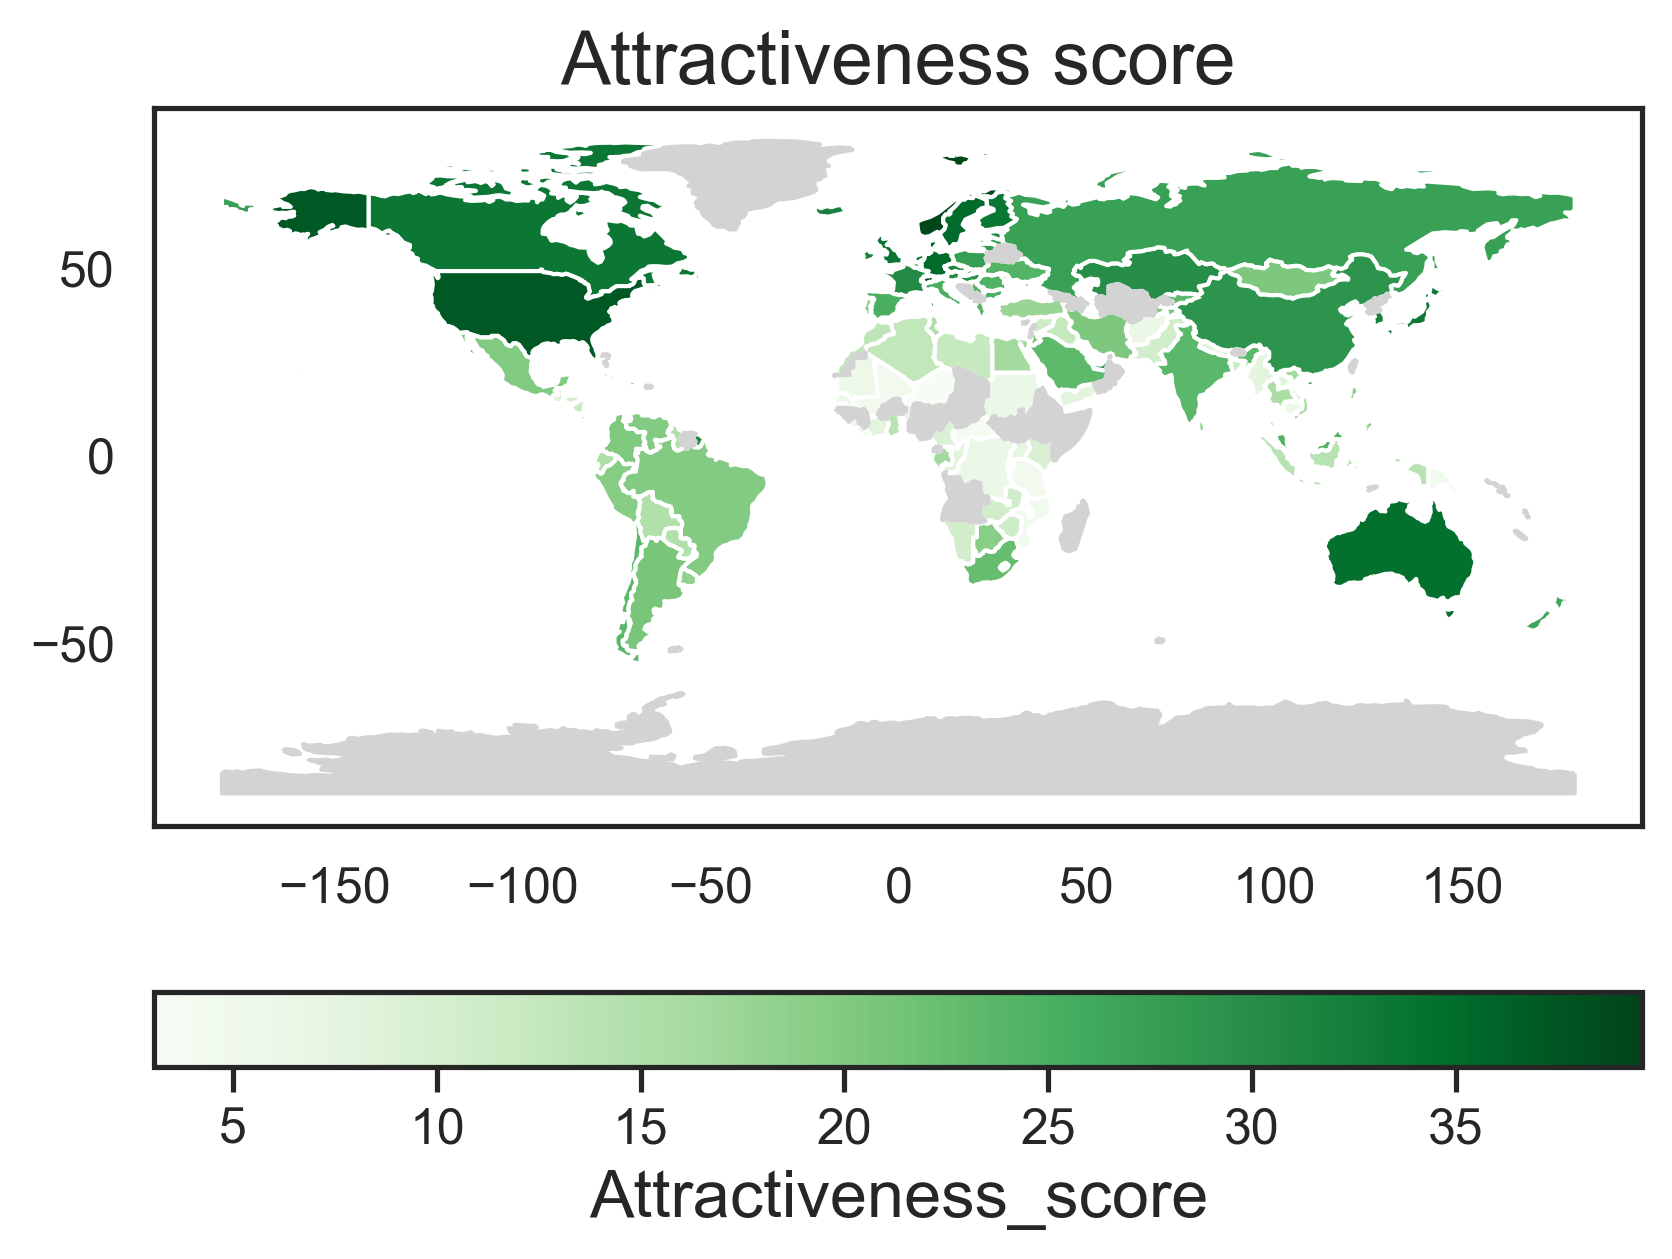

In [123]:
fig, ax = plt.subplots(1, 1)
cmap='Greens'
legend_kwds={'label': "Attractiveness_score",
             'orientation': "horizontal"}
missing_kwds={'color': 'lightgrey',
              "edgecolor": "lightgrey"}
table.plot('Attractiveness_score',
           ax=ax,
           cmap=cmap,
           legend=True,
           legend_kwds=legend_kwds,
           figsize=(100,50),
           missing_kwds=missing_kwds)
plt.title("Attractiveness score")

To get an interactive map, I will use the folium library.

In [124]:
# Delete all null values
table_map = table.dropna(subset=['Attractiveness_score'])
table_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 142 entries, 0 to 183
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unnamed: 0                 135 non-null    float64 
 1   pop_est                    135 non-null    float64 
 2   continent                  135 non-null    object  
 3   name                       135 non-null    object  
 4   iso_a3                     135 non-null    object  
 5   gdp_md_est                 135 non-null    float64 
 6   geometry                   135 non-null    geometry
 7   NOM                        142 non-null    object  
 8   NOM_ALPHA                  142 non-null    object  
 9   CODE                       142 non-null    object  
 10  Country Name               142 non-null    object  
 11  Country Code               142 non-null    object  
 12  Secondary_completed        142 non-null    float64 
 13  Secondary_total            

I don't have geometric information for 7 countries.

In [125]:
table_map2 = table_map.dropna(subset=['name'])
table_map2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 0 to 175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unnamed: 0                 135 non-null    float64 
 1   pop_est                    135 non-null    float64 
 2   continent                  135 non-null    object  
 3   name                       135 non-null    object  
 4   iso_a3                     135 non-null    object  
 5   gdp_md_est                 135 non-null    float64 
 6   geometry                   135 non-null    geometry
 7   NOM                        135 non-null    object  
 8   NOM_ALPHA                  135 non-null    object  
 9   CODE                       135 non-null    object  
 10  Country Name               135 non-null    object  
 11  Country Code               135 non-null    object  
 12  Secondary_completed        135 non-null    float64 
 13  Secondary_total            

In [126]:
df30=pd.concat([table_map, table_map2]).drop_duplicates(keep=False)
print("The countries without geometry informations are:""\n",df30['NOM'])

The countries without geometry informations are:
 177      Bahreïn
178      Barbade
179     Maldives
180        Malte
181      Maurice
182    Singapour
183        Tonga
Name: NOM, dtype: object


In [127]:
table_map2.crs = "epsg:4326"

In [128]:
# Create a map
my_map = folium.Map()

In [129]:
# Add the attractiveness score on the map
folium.Choropleth(geo_data=table_map2,
                  name='choropleth',
                  data=table_map,
                  columns=['name', 'Attractiveness_score'],
                  key_on='feature.properties.name',
                  fill_color='Greens',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Attractiveness_score').add_to(my_map)

my_map

<code style="background:lightyellow;color:black">Back to <a href="#C0">Table of contents</a></code>